# **This notebook guides you through step by step tutorial of processing Python scripts for analyzing RISC-V compiler toolchain using topic modeling.**

## **🛠 Prerequisites**
Before running this notebook, you will require or make sure following python libraries are installed:
  
---
- Pandas
- Numpy
-  Matplotlib
-  Seaborn
-  Gensim
-  Wordcloud
-  ScikitLearn
-  Top2vec
-  Tomotopy
-  Whoosh
-  OCTIS


The results of topic modelling and its evaluation metrics can be different from this tutorial if code is executed on GPU.

Let's get started! 🎯


## ** ⌛ Step 1: Load the Data and visualize the datasets**


*   To load data → import google drive, upload the data and mount the google drive.
* Import Required Libraries
* Load Data from Google Drive
* Set visualization preferences
* Explore the Data

In [1]:
from google.colab import drive
import pandas as pd
import json
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

drive.mount('/content/drive') # This will prompt you to click a link and authorize access

import json
import pandas as pd
import seaborn as sns

file_path1 = '/content/drive/MyDrive/commits_data_combinedlatest.json'
with open(file_path1, 'r',encoding='utf-8') as f1:
    data1 = json.load(f1)
    df = pd.DataFrame(data1)


file_path2 = '/content/drive/MyDrive/gccmoredata.json'
with open(file_path2, 'r',encoding='utf-8') as f2:
    data2 = json.load(f2)
    df1 = pd.DataFrame(data2)


sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set display width
pd.set_option('display.max_colwidth', 100)  # Set column width


print("First dataset:")
df.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First dataset:


,commit_id,commit_message,author_name,committer_name,committer_email,author_date_time,committer_date_time,branch,repo_name,merge,patch_info
0,a504f73f40d556aaa9a55b3d4377abba0176c2b5,Merge pull request #1475 from CARV-ICS-FORTH/uclibc\n\n Add uClibc-ng support for NOMMU Linux bu...,Kito Cheng,GitHub,noreply@github.com,2024-08-27 14:49:50,2024-08-27 14:49:50,[master],riscv-gnu-toolchain,True,[]
1,dada8f1b7222d3213749ea6e91f473d8bea886bc,Bump qemu from 9.0.1 to 9.0.2\n\nTest results (with --enable-multilib):\n```\n ===...,Christoph Müllner,Christoph Müllner,christophm30@gmail.com,2024-08-26 13:15:20,2024-08-27 08:44:04,[master],riscv-gnu-toolchain,False,"[{'file_name': 'qemu', 'change_type': 'MODIFY', 'patch': '@@ -1 +1 @@ -Subproject commit 60b4f3a..."
2,f656fc5a7219a5245d1791c2d20d1e07d30177bd,Bump glibc from 2.39 to 2.40\n\nTest results (with --enable-multilib):\n```\n ====...,Christoph Müllner,Christoph Müllner,christophm30@gmail.com,2024-08-26 13:10:56,2024-08-27 08:43:51,[master],riscv-gnu-toolchain,False,"[{'file_name': 'glibc', 'change_type': 'MODIFY', 'patch': '@@ -1 +1 @@ -Subproject commit ef321e..."
3,2838c1c7cf556697deb9c9588844044a3f73ccab,Bump binutils from 2.43 to 2.43.1\n\nTest results (with --enable-multilib):\n```\n ...,Christoph Müllner,Christoph Müllner,christophm30@gmail.com,2024-08-26 13:08:58,2024-08-27 08:43:41,[master],riscv-gnu-toolchain,False,"[{'file_name': '.gitmodules', 'change_type': 'MODIFY', 'patch': '@@ -1,7 +1,7 @@ [submodule ""bi..."
4,211df88ef07e4d43c3e362246d781a37ab6cbbf6,Bump gdb into 15.1 release version.,Jiawei,Christoph Müllner,christophm30@gmail.com,2024-08-23 00:06:36,2024-08-26 16:10:13,[master],riscv-gnu-toolchain,False,"[{'file_name': '.gitmodules', 'change_type': 'MODIFY', 'patch': '@@ -20,7 +20,7 @@ [submodule ""..."


In [2]:
print("\nSecond dataset:")
df1.head(10)


Second dataset:


,subject,date,author,patch_text
0,[COMMITTED] Re: Re: [PATCH] RISC-V: NFC: Do not use zicond for pr105314 testcases,2024-07-31,Xiao Zeng,"2024-08-01 09:53 Jeff Law <jeffreya...@gmail.com> wrote:\n>\n>\n>\n>On 7/30/24 7:05 PM, Xiao Ze..."
1,Re: [PATCH] RISC-V: NFC: Do not use zicond for pr105314 testcases,2024-07-31,Jeff Law,"On 7/30/24 7:05 PM, Xiao Zeng wrote:\n\n2024-07-31 03:10 Jeff Law <jeffreya...@gmail.com> wrote..."
2,Re: [PATCH] RISC-V: Correct mode_idx attribute for viwalu wx variants [PR116149].,2024-07-31,Jeff Law,"On 7/31/24 9:55 AM, Robin Dapp wrote:\n\nHi,\n\nin PR116149 we choose a wrong vector length whic..."
3,[PATCH] RISC-V: Correct mode_idx attribute for viwalu wx variants [PR116149].,2024-07-31,Robin Dapp,"Hi,\n\nin PR116149 we choose a wrong vector length which causes wrong values in\na reduction. T..."
4,RE: Support streaming of poly_int for offloading when it's degree <= accel's NUM_POLY_INT_COEFFS,2024-07-31,Prathamesh Kulkarni,"> -----Original Message-----\n> From: Tobias Burnus <tbur...@baylibre.com>\n> Sent: Tuesday, Jul..."
5,RE: Support streaming of poly_int for offloading when it's degree <= accel's NUM_POLY_INT_COEFFS,2024-07-31,Prathamesh Kulkarni,> -----Original Message-----\n> From: Prathamesh Kulkarni <prathame...@nvidia.com>\n> Sent: Tues...
6,Re: [PATCH] RISC-V: Expand subreg move via slide if necessary [PR116086].,2024-07-31,Robin Dapp,> > Like aarch64 we set REGMODE_NATURAL_SIZE for fixed-size modes to\n> > UNITS_PER_WORD. Isn't...
7,Re: [RFC] RISC-V: Add support for Profiles RVA/B23.,2024-07-30,Jiawei,"在 2024/7/31 4:48, Jeff Law 写道:\n\n\n\nOn 7/28/24 9:24 PM, Jiawei wrote:\n\nThis patch adds suppo..."
8,RE: [PATCH v1] RISC-V: Implement the quad and oct .SAT_TRUNC for scalar,2024-07-30,"Li, Pan2","Kindly ping.\n\nPan\n\n-----Original Message-----\nFrom: Li, Pan2 <pan2...@intel.com> \nSent: Tu..."
9,Re: Re: [PATCH] RISC-V: NFC: Do not use zicond for pr105314 testcases,2024-07-30,Xiao Zeng,"2024-07-31 03:10 Jeff Law <jeffreya...@gmail.com> wrote:\n>\n>\n>\n>On 7/28/24 7:58 PM, Xiao Ze..."


# **Step 2: 📊 Data Exploration & Preprocessing**

# **Step 2.1: Extracting Patch Information**

This code section extracts details such as:

*  File Name (file_name)
*   Change Type (change_type)
*   Patch Content (patch)



In [3]:
# Define a function to extract file_name, change_type, and patch from patch_info
def extract_patch_info(patch_info):
    # Check if patch_info is not empty
    if patch_info:
        # Extract file_name, change_type, and patch
        file_name = patch_info[0]['file_name']
        change_type = patch_info[0]['change_type']
        patch = patch_info[0]['patch']
        return file_name, change_type, patch
    else:
        return None, None, None

# Apply the function to extract file_name, change_type, and patch
df['file_name'], df['change_type'], df['patch'] = zip(*df['patch_info'].apply(extract_patch_info))

# Drop the original patch_info column
df = df.drop(columns=['patch_info'])

**Step 2.2: Handling Lists in Columns**

Some columns contain lists, which are simplified

In [4]:
df['branch'] = df['branch'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)
df.applymap(lambda x: isinstance(x, list)).any().any()
df.head(5)

<ipython-input-4-f002752c4c04>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: isinstance(x, list)).any().any()


,commit_id,commit_message,author_name,committer_name,committer_email,author_date_time,committer_date_time,branch,repo_name,merge,file_name,change_type,patch
0,a504f73f40d556aaa9a55b3d4377abba0176c2b5,Merge pull request #1475 from CARV-ICS-FORTH/uclibc\n\n Add uClibc-ng support for NOMMU Linux bu...,Kito Cheng,GitHub,noreply@github.com,2024-08-27 14:49:50,2024-08-27 14:49:50,master,riscv-gnu-toolchain,True,None,None,None
1,dada8f1b7222d3213749ea6e91f473d8bea886bc,Bump qemu from 9.0.1 to 9.0.2\n\nTest results (with --enable-multilib):\n```\n ===...,Christoph Müllner,Christoph Müllner,christophm30@gmail.com,2024-08-26 13:15:20,2024-08-27 08:44:04,master,riscv-gnu-toolchain,False,qemu,MODIFY,@@ -1 +1 @@\n-Subproject commit 60b4f3aff4e39be04f5d73c65a7e8ef838475c9f\n+Subproject commit 5eb...
2,f656fc5a7219a5245d1791c2d20d1e07d30177bd,Bump glibc from 2.39 to 2.40\n\nTest results (with --enable-multilib):\n```\n ====...,Christoph Müllner,Christoph Müllner,christophm30@gmail.com,2024-08-26 13:10:56,2024-08-27 08:43:51,master,riscv-gnu-toolchain,False,glibc,MODIFY,@@ -1 +1 @@\n-Subproject commit ef321e23c20eebc6d6fb4044425c00e6df27b05f\n+Subproject commit 3d1...
3,2838c1c7cf556697deb9c9588844044a3f73ccab,Bump binutils from 2.43 to 2.43.1\n\nTest results (with --enable-multilib):\n```\n ...,Christoph Müllner,Christoph Müllner,christophm30@gmail.com,2024-08-26 13:08:58,2024-08-27 08:43:41,master,riscv-gnu-toolchain,False,.gitmodules,MODIFY,"@@ -1,7 +1,7 @@\n [submodule ""binutils""]\n \tpath = binutils\n \turl = https://sourceware.org/gi..."
4,211df88ef07e4d43c3e362246d781a37ab6cbbf6,Bump gdb into 15.1 release version.,Jiawei,Christoph Müllner,christophm30@gmail.com,2024-08-23 00:06:36,2024-08-26 16:10:13,master,riscv-gnu-toolchain,False,.gitmodules,MODIFY,"@@ -20,7 +20,7 @@\n [submodule ""gdb""]\n \tpath = gdb\n \turl = https://sourceware.org/git/binuti..."


**Step 2.3: Convert Date Columns**

This section of code converts timestamps to a proper datetime format

In [5]:
df['author_date_time'] = pd.to_datetime(df['author_date_time'])
df['committer_date_time'] = pd.to_datetime(df['committer_date_time'])


In [6]:
duplicates_countm = df.duplicated(subset='commit_message').sum()

print(f"Number of duplicates based on commit_message: {duplicates_countm}")

Number of duplicates based on commit_message: 8983


In [7]:
duplicates_countp = df.duplicated(subset='patch').sum()

print(f"Number of duplicates based on patch: {duplicates_countp}")

Number of duplicates based on patch: 9286


In [8]:
print(df['commit_id'].nunique())
print(df['commit_message'].nunique())
print(df['patch'].nunique())

1287
1256
952


In [9]:
df1.nunique()

,0
subject,7428
date,1328
author,331
patch_text,9938


# **Step 3: Data Analysis & Visualization**

This section analyzes trends in commit activity, top contributors, and change types over time.


1.  **Step 3.1 Group Commits by Year**
2.  **Step 3.2 Visualize Commit Trends**


The section calculates and plots:

* The data by year is grouped for further analysis
* The total number of commits per year
* The number of unique committers and authors per year

    year  commit_count
0   2014          1044
1   2015          2727
2   2016           963
3   2017          1179
4   2018           583
5   2019           783
6   2020           831
7   2021           451
8   2022           561
9   2023           947
10  2024           170


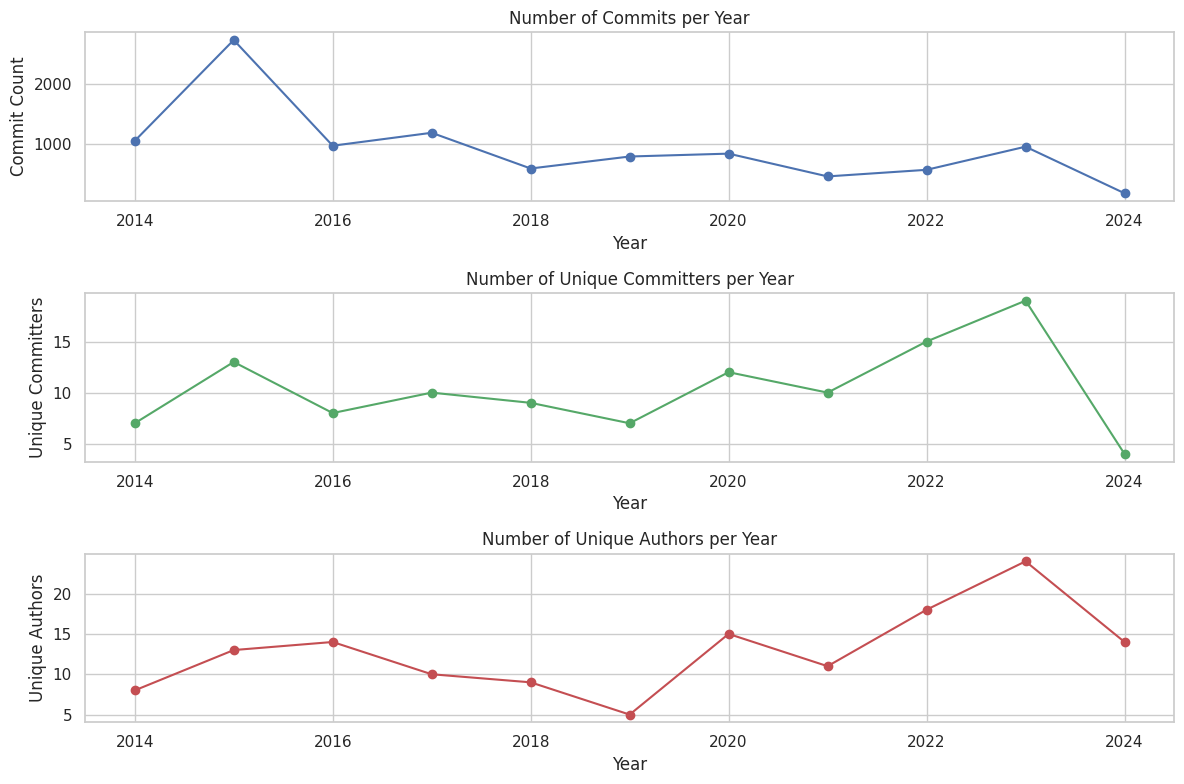

In [10]:
df['year'] = df['committer_date_time'].dt.year
grouped_by_year = df.groupby('year')
commit_counts_per_year = grouped_by_year.size().reset_index(name='commit_count')
print(commit_counts_per_year)
unique_committers_per_year = grouped_by_year['committer_name'].nunique().reset_index(name='unique_committers')
unique_authors_per_year = grouped_by_year['author_name'].nunique().reset_index(name='unique_authors')

plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 1)
plt.plot(commit_counts_per_year['year'], commit_counts_per_year['commit_count'], marker='o', color='b')
plt.title('Number of Commits per Year')
plt.xlabel('Year')
plt.ylabel('Commit Count')
plt.grid(True)


plt.subplot(3, 1, 2)
plt.plot(unique_committers_per_year['year'], unique_committers_per_year['unique_committers'], marker='o', color='g')
plt.title('Number of Unique Committers per Year')
plt.xlabel('Year')
plt.ylabel('Unique Committers')
plt.grid(True)
plt.subplot(3, 1, 3)
plt.plot(unique_authors_per_year['year'], unique_authors_per_year['unique_authors'], marker='o', color='r')
plt.title('Number of Unique Authors per Year')
plt.xlabel('Year')
plt.ylabel('Unique Authors')
plt.grid(True)

plt.tight_layout()


plt.show()

**Step 3.4 : Identify Top Committers & Authors**

This section extracts the top contributors per year

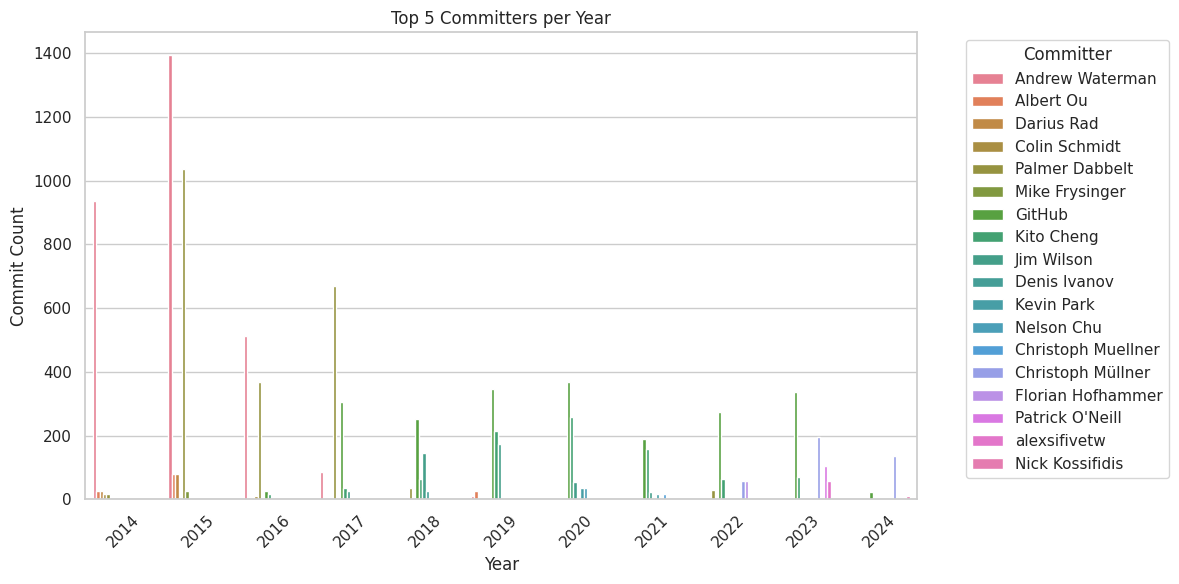

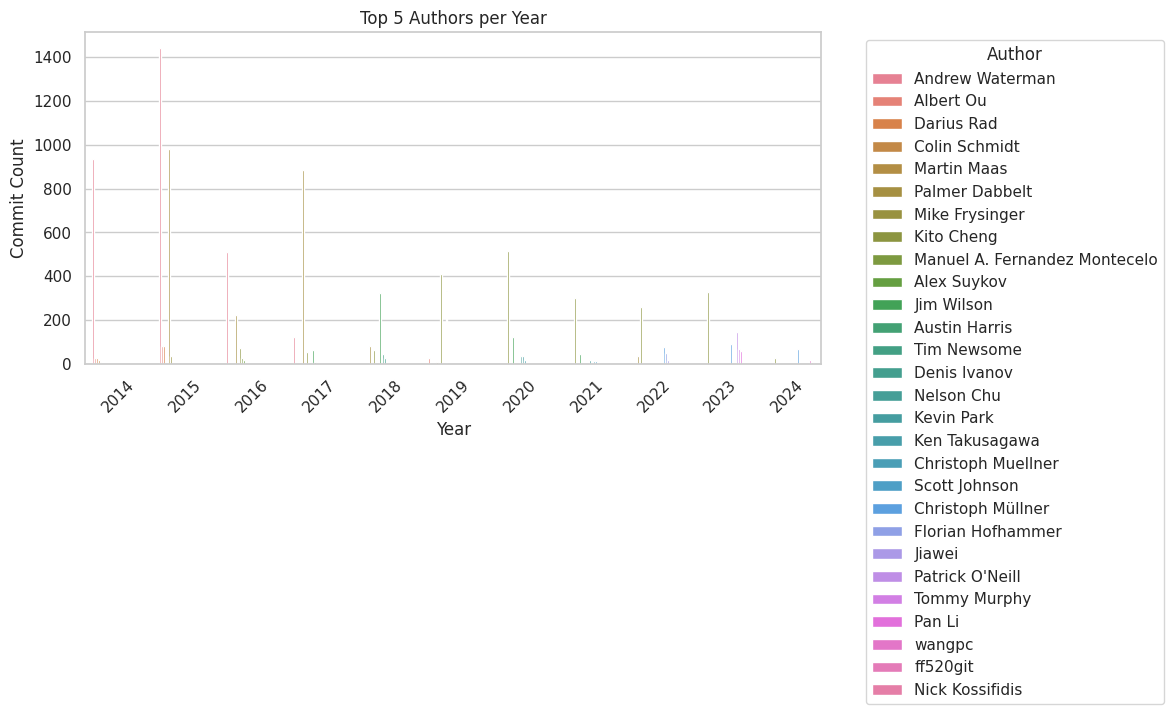

In [11]:
top_committers_per_year = grouped_by_year['committer_name'].value_counts().groupby(level=0).head(5).reset_index(name='commit_count')
top_authors_per_year = grouped_by_year['author_name'].value_counts().groupby(level=0).head(5).reset_index(name='commit_count')
plt.figure(figsize=(12, 6))


sns.barplot(x='year', y='commit_count', hue='committer_name', data=top_committers_per_year, dodge=True)
plt.title('Top 5 Committers per Year')
plt.xlabel('Year')
plt.ylabel('Commit Count')
plt.xticks(rotation=45)
plt.legend(title="Committer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='commit_count', hue='author_name', data=top_authors_per_year, dodge=True)
plt.title('Top 5 Authors per Year')
plt.xlabel('Year')
plt.ylabel('Commit Count')
plt.xticks(rotation=45)
plt.legend(title="Author", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Step 3.5 : Analyze File Changes**

The most modified files and types of code changes are visualized in this section

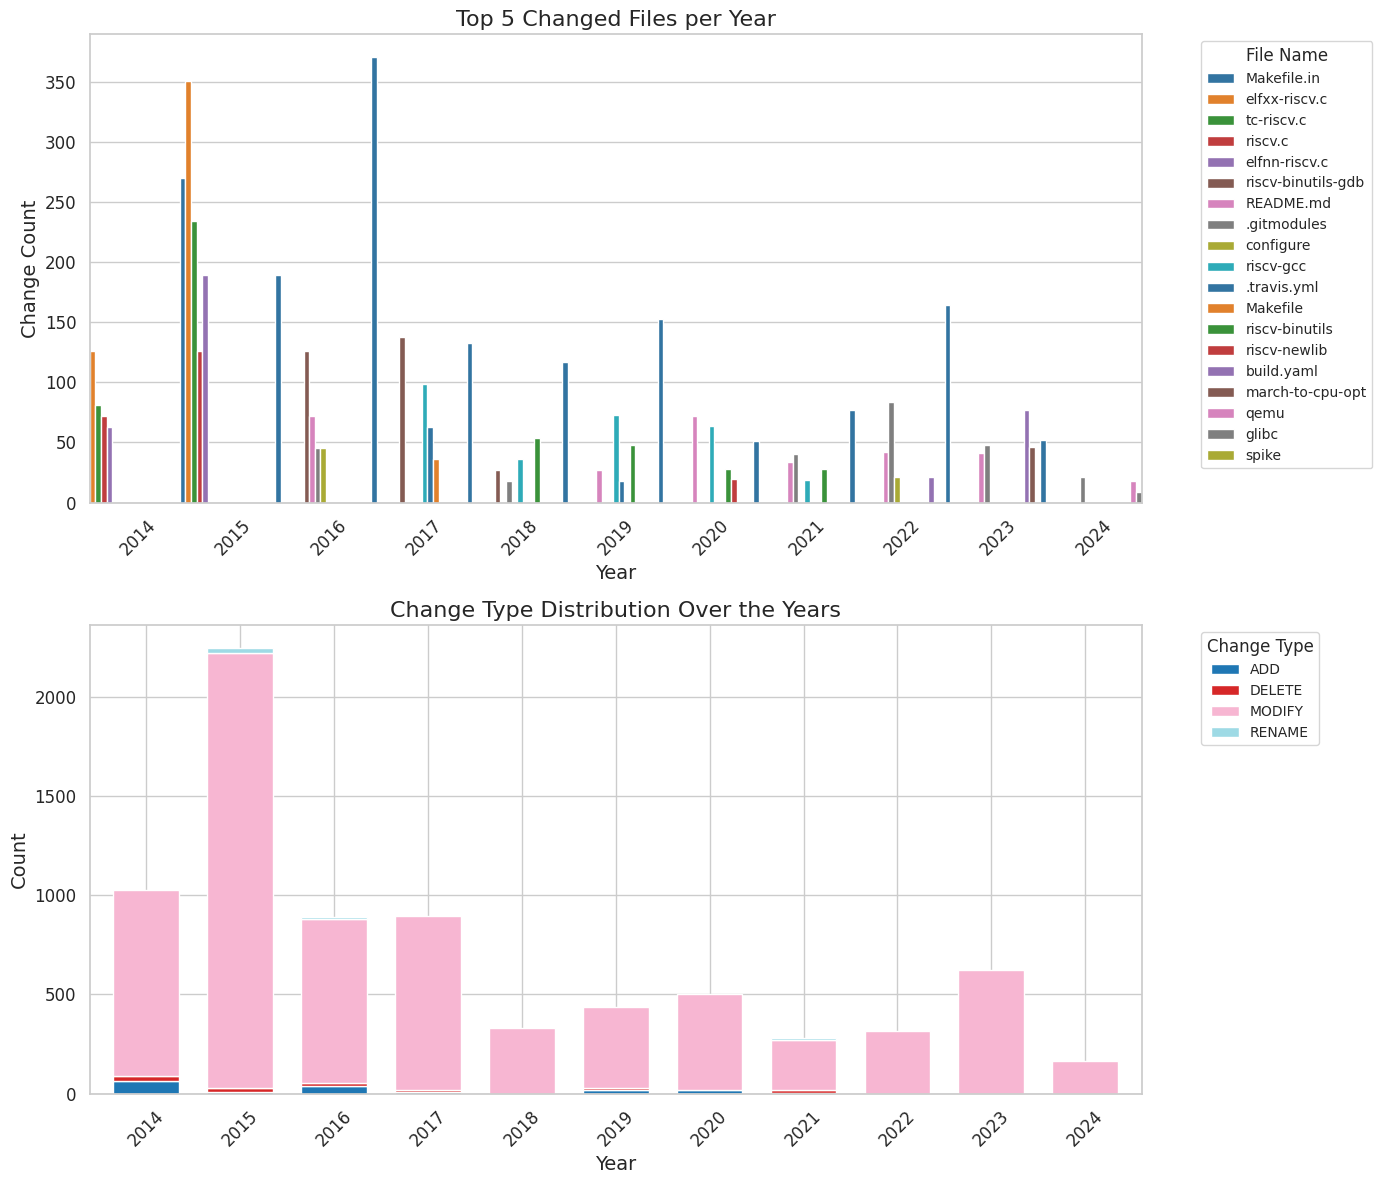

In [12]:
top_files_per_year = grouped_by_year['file_name'].value_counts().groupby(level=0).head(5).reset_index(name='change_count')
change_type_distribution = grouped_by_year['change_type'].value_counts().unstack().fillna(0)


plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(2, 1, figsize=(14, 12))


sns.barplot(x='year', y='change_count', hue='file_name', data=top_files_per_year, dodge=True, ax=axes[0], palette='tab10',width=1.12)


axes[0].set_title('Top 5 Changed Files per Year', fontsize=16)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Change Count', fontsize=14)


axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)


axes[0].legend(title="File Name", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


change_type_distribution.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20', width=0.7)


axes[1].set_title('Change Type Distribution Over the Years', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)


axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)


axes[1].legend(title="Change Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.tight_layout()

plt.show()

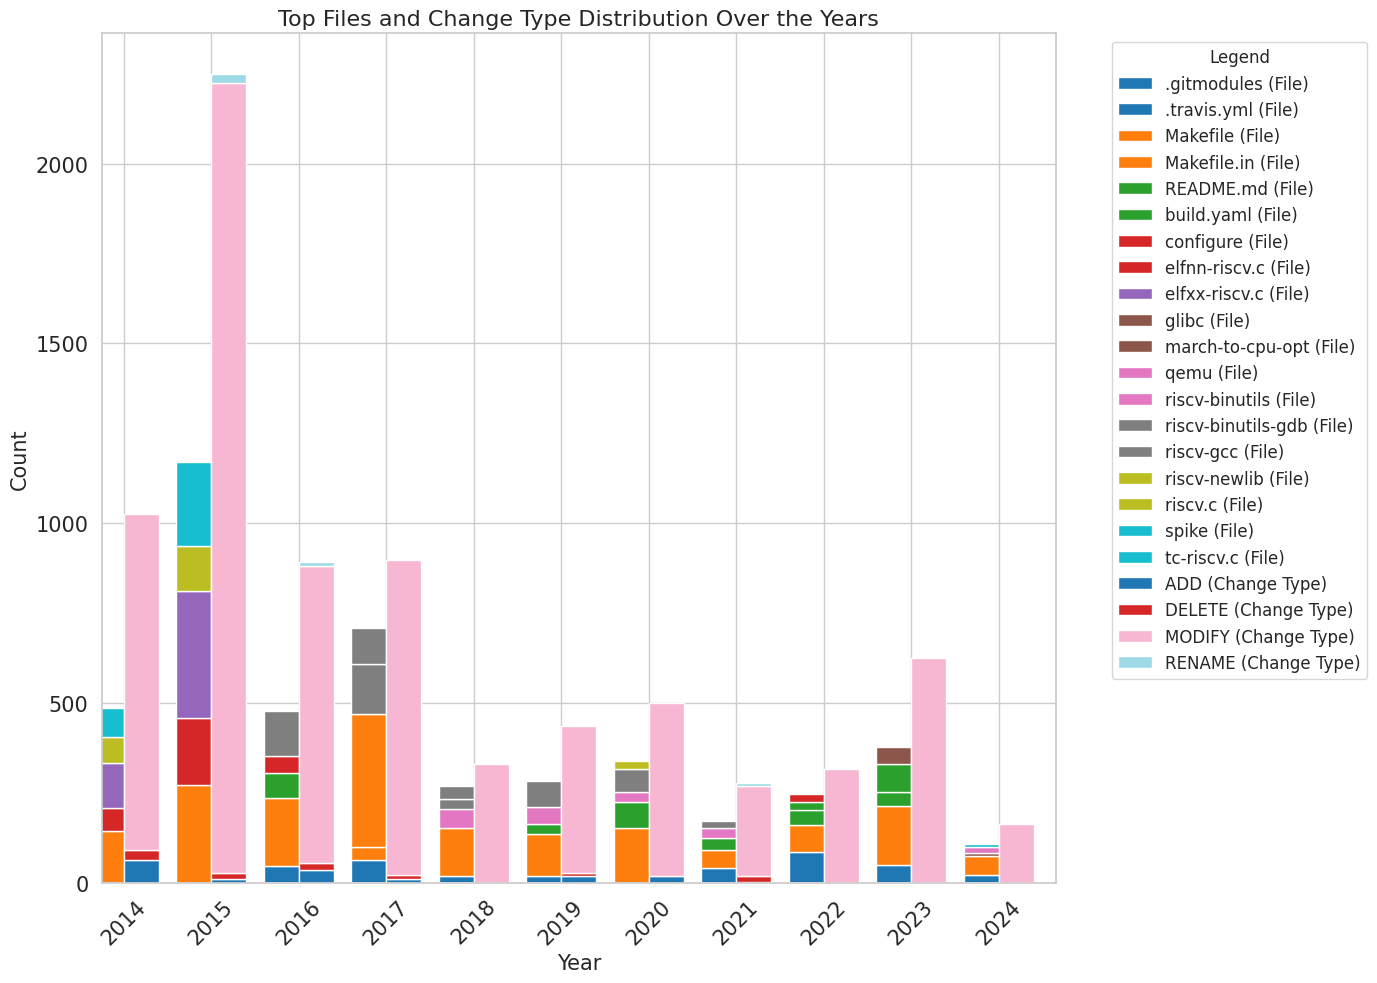

In [13]:


# Prepare data for top files
top_files_per_year = grouped_by_year['file_name'].value_counts().groupby(level=0).head(5).reset_index(name='change_count')
top_files_matrix = top_files_per_year.pivot_table(index='year', columns='file_name', values='change_count', fill_value=0)

# Prepare data for change type distribution
change_type_distribution = grouped_by_year['change_type'].value_counts().unstack().fillna(0)
change_type_matrix = change_type_distribution

# Combine top files and change types data
combined_matrix = pd.concat([top_files_matrix, change_type_matrix], axis=1, keys=['Files', 'Change Types'])

# Set up the plotting area
fig, ax = plt.subplots(figsize=(14, 10))

# Plot stacked bar chart for files
top_files_matrix.plot(kind='bar', stacked=True, ax=ax, colormap='tab10', width=0.4, position=1, label='Files')
# Plot stacked bar chart for change types
change_type_matrix.plot(kind='bar', stacked=True, ax=ax, colormap='tab20', width=0.4, position=0, label='Change Types')

# Titles and labels
ax.set_title('Top Files and Change Type Distribution Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.tick_params(axis='x', rotation=45, labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Create custom legends
file_labels = [f"{col} (File)" for col in top_files_matrix.columns]
change_type_labels = [f"{col} (Change Type)" for col in change_type_matrix.columns]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, file_labels + change_type_labels, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


**Step 3.6 :Merge vs. Non-Merge Commits**

The section compares merge commits against normal commits

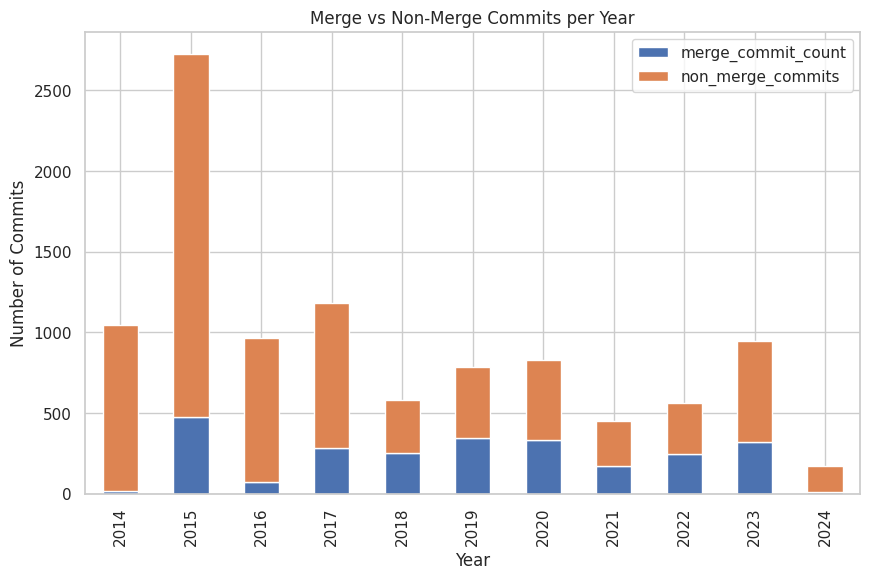

In [14]:
# Count merge commits per year
merge_commit_counts = grouped_by_year['merge'].apply(lambda x: (x == True).sum()).reset_index(name='merge_commit_count')


# Compare the number of merge commits with total commits
merge_vs_total = pd.merge(commit_counts_per_year, merge_commit_counts, on='year')
merge_vs_total['non_merge_commits'] = merge_vs_total['commit_count'] - merge_vs_total['merge_commit_count']

# Plot the comparison
merge_vs_total.plot(x='year', y=['merge_commit_count', 'non_merge_commits'], kind='bar', figsize=(10, 6), stacked=True)
plt.title('Merge vs Non-Merge Commits per Year')
plt.xlabel('Year')
plt.ylabel('Number of Commits')
plt.show()


**Step 3.7: Visualization of Yearly trend of GCC mailing list dataset**

This section visualizes how many mails are submitted in a year in  GCC mail archieve

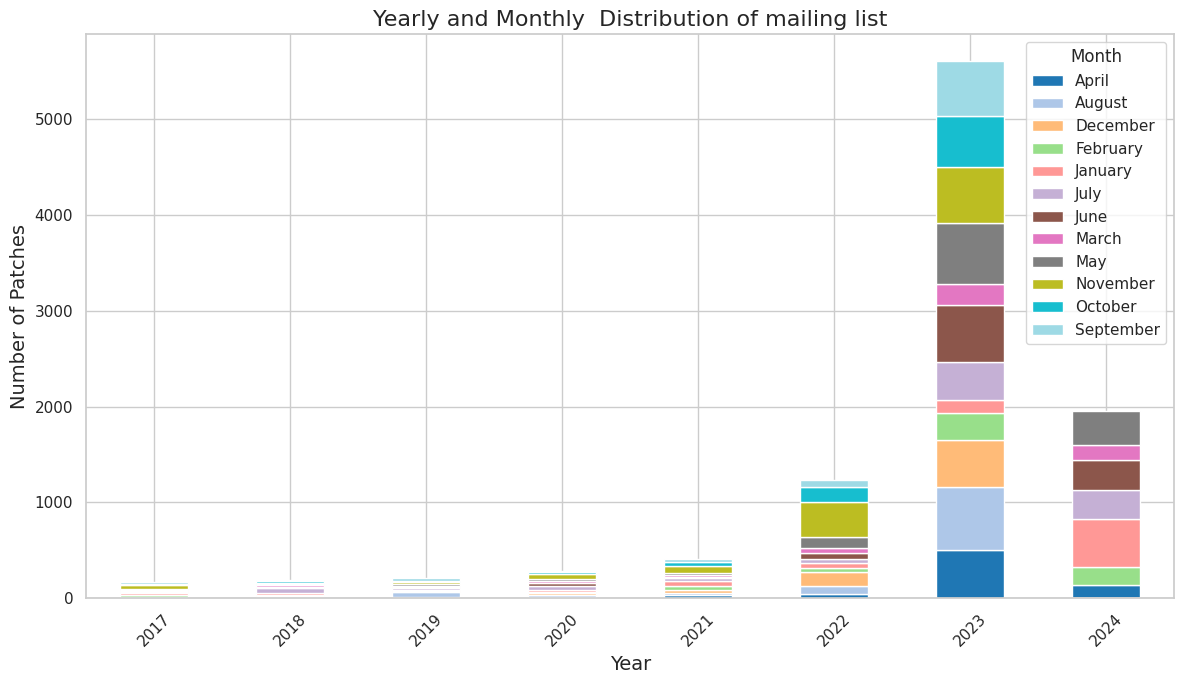

In [15]:

df1['date'] = pd.to_datetime(df1['date'])

# Extract year and month from 'date' for grouping
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month_name()

# Aggregate commit counts by year and month
monthly_counts = df1.groupby(['year', 'month'])['date'].count().unstack(fill_value=0)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 7))

# Create a stacked bar plot
monthly_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Title and labels
ax.set_title('Yearly and Monthly  Distribution of mailing list', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Patches', fontsize=14)
ax.legend(title='Month')
ax.tick_params(axis='x', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


# **Step:4: Preprocess Github commit patches for further analysis**
The following next three sections:

* Remove Merge Commits
* Count Unique Patches
* Drop Duplicates
* Save unique patches to JSON file for verification
* Print Sample of Unique Patches
* Seperate additions and deletions lines in patch

In [16]:

df_copy = df.copy()
new_df_filtered = df_copy[df_copy['merge'] != True]
new_df_filtered = new_df_filtered.reset_index(drop=True)
new_df_filtered.head(20)
new_df_filtered['patch'].nunique()

952

In [17]:
from pprint import pprint
df_unique_and_first_occurrences = new_df_filtered.drop_duplicates(subset=['patch'], keep='first')
df_patch_modify = df_unique_and_first_occurrences['patch'].unique()
df_patch_modify = pd.DataFrame({'unique_patches': df_patch_modify})
df_patch_modify.to_json('unique_patches.json', orient='records', lines=True)
pprint(df_patch_modify.head(10))
print(len(df_patch_modify))

                                                                                        unique_patches
0  @@ -1 +1 @@\n-Subproject commit 60b4f3aff4e39be04f5d73c65a7e8ef838475c9f\n+Subproject commit 5eb...
1  @@ -1 +1 @@\n-Subproject commit ef321e23c20eebc6d6fb4044425c00e6df27b05f\n+Subproject commit 3d1...
2  @@ -1,7 +1,7 @@\n [submodule "binutils"]\n \tpath = binutils\n \turl = https://sourceware.org/gi...
3  @@ -20,7 +20,7 @@\n [submodule "gdb"]\n \tpath = gdb\n \turl = https://sourceware.org/git/binuti...
4  @@ -1016,7 +1016,7 @@ stamps/build-llvm-linux: $(LLVM_SRCDIR) $(LLVM_SRC_GIT) $(BINUTILS_SRCDIR)...
5  @@ -335,7 +335,7 @@ endif\n $(srcdir)/%/.git:\n \tcd $(srcdir) && \\n \tflock `git rev-parse --g...
6  @@ -20,6 +20,10 @@ DEJAGNU_SRCDIR := @with_dejagnu_src@\n \n SIM ?= @WITH_SIM@\n \n+# Shared lib...
7  @@ -1 +1 @@\n-Subproject commit c7f28aad0c99d1d2fec4e52ebfa3735d90ceb8e9\n+Subproject commit 57f...
8  @@ -1 +1 @@\n-Subproject commit b2417f51dbbd7435eb3aaf203de24de6754da5

In [18]:
# Separate addition and deletion lines
additions = []
deletions = []

for patch in df_patch_modify['unique_patches']:
    patch_lines = patch.split('\n')
    additions.append([line for line in patch_lines if line.startswith('+') and not line.startswith('+++')])
    deletions.append([line for line in patch_lines if line.startswith('-') and not line.startswith('---')])

# Print the first 10 patches with additions and deletions separated using pprint
for i in range(min(10, len(df_patch_modify))):
    print(f"Patch {i + 1}:")
    print("Additions:")
    pprint(additions[i])
    print("Deletions:")
    pprint(deletions[i])
    print("\n" + "="*80 + "\n")

Patch 1:
Additions:
['+Subproject commit 5ebde3b5c00e15f560f73055fac4ab31c0cac6d2']
Deletions:
['-Subproject commit 60b4f3aff4e39be04f5d73c65a7e8ef838475c9f']


Patch 2:
Additions:
['+Subproject commit 3d1aed874918c466a4477af1da35983ab036690e']
Deletions:
['-Subproject commit ef321e23c20eebc6d6fb4044425c00e6df27b05f']


Patch 3:
Additions:
['+\tbranch = binutils-2_43-branch']
Deletions:
['-\tbranch = binutils-2_42-branch']


Patch 4:
Additions:
['+\tbranch = gdb-15-branch']
Deletions:
['-\tbranch = gdb-14-branch']


Patch 5:
Additions:
['+\t        -DCMAKE_INSTALL_PREFIX=$(SYSROOT) \\',
 '+\t        -DCMAKE_INSTALL_PREFIX=$(SYSROOT) \\']
Deletions:
['-\t        -DCMAKE_INSTALL_PREFIX=$(INSTALL_DIR) \\',
 '-\t        -DCMAKE_INSTALL_PREFIX=$(INSTALL_DIR) \\']


Patch 6:
Additions:
['+\tflock `git rev-parse --git-dir`/config git submodule update --progress '
 '$(dir $@)']
Deletions:
['-\tflock `git rev-parse --git-dir`/config git submodule update $(dir $@)']


Patch 7:
Additions:
['+# Sh

# **Step 6: Install necessary libraries for NLP preprocessing for topic modeling**

In [19]:
pip install wordcloud spacy gensim scipy scikit-learn

In [20]:
pip install --upgrade numpy gensim


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


# **Step 7: Preprocess RISCV GNU Toolchain GitHub commit messages and patches and GCC mailing list subjects and patches for topic modeling**


**Step 7.1: Preprocess RISCV GNU Toolchain GitHub commit messages**

This section of code:

* Cleans commit messages by removing emails, numbers, symbols, and single letters.

* Filters out author names and commit IDs.

* Tokenizes and lemmatizes words.

* Saves the lemmatized words for each commit message.

In [21]:
#for riscv-gnu-toolchain
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Sample DataFrame (replace this with your actual DataFrame)
message_column = df['commit_message'].unique()
authors = df['author_name'].unique()
commit_ids = df['commit_id'].unique()

# Define function for preprocessing text
def preprocess_text(text):
    cleaned_text = re.sub(r'\S+@\S+', '', text)
    cleaned_text = re.sub(r'[-_/]', ' ', cleaned_text)
    cleaned_text = re.sub(r'\b\d+\b', '', cleaned_text)
    cleaned_text = re.sub(r'\b[A-Za-z]\b', '', cleaned_text)
    cleaned_text = re.sub(r'\b\d+[A-Za-z]+\b', '', cleaned_text)
    #cleaned_text = re.sub(r'\b\w{1,2}\b', '', cleaned_text)
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    # Remove author names and commit IDs
    for author in authors:
        author_pattern = re.compile(re.escape(author), re.IGNORECASE)
        cleaned_text = author_pattern.sub('', cleaned_text)


    for commit_id in commit_ids:
        commit_id_pattern = re.compile(re.escape(commit_id), re.IGNORECASE)
        cleaned_text = commit_id_pattern.sub('', cleaned_text)

    cleaned_text = cleaned_text.lower()  # Convert to lowercase

    return cleaned_text

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(STOPWORDS)
additional_stop_words = {'like','HTTP','RISC','RISCV','README','READMEMD','readme','readmemd',"http","ld","function","committed","github","git","code","githubcom","hi20","lo12","gcc10","nelson1225","doc","test","testsuites","testsuite","testcases","test cases","variable", "array", "configure", "make", "compile", "/n", "`", "0", "signedoffby", "长柳",'jimw','riscv','gnu','toolchain','gcc','signed','instead','commit','risc','non','comment','re','committed'}
stop_words.update(additional_stop_words)
print(stop_words)
# Process each commit message separately and extract lemmatized words
lemmatized_words_per_message = []

for message in message_column:
    # Preprocess text for the current message
    cleaned_message = preprocess_text(message)

    # Tokenize and lemmatize text
    tokens = word_tokenize(cleaned_message)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Append lemmatized words for the current message
    lemmatized_words_per_message.append(lemmatized)

# Save lemmatized words into a single text file, separating each message
with open('lemmatized_words_per_message.txt', 'w') as file:
    for i, lemmatized_words in enumerate(lemmatized_words_per_message):
        file.write(f'Lemmatized words for message {i + 1}:\n')
        file.write(' '.join(lemmatized_words) + '\n\n')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


{'system', 'third', 'becomes', 'however', 'along', 'its', 'below', 'as', 'everywhere', 'out', 'herself', '0', 'amongst', 'while', 'you', 'get', 'yet', 'km', 'please', 'so', 'signed', 'without', 'hi20', 'was', 'regarding', 'eight', 'mostly', 'through', 'nine', 'done', 'upon', 'computer', 'should', 'test', 'fifty', 'empty', 'seem', 'namely', 'did', 'show', 'even', 'least', 'him', 'mine', 'until', 'another', 'could', 'either', 'four', 'what', 'eg', 'un', 'nevertheless', 'few', 'hence', 'gnu', 'i', 'there', 'unless', 'variable', 'one', 'would', 'riscv', 'something', 'cannot', 'onto', 'describe', 'doing', 'put', 'it', 'can', 'rather', 'http', 'jimw', 'etc', 'github', 'she', 'that', 'too', 'amoungst', 'against', 'comment', 'take', 'themselves', 'every', 'various', 'lo12', 'does', 'both', 'seemed', 'more', 'though', 'just', 'thereafter', 'see', 'noone', 'configure', 'yourselves', 'thick', 'still', 'full', 'anyway', 'wherein', 'sometimes', 'some', 'up', 'whereafter', 'anything', 'from', 'sixty

 **Step 7.2: Preprocess GCC Mailing Lists Subjects**

This section of code:

* Cleans and processes email subject lines in the same way as commit messages.

* Removes unnecessary words and stop words.

* Saves lemmatized words for each subject.

In [22]:

import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Assuming you already have a DataFrame df1 with a 'subject' column
subject_column = df1['subject'].unique()
authors = df1['author'].unique()


# Define function for preprocessing text
def preprocess_text(text):
    cleaned_text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    cleaned_text = re.sub(r'[-_/]', ' ', cleaned_text)  # Replace - and _ with space
    cleaned_text = re.sub(r'\b\d+\b', '', cleaned_text)  # Remove numbers
    cleaned_text = re.sub(r'\b[A-Za-z]\b', '', cleaned_text)  # Remove single letters
    cleaned_text = re.sub(r'\b\d+[A-Za-z]+\b', '', cleaned_text)  # Remove alphanumeric words
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)  # Remove punctuation
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Replace multiple spaces with a single space

    # Remove author names and commit IDs
    for author in authors:
        cleaned_text = cleaned_text.replace(author, '')


    cleaned_text = cleaned_text.lower()  # Convert to lowercase



    return cleaned_text

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(STOPWORDS)
additional_stop_words = {'unnecessary','like','commit','wwwdocs','case','committedrisc','commitedrisc','pr','HTTP','RISC','RISCV','README','READMEMD','http',"function","committed", "variable","risc","patch",'testing',"test",
"testsuite","testsuites","testcases","test cases","comment","array", "configure", "make", "compile", "/n", "`", "0",
"signedoffby", "长柳",'jimw','riscv','gnu','toolchain','gcc','signed','instead','commit'}
stop_words.update(additional_stop_words)

# Process each subject separately and extract lemmatized words
lemmatized_words_per_subject = []

for subject in subject_column:
    # Preprocess text for the current subject
    cleaned_subject = preprocess_text(subject)

    # Tokenize and lemmatize text
    tokens = word_tokenize(cleaned_subject)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Append lemmatized words for the current subject
    lemmatized_words_per_subject.append(lemmatized)

# Save lemmatized words into a single text file, separating each subject
with open('lemmatized_words_per_subject.txt', 'w') as file:
    for i, lemmatized_words in enumerate(lemmatized_words_per_subject):
        file.write(f'Lemmatized words for subject {i + 1}:\n')
        file.write(' '.join(lemmatized_words) + '\n\n')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


 **Step 7.3: Preprocess RISC-V GNU Toolchain commit patches and GCC mailing List patches**

The next two section of codes:

* Cleans and processes commit and mailing list patches.

* Removes unnecessary words and stop words specific to RISC-V Toolchain.

* Creates Regex Patterns to Match Different RISC-V Instructions including following cateogries:

 - RISC-V Core Instruction

  - RISC-V Extended Instruction

  - RISC-V Multiply/Divide Instruction (M Extension)

  - RISC-V Atomic Instruction (A Extension)

  - RISC-V Floating-Point Instruction (F and D Extensions)

  - RISC-V Compressed Instruction (C Extension)

  - RISC-V Vector Instruction

  - Common Data Type

  - Vector Data Type

  - Vector Intrinsic
* Saves extracted patterns and labels into json file

In [28]:
%%time
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS
import json
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(STOPWORDS)
additional_stop_words = {
    'void', 'if', 'else', 'for', 'while', 'do','http',
    'switch', 'case', 'break', 'continue', 'return', 'struct', 'typedef', 'sizeof',
    'const', 'include', 'commit', 'comment', 'dhave', 'howto', 'static', 'inline',
    'enum', 'union', 'goto', 'volatile', 'extern', "test","testsuite","testsuites","testcases","test cases","comment",
    'com', 'url', 'jimw', 'riscv', 'gnu', 'toolchain', 'patched', 'yes', 'gcc', 'checking',
    'source', 'unknown', 'scratch', 'binutils', 'regression', 'prototype','like','HTTP','RISC','RISCV','README','READMEMD','readme','readmemd',"http","ld","function","committed","github","git","code","githubcom","hi20","lo12","gcc10","nelson1225","doc","test","testsuites","testsuite","testcases","test cases","variable", "array", "configure", "make", "compile", "/n", "`", "0", "signedoffby", "长柳",'jimw','riscv','gnu','toolchain','gcc','signed','instead','commit','risc','non','comment','re','committed'
}

stop_words.update(additional_stop_words)

# Basic RISC-V Instructions
basic_riscv_instructions = re.compile(
    r'\b('
    r'neg|seqz|snez||sltz||sgtz||lui|auipc|addi|slti|sltiu|xori|ori|andi|slli|srli|srai|add|sub|sll|slt|sltu|xor|srl|sra|or|and|fence|fence\.i|'
    r'csrrw|csrrs|csrrc|csrrwi|csrrsi|csrrci|ecall|ebreak|uret|sret|mret|wfi|sfence\.vma|'
    r'lb|lh|lw|lbu|lhu|sb|sh|sw|jal|jalr|beq|bne|blt|bge|bltu|bgeu|bgt|bgtue|ble|bleu|'
    r'rdcycle|rdcycleh|rdtime|rdinstret|rdinstreth|scall|sbreak'
    r')\b', re.IGNORECASE
)

# Extended RISC-V Instructions
extended_riscv_instructions = re.compile(
    r'\b('
    r'addiw|slliw|srliw|sraiw|addw|subw|sllw|srlw|sraw|lwu|ld|sd|ldu|lq|sq|'
    r')\b', re.IGNORECASE
)

# RISC-V M (Multiply/Divide) Instructions
riscv_m_instructions = re.compile(
    r'\b('
    r'mul|mulh|mulhsu|mulhu|div|divu|rem|remu|'
    r'mulw|divw|divuw|remw|remuw'
    r')\b', re.IGNORECASE
)

# RISC-V A (Atomic) Instructions
riscv_a_instructions = re.compile(
    r'\b('
    r'amoswap|lr\.w|sc\.w|amoswap\.w|amoadd\.w|amoxor\.w|amoand\.w|amoor\.w|amomin\.w|amomax\.w'
    r'amominu\.w|amomaxu\.w'
    r'lr\.d|sc\.d|amoswap\.d|amoadd\.d|amoxor\.d|amoand\.d|amoor\.d|amomin\.d|amomax\.d'
    r'amominu\.d|amomaxu\.d'
    r')\b', re.IGNORECASE
)

# RISC-V F (Floating-Point) and D (Double) Instructions
riscv_f_d_instructions = re.compile(
    r'\b('
    r'fmadd|fmadd\.s|fmsub|fmsub\.s|fnmsub|fnmsub\.s|fnmadd|fnmadd\.s|fadd|fadd\.s|fsub|fsub\.s|fmul|fmul\.s|fdiv|fdiv\.s|fsqrt|fsqrt\.s|'
    r'fsgnj|fsgnj\.s|fsgnjn|fsgnjn\.s|fsgnjx|fsgnjx\.s|fmin|fmin\.s|fmax|fmax\.s|fcvt|fcvt\.w\.s|fcvt\.wu\.s|fmv|fmv\.x\.w|'
    r'feq|feq\.s|flt|flt\.s|fle\.s|fclass\.s|fcvt|fcvt\.s\.w|fcvt\.s\.wu|fmv\.w\.x|'
    r'fmadd\.d|fmsub\.d|fnmsub\.d|fnmadd\.d|fadd\.d|fsub\.d|fmul\.d|fdiv\.d|fsqrt\.d|'
    r'fsgnj\.d|fsgnjn\.d|fsgnjx\.d|fmin\.d|fmax\.d|fcvt\.s\.d|fcvt\.d\.s|feq\.d|flt\.d|'
    r'fle|fle\.d|fclass|fclass\.d|fcvt\.w\.d|fcvt\.wu\.d|fcvt\.d\.w|fcvt\.d\.wu|'
    r'fcvt\.l\.s|fcvt\.lu\.s|fcvt\.s\.l|fcvt\.s\.lu|fcvt\.s\.q|fcvt\.q\.s|fcvt\.d\.q|fcvt\.q\.d|'
    r'fcvt\.l\.d|fcvt\.lu\.d|fmv\.x\.d|fcvt\.d\.l|fcvt\.d\.lu|fmv\.d\.x|flw|fsw|fld|fsd|fcmp'
    r')\b', re.IGNORECASE
)



# RISC-V C (Compressed) Instructions
riscv_c_instructions = re.compile(
    r'\b('
    r'c\.addi4spn|c\.fld|c\.lw|c\.flw|c\.ld|c\.fsd|c\.sw|c\.fsw|c\.sd|c\.nop|c\.addi|c\.jal|'
    r'c\.addiw|c\.li|c\.addi16sp|c\.lui|c\.srli|c\.srai|c\.andi|c\.sub|c\.xor|c\.or|c\.and|'
    r'c\.subw|c\.addw|c\.j|c\.beqz|c\.bnez|c\.slli|c\.fldsp|c\.lwsp|c\.flwsp|c\.ldsp|c\.jr|'
    r'c\.mv|c\.ebreak|c\.jalr|c\.add|c\.fsdsp|c\.swsp|c\.fswsp|c\.sdsp|'
    r')\b', re.IGNORECASE
)

# RISC-V Vector Instructions
vector_instructions = re.compile(
    r'\b('
    r'vcmpeq|vcmpne|vcmplt|vcmple|vcmpgt|vcmpge|'
    r'vpack|vunpack|vzip|vuzp|'
    r'vlb|vlbu|vlh|vlhu|vlw|vlwu|vld|vflh|vflw|vfld|vlse|vsse'
    r'vls|vlsb|vlsbu|vlsh|vlshu|vlsw|vlswu|vlsd|vflsh|vflsw|vflsd|'
    r'vlxb|vlxbu|vlxh|vlxhu|vlxw|vlxwu|vlxd|vflxh|vflxw|vflxd|'
    r'vsb|vsh|vsw|vsd|vssb|vssh|vssw|vssd|vsxb|vsxh|vsxw|vsxd|'
    r'vsxub|vsxuh|vsxuw|vsxud|'
    r'vadd|vaddi|vaddw|vaddiw|vsub|vsubw|vmul|vmulh|vmulhsu|vmulhu|'
    r'vmulwdn|vdiv|vdivu|vrem|vremu|vsll|vslli|vsra|vsrai|vsrl|vsrli|'
    r'vand|vandi|vor|vori|vxor|vxori|vseq|vslt|vsltu|vclipb|vclipbu|'
    r'vcliph|vcliphu|vclipw|vclipwu|vfadd\.h|vfadd\.s|vfadd\.d|'
    r'vfsub\.h|vfsub\.s|vfsub\.d|vfmul\.h|vfmul\.s|vfmul\.d|'
    r'vfdiv\.h|vfdiv\.s|vfdiv\.d|vfsgn[jjnjx]\.h|vfsgn[jjnjx]\.s|vfsgn[jjnjx]\.d|'
    r'vfmax\.h|vfmax\.s|vfmax\.d|vfmin\.h|vfmin\.s|vfmin\.d|'
    r'vfeq\.h|vfeq\.s|vfeq\.d|vltq\.h|vflt\.s|vflt\.d|'
    r'vfle\.h|vfle\.s|vfle\.d|vfsqrt\.h|vfsqrt\.s|vfsqrt\.d|'
    r'vfclass\.h|vfclass\.s|vfclass\.d|vfmadd\.h|vfmadd\.s|vfmadd\.d|'
    r'vfmsub\.h|vfmsub\.s|vfmsub\.d|vfmaddwdn\.h|vfmaddwdn\.s|vfmaddwdn\.d|'
    r'vfmsubwdn\.h|vfmsubwdn\.s|vfmsubwdn\.d|'
    r'vins|vext|vmerge|vmergex|vmergef|vrgather|vsplatx|vsplatf|'
    r'vslidedwn|vslideup|Vmfirst|Vmpopc|Vmiota|Vmfbf|Vmfif|'
    r'vredsum|vredmax|vredmaxu|vredmin|vredminu|vredand|vredor|vredxor'
    r'vlb|vlbu|vlh|vlhu|vlw|vlwu|vld|vflh|vflw|vfld|'
    r'vlsb|vlsbu|vlsh|vlshu|vlsw|vlswu|vlsd|vflsh|vflsw|vflsd|'
    r'vlxb|vlxbu|vlxh|vlxhu|vlxw|vlxwu|vlxd|vflxh|vflxw|vflxd|'
    r'vsb|vsh|vsw|vsd|vssb|vssh|vssw|vssd|vsxb|vsxh|vsxw|vsxd|'
    r'vsxub|vsxuh|vsxuw|vsxud|'
    r'vadd|vaddi|vaddw|vaddiw|vsub|vsubw|vmul|vmulh|vmulhsu|vmulhu|'
    r'vmulwdn|vdiv|vdivu|vrem|vremu|vsll|vslli|vsra|vsrai|vsrl|vsrli|'
    r'vand|vandi|vor|vori|vxor|vxori|vseq|vslt|vsltu|vclipb|vclipbu|'
    r'vcliph|vcliphu|vclipw|vclipwu|vfadd\.h|vfadd\.s|vfadd\.d|'
    r'vfsub\.h|vfsub\.s|vfsub\.d|vfmul\.h|vfmul\.s|vfmul\.d|'
    r'vfdiv\.h|vfdiv\.s|vfdiv\.d|vfsgn[jjnjx]\.h|vfsgn[jjnjx]\.s|vfsgn[jjnjx]\.d|'
    r'vfmax\.h|vfmax\.s|vfmax\.d|vfmin\.h|vfmin\.s|vfmin\.d|'
    r'vfeq\.h|vfeq\.s|vfeq\.d|vltq\.h|vflt\.s|vflt\.d|'
    r'vfle\.h|vfle\.s|vfle\.d|vfsqrt\.h|vfsqrt\.s|vfsqrt\.d|'
    r'vfclass\.h|vfclass\.s|vfclass\.d|vfmadd\.h|vfmadd\.s|vfmadd\.d|'
    r'vfmsub\.h|vfmsub\.s|vfmsub\.d|vfmaddwdn\.h|vfmaddwdn\.s|vfmaddwdn\.d|'
    r'vfmsubwdn\.h|vfmsubwdn\.s|vfmsubwdn\.d|'
    r'vins|vext|vmerge|vmergex|vmergef|vrgather|vsplatx|vsplatf|'
    r'vslidedwn|vslideup|Vmfirst|Vmpopc|Vmiota|Vmfbf|Vmfif|'
    r'vredsum|vredmax|vredmaxu|vredmin|vredminu|vredand|vredor|vredxor'
    r'vfwalu|vfrecp|vfminmax|vfwmul|vsetvli|vsetivli|vle|vle\.v|vse|vse\.v|vsum\.v|vshl|vshr|vashr|vscatter|vfma\.vv|vfma\.x|vcvt|vcvt\.w\.v|vcvt\.v\.w|vcvt\.f\.v|vcvt\.v\.f'
    r'vmand|vmandn|vsetvl|vfms\.vv|vmv1r\.v|vmsge\.vx'
    r'vsm3me|vmulhsu|vand_vv|vor_vv|vneg_v|vlseg2e16_v|vfwredusum\.vs|vreinterpret|vsext|vzext|vfcvt\.x\.f\.v|vfncvt\.xu\.f\.w|vfwnmacc\.vv|vfwnmacc\.vf|vget|vset|vfsqrt\.v|vfredosum\.vs|vfwmsac\.vv|vfwmsac\.vf|vfmul|vfmul\.vv|vfmul\.vf|vfwadd|vfwadd\.vv|vfwadd\.vf|vfwadd\.wf|vfwadd\.wv|vfmadd|vfmsub|vfnsub|vfnmac'

    r')\b', re.IGNORECASE
)

# Common C Types
common_c_types = re.compile(
    r'\b('
    r'uint8_t|uint16_t|uint32_t|uint64_t|'
    r'int8_t|int16_t|int32_t|int64_t|'
    r'void|size_t|ptrdiff_t|intptr_t|uintptr_t|'
    r')\b', re.IGNORECASE
)


vector_data_types = re.compile(
   r'\b(long|vint2_t|vint4_t|vint8_t|vint16_t|vint32_t|vint64_t|vint2m1_t|vint4m1_t|vint8m1_t|vint16m1_t|vint32m1_t|vint64m1_t|vint2mf2_t|vint4mf2_t|vint8mf2_t|vint16mf2_t|vint32mf2_t|vint64mf2_t|vint2mf4_t|vint4mf4_t|vint8mf4_t|vint16mf4_t|vint32mf4_t|vint64mf4_t|vint2mf8_t|vint4mf8_t|vint8mf8_t|vint16mf8_t|vint32mf8_t|vint64mf8_t|vuint2_t|vuint4_t|vuint8_t|vuint16_t|vuint32_t|vuint64_t|vuint2m1_t|vuint4m1_t|vuint8m1_t|vuint16m1_t|vuint32m1_t|vuint64m1_t|vuint2mf2_t|vuint4mf2_t|vuint8mf2_t|vuint16mf2_t|vuint32mf2_t|vuint64mf2_t|vuint2mf4_t|vuint4mf4_t|vuint8mf4_t|vuint16mf4_t|vuint32mf4_t|vuint64mf4_t|vuint2mf8_t|vuint4mf8_t|vuint8mf8_t|vuint16mf8_t|vuint32mf8_t|vuint64mf8_t|vfloat2_t|vfloat4_t|vfloat8_t|vfloat16_t|vfloat32_t|vfloat64_t|vfloat2mf2_t|vfloat4mf2_t|vfloat8mf2_t|vfloat16mf2_t|vfloat32mf2_t|vfloat64mf2_t|vfloat2mf4_t|vfloat4mf4_t|vfloat8mf4_t|vfloat16mf4_t|vfloat32mf4_t|vfloat64mf4_t|vfloat2mf8_t|vfloat4mf8_t|vfloat8mf8_t|vfloat16mf8_t|vfloat32mf8_t|vfloat64mf8_t|vbool2_t|vbool4_t|vbool8_t|vbool16_t|vbool32_t|vbool64_t|vbool2mf2_t|vbool4mf2_t|vbool8mf2_t|vbool16mf2_t|vbool32mf2_t|vbool64mf2_t|vbool2mf4_t|vbool4mf4_t|vbool8mf4_t|vbool16mf4_t|vbool32mf4_t|vbool64mf4_t|vbool2mf8_t|vbool4mf8_t|vbool8mf8_t|vbool16mf8_t|vbool32mf8_t|vbool64mf8_t|vint8m2_t|vint16m2_t|vint32m2_t|vint64m2_t|vuint8m2_t|vuint16m2_t|vuint32m2_t|vuint64m2_t|vfloat8m2_t|vfloat16m2_t|vfloat32m2_t|vfloat64m2_t)\b'
   r'\b(vint8m1_t|vint8m2_t|vint8m4_t|vint8m8_t|vuint8m1_t|vuint8m2_t|vuint8m4_t|vuint8m8_t|vint16m1_t|vint16m2_t|vint16m4_t|vint16m8_t|vuint16m1_t|vuint16m2_t|vuint16m4_t|vuint16m8_t|vint32m1_t|vint32m2_t|vint32m4_t|vint32m8_t|vuint32m1_t|vuint32m2_t|vuint32m4_t|vuint32m8_t|vint64m1_t|vint64m2_t|vint64m4_t|vint64m8_t|vuint64m1_t|vuint64m2_t|vuint64m4_t|vuint64m8_t|vfloat16m1_t|vfloat16m2_t|vfloat16m4_t|vfloat16m8_t|vfloat32m1_t|vfloat32m2_t|vfloat32m4_t|vfloat32m8_t|vfloat64m1_t|vfloat64m2_t|vfloat64m4_t|vfloat64m8_t|vbool1_t|vbool2_t|vbool4_t|vbool8_t|vbool16_t|vbool32_t|vbool64_t|vint8m1x2_t|vint8m1x3_t|vint8m1x4_t|vint8m1x5_t|vint8m1x6_t|vint8m1x7_t|vint8m1x8_t|vuint8m1x2_t|vuint8m1x3_t|vuint8m1x4_t|vuint8m1x5_t|vuint8m1x6_t|vuint8m1x7_t|vuint8m1x8_t|vint8m2x2_t|vint8m2x3_t|vint8m2x4_t|vuint8m2x2_t|vuint8m2x3_t|vuint8m2x4_t|vint8m4x2_t|vuint8m4x2_t|vint16m1x2_t|vint16m1x3_t|vint16m1x4_t|vint16m1x5_t|vint16m1x6_t|vint16m1x7_t|vint16m1x8_t|vuint16m1x2_t|vuint16m1x3_t|vuint16m1x4_t|vuint16m1x5_t|vuint16m1x6_t|vuint16m1x7_t|vuint16m1x8_t|vint16m2x2_t|vint16m2x3_t|vint16m2x4_t|vuint16m2x2_t|vuint16m2x3_t|vuint16m2x4_t|vint16m4x2_t|vuint16m4x2_t|vint32m1x2_t|vint32m1x3_t|vint32m1x4_t|vint32m1x5_t|vint32m1x6_t|vint32m1x7_t|vint32m1x8_t|vuint32m1x2_t|vuint32m1x3_t|vuint32m1x4_t|vuint32m1x5_t|vuint32m1x6_t|vuint32m1x7_t|vuint32m1x8_t|vint32m2x2_t|vint32m2x3_t|vint32m2x4_t|vuint32m2x2_t|vuint32m2x3_t|vuint32m2x4_t|vint32m4x2_t|vuint32m4x2_t|vint64m1x2_t|vint64m1x3_t|vint64m1x4_t|vint64m1x5_t|vint64m1x6_t|vint64m1x7_t|vint64m1x8_t|vuint64m1x2_t|vuint64m1x3_t|vuint64m1x4_t|vuint64m1x5_t|vuint64m1x6_t|vuint64m1x7_t|vuint64m1x8_t|vint64m2x2_t|vint64m2x3_t|vint64m2x4_t|vuint64m2x2_t|vuint64m2x3_t|vuint64m2x4_t|vint64m4x2_t|vuint64m4x2_t|vfloat16m1x2_t|vfloat16m1x3_t|vfloat16m1x4_t|vfloat16m1x5_t|vfloat16m1x6_t|vfloat16m1x7_t|vfloat16m1x8_t|vfloat16m2x2_t|vfloat16m2x3_t|vfloat16m2x4_t|vfloat16m4x2_t|vfloat32m1x2_t|vfloat32m1x3_t|vfloat32m1x4_t|vfloat32m1x5_t|vfloat32m1x6_t|vfloat32m1x7_t|vfloat32m1x8_t|vfloat32m2x2_t|vfloat32m2x3_t|vfloat32m2x4_t|vfloat32m4x2_t|vfloat64m1x2_t|vfloat64m1x3_t|vfloat64m1x4_t|vfloat64m1x5_t|vfloat64m1x6_t|vfloat64m1x7_t|vfloat64m1x8_t|vfloat64m2x2_t|vfloat64m2x3_t|vfloat64m2x4_t|vfloat64m4x2_t)\b'
, re.IGNORECASE
)
vec_intrinsic=re.compile(
    r'\b(vghsh_vv_u32mf2|vaesef_vv_u32mf2|vsha2ms_vv_u32mf2|vnot_v_i32m8|vnsra_wv_i8mf8|vadc_vvm_i8mf8|vread_csr|vwrite_csr|vluxei8_v_u8mf8|vsuxei8_v_f16mf4|vle16ff_v_f16mf4|vlm_v_b1|vsm_v_b1|vlse16_v_f16mf4|vlmul_ext_v|vsetvl_e8m1|vsetvl_e8m2|vsetvl_e8m4|vsetvl_e8m8|vsetvl_e16m1|vsetvl_e16m2|vsetvl_e16m4|vsetvl_e16m8|vsetvl_e32m1|vsetvl_e32m2|vsetvl_e32m4|vsetvl_e32m8|vsetvl_e64m1|vsetvl_e64m2|vsetvl_e64m4|vsetvl_e64m8|vsetvlmax_e8m1|vsetvlmax_e8m2|vsetvlmax_e8m4|vsetvlmax_e8m8|vsetvlmax_e16m1|vsetvlmax_e16m2|vsetvlmax_e16m4|vsetvlmax_e16m8|vsetvlmax_e32m1|vsetvlmax_e32m2|vsetvlmax_e32m4|vsetvlmax_e32m8|vsetvlmax_e64m1|vsetvlmax_e64m2|vsetvlmax_e64m4|vsetvlmax_e64m8|vlb_v_i8m1|vlb_v_i8m2|vlb_v_i8m4|vlb_v_i8m8|vlb_v_i16m1|vlb_v_i16m2|vlb_v_i16m4|vlb_v_i16m8|vlb_v_i32m1|vlb_v_i32m2|vlb_v_i32m4|vlb_v_i32m8|vlb_v_i64m1|vlb_v_i64m2|vlb_v_i64m4|vlb_v_i64m8|vlh_v_i8m1|vlh_v_i8m2|vlh_v_i8m4|vlh_v_i8m8|vlh_v_i16m1|vlh_v_i16m2|vlh_v_i16m4|vlh_v_i16m8|vlh_v_i32m1|vlh_v_i32m2|vlh_v_i32m4|vlh_v_i32m8|vlh_v_i64m1|vlh_v_i64m2|vlh_v_i64m4|vlh_v_i64m8|vlw_v_i8m1|vlw_v_i8m2|vlw_v_i8m4|vlw_v_i8m8|vlw_v_i16m1|vlw_v_i16m2|vlw_v_i16m4|vlw_v_i16m8|vlw_v_i32m1|vlw_v_i32m2|vlw_v_i32m4|vlw_v_i32m8|vlw_v_i64m1|vlw_v_i64m2|vlw_v_i64m4|vlw_v_i64m8|vlbu_v_u8m1|vlbu_v_u8m2|vlbu_v_u8m4|vlbu_v_u8m8|vlhu_v_u16m1|vlhu_v_u16m2|vlhu_v_u16m4|vlhu_v_u16m8|vlwu_v_u32m1|vlwu_v_u32m2|vlwu_v_u32m4|vlwu_v_u32m8|vlwu_v_u64m1|vlwu_v_u64m2|vlwu_v_u64m4|vlwu_v_u64m8|vle8_v|vle16_v|vle32_v|vle64_v|vsb_v_i8m1|vsb_v_i8m2|vsb_v_i8m4|vsb_v_i8m8|vsb_v_i16m1|vsb_v_i16m2|vsb_v_i16m4|vsb_v_i16m8|vsb_v_i32m1|vsb_v_i32m2|vsb_v_i32m4|vsb_v_i32m8|vsb_v_i64m1|vsb_v_i64m2|vsb_v_i64m4|vsb_v_i64m8|vsh_v_i8m1|vsh_v_i8m2|vsh_v_i8m4|vsh_v_i8m8|vsh_v_i16m1|vsh_v_i16m2|vsh_v_i16m4|vsh_v_i16m8|vsh_v_i32m1|vsh_v_i32m2|vsh_v_i32m4|vsh_v_i32m8|vsh_v_i64m1|vsh_v_i64m2|vsh_v_i64m4|vsh_v_i64m8|vsw_v_i8m1|vsw_v_i8m2|vsw_v_i8m4|vsw_v_i8m8|vsw_v_i16m1|vsw_v_i16m2|vsw_v_i16m4|vsw_v_i16m8|vsw_v_i32m1|vsw_v_i32m2|vsw_v_i32m4|vsw_v_i32m8|vsw_v_i64m1|vsw_v_i64m2|vsw_v_i64m4|vsw_v_i64m8|vse8_v|vse16_v|vse32_v|vse64_v|vadd_vv|vadd_vx|vadd_vi|vsub_vv|vsub_vx|vrsub_vx|vrsub_vi|vneg_v|vwaddu_vv|vwaddu_vx|vwaddu_wv|vwaddu_wx|vwsubu_vv|vwsubu_vx|vwsubu_wv|vwsubu_wx|vwadd_vv|vwadd_vx|vwadd_wv|vwadd_wx|vwsub_vv|vwsub_vx|vwsub_wv|vwsub_wx|vadc_vvm|vadc_vxm|vadc_vim|vsbc_vvm|vsbc_vxm|vand_vv|vand_vx|vand_vi|vxor_vv|vxor_vx|vxor_vi|vor_vv|vor_vx|vor_vi|vnot_v|vsll_vv|vsll_vx|vsll_vi|vsrl_vv|vsrl_vx|vsrl_vi|vsra_vv|vsra_vx|vsra_vi|vnsra_vv|vnsra_vx|vnsra_vi|vnsrl_vv|vnsrl_vx|vnsrl_vi|vmseq_vv|vmseq_vx|vmseq_vi|vmsne_vv|vmsne_vx|vmsne_vi|vmsltu_vv|vmsltu_vx|vmsltu_vi|vmslt_vv|vmslt_vx|vmslt_vi|vmsleu_vv|vmsleu_vx|vmsleu_vi|vmsle_vv|vmsle_vx|vmsle_vi|vmsgtu_vv|vmsgtu_vx|vmsgtu_vi|vmsgt_vv|vmsgt_vx|vmsgt_vi|vfadd_vv|vfadd_vf|vfsub_vv|vfsub_vf|vfrsub_vf|vfmul_vv|vfmul_vf|vfdiv_vv|vfdiv_vf|vfrdiv_vf|vfmacc_vv|vfmacc_vf|vfmsac_vv|vfmsac_vf|vfmadd_vv|vfmadd_vf|vfmsub_vv|vfmsub_vf|vmfeq_vv|vmfeq_vf|vmfne_vv|vmfne_vf|vmflt_vv|vmflt_vf|vmfle_vv|vmfle_vf|vmfgt_vv|vmfgt_vf|vmfge_vv|vmfge_vf|vredsum_vs|vredmaxu_vs|vredmax_vs|vredminu_vs|vredmin_vs|vredand_vs|vredor_vs|vredxor_vs|vfredosum_vs|vfredsum_vs|vfredmax_vs|vfredmin_vs|vmand_mm|vmnand_mm|vmandnot_mm|vmxor_mm|vmor_mm|vmnor_mm|vmornot_mm|vmxnor_mm|vmpopc_m|vmfirst_m|vext_x_v|vmv_s_x|vmv_x_s|vslideup_vx|vslideup_vi|vslidedown_vx|vslidedown_vi|vrgather_vv|vrgather_vx|vrgather_vi|vcompress_vm)\b'
, re.IGNORECASE
)
# Combining the Patterns
riscv_patterns = re.compile(
    r'|'.join([
        basic_riscv_instructions.pattern,
        extended_riscv_instructions.pattern,
        riscv_m_instructions.pattern,
        riscv_a_instructions.pattern,
        riscv_f_d_instructions.pattern,
        riscv_c_instructions.pattern,
        vector_instructions.pattern,
        common_c_types.pattern,
        vector_data_types.pattern,
        vec_intrinsic.pattern


    ]), re.IGNORECASE
)
extracted_patterns = {
    'RISC-V Core Instruction': basic_riscv_instructions,
    'RISC-V Extended Instruction': extended_riscv_instructions,
    'RISC-V Multiply/Divide Instruction (M Extension)': riscv_m_instructions,
    'RISC-V Atomic Instruction (A Extension)': riscv_a_instructions,
    'RISC-V Floating-Point Instruction (F and D Extensions)': riscv_f_d_instructions,
    'RISC-V Compressed Instruction (C Extension)': riscv_c_instructions,
    'RISC-V Vector Instruction': vector_instructions,
    'Common Data Type': common_c_types,
    'Vector Data Type': vector_data_types,
    'Vector Intrinsic': vec_intrinsic,
}
matchesrepo = []

# Apply each regex pattern and store the matches in the list
for labelrepo, regex in extracted_patterns.items():
    # Iterate over each string in the 'unique_patches' column
    for patch in df_patch_modify['unique_patches']:
        found_matches = regex.findall(patch)
        for match in found_matches:
            # Only add non-empty matches, converted to lowercase
            if match:  # This checks if 'match' is not an empty string
                matchesrepo.append({'label': labelrepo, 'occurence': match.lower()})

# Save the extracted matches to a JSON file
with open('extracted_patternsrepo.json', 'w') as file:
    json.dump(matchesrepo, file, indent=4)

print("Extracted patterns have been saved to 'extracted_patternsrepo.json'")

def preprocess_and_extract_terms(text):
    if not text:
        return []

    # Filter lines that contain RISC-V instructions or intrinsics
    instruction_lines = [line for line in text.split('\n') if riscv_patterns.findall(line)]

    # Extract only the RISC-V instructions and intrinsics
    instructions = []
    for line in instruction_lines:
        matches = riscv_patterns.findall(line)
        for match in matches:
            # Handle each match directly
            if isinstance(match, tuple):
                # Flatten the tuple and add each part to the list
                instructions.extend([group.replace("-", " ") for group in match if group])
            else:
                # If it's not a tuple, just add the match directly
                instructions.append(match.replace("-", " "))

    # Join the extracted instructions into a single string
    cleaned_text = ' '.join(instructions)

    # Lowercase the cleaned text
    cleaned_text = cleaned_text.lower()

    # Tokenize and lemmatize text
    tokens = word_tokenize(cleaned_text)
    lemmatized_tokens = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token)
        if lemma not in stop_words and len(lemma) > 1:
            lemmatized_tokens.append(lemma)

    return lemmatized_tokens



# Process each patch separately and extract lemmatized words
lemmatized_words_per_patch = []
matching_patches = []

for patch in df_patch_modify['unique_patches']:
    # Preprocess text for the current patch and extract terms
    lemmatized_terms = preprocess_and_extract_terms(patch)

    # Add to lemmatized words list
    lemmatized_words_per_patch.append(lemmatized_terms)

    # Add to matching patches list if there are extracted terms
    if lemmatized_terms:
        matching_patches.append(patch)
    else:
        matching_patches.append('')

# Save lemmatized words into a single text file, separating each patch
with open('lemmatized_words_per_patch.txt', 'w') as file:
    for i, lemmatized_words in enumerate(lemmatized_words_per_patch):
        file.write(f'Lemmatized words for patch {i + 1}:\n')
        file.write(' '.join(lemmatized_words) + '\n\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Extracted patterns have been saved to 'extracted_patternsrepo.json'
CPU times: user 1min 24s, sys: 243 ms, total: 1min 24s
Wall time: 1min 27s


In [29]:
%%time
#for gcc patches
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(STOPWORDS)
additional_stop_words = {
    'void', 'if', 'else', 'for', 'while', 'do',
    'switch', 'case', 'break', 'continue', 'return', 'struct', 'typedef', 'sizeof',
    'const', 'include', 'commit', 'comment', 'dhave', 'howto', 'static', 'inline',
    'enum', 'union', 'goto', 'volatile', 'extern',
    'com', 'url', 'jimw', 'gnu', 'toolchain', 'patched', 'yes', 'gcc', 'checking',
    'source', 'unknown', 'scratch', 'binutils', 'regression', 'prototype',"testsuite","testcases"
}

stop_words.update(additional_stop_words)



# Basic RISC-V Instructions
basic_riscv_instructions = re.compile(
    r'\b('
    r'seqz|snez||sltz||sgtz|neg|lui|auipc|addi|slti|sltiu|xori|ori|andi|slli|srli|srai|add|sub|sll|slt|sltu|xor|srl|sra|or|and|fence|fence\.i|'
    r'csrrw|csrrs|csrrc|csrrwi|csrrsi|csrrci|ecall|ebreak|uret|sret|mret|wfi|sfence\.vma|'
    r'lb|lh|lw|lbu|lhu|sb|sh|sw|jal|jalr|beq|bne|blt|bge|bltu|bgeu|bgt|bgtue|ble|bleu|'
    r'rdcycle|rdcycleh|rdtime|rdinstret|rdinstreth|scall|sbreak'
    r')\b', re.IGNORECASE
)

# Extended RISC-V Instructions
extended_riscv_instructions = re.compile(
    r'\b('
    r'addiw|slliw|srliw|sraiw|addw|subw|sllw|srlw|sraw|lwu|ld|sd|ldu|lq|sq|'
    r')\b', re.IGNORECASE
)

# RISC-V M (Multiply/Divide) Instructions
riscv_m_instructions = re.compile(
    r'\b('
    r'mul|mulh|mulhsu|mulhu|div|divu|rem|remu|'
    r'mulw|divw|divuw|remw|remuw'
    r')\b', re.IGNORECASE
)

# RISC-V A (Atomic) Instructions
riscv_a_instructions = re.compile(
    r'\b('
    r'lr\.w|sc\.w|amoswap\.w|amoadd\.w|amoxor\.w|amoand\.w|amoor\.w|amomin\.w|amomax\.w|'
    r'amominu\.w|amomaxu\.w|'
    r'lr\.d|sc\.d|amoswap\.d|amoadd\.d|amoxor\.d|amoand\.d|amoor\.d|amomin\.d|amomax\.d|'
    r'amominu\.d|amomaxu\.d|amominu\.b|amominu\.h|amomaxu\.b|amomax\.h|amoxor\.b|amomxor\.h|amoand\.b|amoand\.h|amoor\.b|ammor\.h|'
    r')\b', re.IGNORECASE
)

# RISC-V F (Floating-Point) and D (Double) Instructions
riscv_f_d_instructions = re.compile(
    r'\b('
    r'fmadd|fmadd\.s|fmsub|fmsub\.s|fnmsub|fnmsub\.s|fnmadd|fnmadd\.s|fadd|fadd\.s|fsub|fsub\.s|fmul|fmul\.s|fdiv|fdiv\.s|fsqrt|fsqrt\.s|'
    r'fsgnj|fsgnj\.s|fsgnjn|fsgnjn\.s|fsgnjx|fsgnjx\.s|fmin|fmin\.s|fmax|fmax\.s|fcvt|fcvt\.w\.s|fcvt\.wu\.s|fmv|fmv\.x\.w|'
    r'feq|feq\.s|flt|flt\.s|fle\.s|fclass\.s|fcvt|fcvt\.s\.w|fcvt\.s\.wu|fmv\.w\.x|'
    r'fmadd\.d|fmsub\.d|fnmsub\.d|fnmadd\.d|fadd\.d|fsub\.d|fmul\.d|fdiv\.d|fsqrt\.d|'
    r'fsgnj\.d|fsgnjn\.d|fsgnjx\.d|fmin\.d|fmax\.d|fcvt\.s\.d|fcvt\.d\.s|feq\.d|flt\.d|'
    r'fle|fle\.d|fclass|fclass\.d|fcvt\.w\.d|fcvt\.wu\.d|fcvt\.d\.w|fcvt\.d\.wu|'
    r'fcvt\.l\.s|fcvt\.lu\.s|fcvt\.s\.l|fcvt\.s\.lu|fcvt\.s\.q|fcvt\.q\.s|fcvt\.d\.q|fcvt\.q\.d|'
    r'fcvt\.l\.d|fcvt\.lu\.d|fmv\.x\.d|fcvt\.d\.l|fcvt\.d\.lu|fmv\.d\.x|flw|fsw|fld|fsd|fcmp|'
    r')\b', re.IGNORECASE
)


# RISC-V C (Compressed) Instructions
riscv_c_instructions = re.compile(
    r'\b('
    r'c\.addi4spn|c\.fld|c\.lw|c\.flw|c\.ld|c\.fsd|c\.sw|c\.fsw|c\.sd|c\.nop|c\.addi|c\.jal|'
    r'c\.addiw|c\.li|c\.addi16sp|c\.lui|c\.srli|c\.srai|c\.andi|c\.sub|c\.xor|c\.or|c\.and|'
    r'c\.subw|c\.addw|c\.j|c\.beqz|c\.bnez|c\.slli|c\.fldsp|c\.lwsp|c\.flwsp|c\.ldsp|c\.jr|'
    r'c\.mv|c\.ebreak|c\.jalr|c\.add|c\.fsdsp|c\.swsp|c\.fswsp|c\.sdsp|'
    r')\b', re.IGNORECASE
)

# RISC-V Vector Instructions
vector_instructions = re.compile(
    r'\b('
    r'vcmpeq|vcmpne|vcmplt|vcmple|vcmpgt|vcmpge|'
    r'vpack|vunpack|vzip|vuzp|'
    r'vlb|vlbu|vlh|vlhu|vlw|vlwu|vld|vflh|vflw|vfld|vlse|vsse'
    r'vls|vlsb|vlsbu|vlsh|vlshu|vlsw|vlswu|vlsd|vflsh|vflsw|vflsd|'
    r'vlxb|vlxbu|vlxh|vlxhu|vlxw|vlxwu|vlxd|vflxh|vflxw|vflxd|'
    r'vsb|vsh|vsw|vsd|vssb|vssh|vssw|vssd|vsxb|vsxh|vsxw|vsxd|'
    r'vsxub|vsxuh|vsxuw|vsxud|'
    r'vadd|vaddi|vaddw|vaddiw|vsub|vsubw|vmul|vmulh|vmulhsu|vmulhu|'
    r'vmulwdn|vdiv|vdivu|vrem|vremu|vsll|vslli|vsra|vsrai|vsrl|vsrli|'
    r'vand|vandi|vor|vori|vxor|vxori|vseq|vslt|vsltu|vclipb|vclipbu|'
    r'vcliph|vcliphu|vclipw|vclipwu|vfadd\.h|vfadd\.s|vfadd\.d|'
    r'vfsub\.h|vfsub\.s|vfsub\.d|vfmul\.h|vfmul\.s|vfmul\.d|'
    r'vfdiv\.h|vfdiv\.s|vfdiv\.d|vfsgn[jjnjx]\.h|vfsgn[jjnjx]\.s|vfsgn[jjnjx]\.d|'
    r'vfmax\.h|vfmax\.s|vfmax\.d|vfmin\.h|vfmin\.s|vfmin\.d|vfw|'
    r'vfeq\.h|vfeq\.s|vfeq\.d|vltq\.h|vflt\.s|vflt\.d|'
    r'vfle\.h|vfle\.s|vfle\.d|vfsqrt\.h|vfsqrt\.s|vfsqrt\.d|'
    r'vfclass\.h|vfclass\.s|vfclass\.d|vfmadd\.h|vfmadd\.s|vfmadd\.d|'
    r'vfmsub\.h|vfmsub\.s|vfmsub\.d|vfmaddwdn\.h|vfmaddwdn\.s|vfmaddwdn\.d|'
    r'vfmsubwdn\.h|vfmsubwdn\.s|vfmsubwdn\.d|'
    r'vins|vext|vmerge|vmergex|vmergef|vrgather|vsplatx|vsplatf|'
    r'vslidedwn|vslideup|Vmfirst|Vmpopc|Vmiota|Vmfbf|Vmfif|'
    r'vredsum|vredmax|vredmaxu|vredmin|vredminu|vredand|vredor|vredxor'
    r'vlb|vlbu|vlh|vlhu|vlw|vlwu|vld|vflh|vflw|vfld|'
    r'vlsb|vlsbu|vlsh|vlshu|vlsw|vlswu|vlsd|vflsh|vflsw|vflsd|'
    r'vlxb|vlxbu|vlxh|vlxhu|vlxw|vlxwu|vlxd|vflxh|vflxw|vflxd|'
    r'vsb|vsh|vsw|vsd|vssb|vssh|vssw|vssd|vsxb|vsxh|vsxw|vsxd|'
    r'vsxub|vsxuh|vsxuw|vsxud|'
    r'vadd|vaddi|vaddw|vaddiw|vsub|vsubw|vmul|vmulh|vmulhsu|vmulhu|'
    r'vmulwdn|vdiv|vdivu|vrem|vremu|vsll|vslli|vsra|vsrai|vsrl|vsrli|'
    r'vand|vandi|vor|vori|vxor|vxori|vseq|vslt|vsltu|vclipb|vclipbu|'
    r'vcliph|vcliphu|vclipw|vclipwu|vfadd\.h|vfadd\.s|vfadd\.d|'
    r'vfsub\.h|vfsub\.s|vfsub\.d|vfmul\.h|vfmul\.s|vfmul\.d|'
    r'vfdiv\.h|vfdiv\.s|vfdiv\.d|vfsgn[jjnjx]\.h|vfsgn[jjnjx]\.s|vfsgn[jjnjx]\.d|'
    r'vfmax\.h|vfmax\.s|vfmax\.d|vfmin\.h|vfmin\.s|vfmin\.d|'
    r'vfeq\.h|vfeq\.s|vfeq\.d|vltq\.h|vflt\.s|vflt\.d|'
    r'vfle\.h|vfle\.s|vfle\.d|vfsqrt\.h|vfsqrt\.s|vfsqrt\.d|'
    r'vfclass\.h|vfclass\.s|vfclass\.d|vfmadd\.h|vfmadd\.s|vfmadd\.d|'
    r'vfmsub\.h|vfmsub\.s|vfmsub\.d|vfmaddwdn\.h|vfmaddwdn\.s|vfmaddwdn\.d|'
    r'vfmsubwdn\.h|vfmsubwdn\.s|vfmsubwdn\.d|'
    r'vins|vext|vmerge|vmergex|vmergef|vrgather|vsplatx|vsplatf|'
    r'vslidedwn|vslideup|Vmfirst|Vmpopc|Vmiota|Vmfbf|Vmfif|'
    r'vredsum|vredmax|vredmaxu|vredmin|vredminu|vredand|vredor|vredxor'
    r'vsetvli|vsetivli|vle|vle\.v|vse|vse\.v|vshl|vshr|vashr|vscatter|vfma\.vv|vfma\.x|vcvt|vcvt\.w\.v|vcvt\.v\.w|vcvt\.f\.v|vcvt\.v\.f'
    r'vmand|vmandn|vsetvl|vfms\.vv|vmv1r\.v|vmsge\.vx'
    r'vsetvli|vsetivli|vle|vle\.v|vse|vse\.v|vshl|vshr|vashr|vscatter|vfma\.vv|vfma\.x|vcvt|vcvt\.w\.v|vcvt\.v\.w|vcvt\.f\.v|vcvt\.v\.f'
    r'vmand|vmandn|vsetvl|vfms\.vv|vmv1r\.v|vmsge\.vx'
    r'vfwredusum\.vs|vreinterpret|vsext|vzext|vfcvt\.x\.f\.v|vfncvt\.xu\.f\.w|vfwnmacc\.vv|vfwnmacc\.vf|vget|vset|vfsqrt\.v|vfredosum\.vs|vfwmsac\.vv|vfwmsac\.vf|vfmul|vfmul\.vv|vfmul\.vf|vfwadd|vfwadd\.vv|vfwadd\.vf|vfwadd\.wf|vfwadd\.wv|vfmadd|vfmadd\.vv|vfmadd\.vf|vfmsub|vfmsub\.vv|vfmsub\.vf|vfnmsub|vfnmsub\.vv|vfnmsun\.vf|vfnmacc|vfrec7\.v|vfdiv|vfdiv\.vv|vfdiv\vf|vfrdiv|vfrdiv\.vf'
    r'vfwalu|vfrecp|vfminmax|vfwmul|vfmul|vfmul\.vv|vfmul\.vf|vfwsub|vfwsub\.vv|vfwsub\.vf|vfwsub\.wv|vfwsub\.wf|vfrsub|vfrsub\.vf|vsum\.v|vsmul|vsmul\.vv|vsmul\.vx|vcreate|vcreate\.v'
    r'vwmul|vwmul\.vv|vwmul\.wv|vwmul\.vx|vmulsu|vmulsu\.vv|vmulsu\.vx|vmulu|vmulu\.vv|vmulu\.vx|vsadd|vsadd\.vv|vsadd\.vx|vsaddu|vsaddu\.vv|vsaddu\.vx|vssub|vssub\.vv|vssub\.vx|vssubu|vssubu\.vv|vssubu\.vx|'
    r'vsoxei8|vsoxei16|vsoxei32|vsoxei64|vloxei8|vloxei16|vloxei32|vloxei64|vluxei8|vluxei16|vluxei32|vluxei64|'
    r')\b', re.IGNORECASE
)

# Common C Types
common_c_types = re.compile(
    r'\b('
    r'uint8_t|uint16_t|uint32_t|uint64_t|'
    r'int8_t|int16_t|int32_t|int64_t|'
    r'void|size_t|ptrdiff_t|intptr_t|uintptr_t|'
    r')\b', re.IGNORECASE
)


vector_data_types = re.compile(
   r'\b(long|vint2_t|vint4_t|vint8_t|vint16_t|vint32_t|vint64_t|vint2m1_t|vint4m1_t|vint8m1_t|vint16m1_t|vint32m1_t|vint64m1_t|vint2mf2_t|vint4mf2_t|vint8mf2_t|vint16mf2_t|vint32mf2_t|vint64mf2_t|vint2mf4_t|vint4mf4_t|vint8mf4_t|vint16mf4_t|vint32mf4_t|vint64mf4_t|vint2mf8_t|vint4mf8_t|vint8mf8_t|vint16mf8_t|vint32mf8_t|vint64mf8_t|vuint2_t|vuint4_t|vuint8_t|vuint16_t|vuint32_t|vuint64_t|vuint2m1_t|vuint4m1_t|vuint8m1_t|vuint16m1_t|vuint32m1_t|vuint64m1_t|vuint2mf2_t|vuint4mf2_t|vuint8mf2_t|vuint16mf2_t|vuint32mf2_t|vuint64mf2_t|vuint2mf4_t|vuint4mf4_t|vuint8mf4_t|vuint16mf4_t|vuint32mf4_t|vuint64mf4_t|vuint2mf8_t|vuint4mf8_t|vuint8mf8_t|vuint16mf8_t|vuint32mf8_t|vuint64mf8_t|vfloat2_t|vfloat4_t|vfloat8_t|vfloat16_t|vfloat32_t|vfloat64_t|vfloat2mf2_t|vfloat4mf2_t|vfloat8mf2_t|vfloat16mf2_t|vfloat32mf2_t|vfloat64mf2_t|vfloat2mf4_t|vfloat4mf4_t|vfloat8mf4_t|vfloat16mf4_t|vfloat32mf4_t|vfloat64mf4_t|vfloat2mf8_t|vfloat4mf8_t|vfloat8mf8_t|vfloat16mf8_t|vfloat32mf8_t|vfloat64mf8_t|vbool2_t|vbool4_t|vbool8_t|vbool16_t|vbool32_t|vbool64_t|vbool2mf2_t|vbool4mf2_t|vbool8mf2_t|vbool16mf2_t|vbool32mf2_t|vbool64mf2_t|vbool2mf4_t|vbool4mf4_t|vbool8mf4_t|vbool16mf4_t|vbool32mf4_t|vbool64mf4_t|vbool2mf8_t|vbool4mf8_t|vbool8mf8_t|vbool16mf8_t|vbool32mf8_t|vbool64mf8_t|vint8m2_t|vint16m2_t|vint32m2_t|vint64m2_t|vuint8m2_t|vuint16m2_t|vuint32m2_t|vuint64m2_t|vfloat8m2_t|vfloat16m2_t|vfloat32m2_t|vfloat64m2_t'
   r'vint8m1_t|vint8m2_t|vint8m4_t|vint8m8_t|vuint8m1_t|vuint8m2_t|vuint8m4_t|vuint8m8_t|vint16m1_t|vint16m2_t|vint16m4_t|vint16m8_t|vuint16m1_t|vuint16m2_t|vuint16m4_t|vuint16m8_t|vint32m1_t|vint32m2_t|vint32m4_t|vint32m8_t|vuint32m1_t|vuint32m2_t|vuint32m4_t|vuint32m8_t|vint64m1_t|vint64m2_t|vint64m4_t|vint64m8_t|vuint64m1_t|vuint64m2_t|vuint64m4_t|vuint64m8_t|vfloat16m1_t|vfloat16m2_t|vfloat16m4_t|vfloat16m8_t|vfloat32m1_t|vfloat32m2_t|vfloat32m4_t|vfloat32m8_t|vfloat64m1_t|vfloat64m2_t|vfloat64m4_t|vfloat64m8_t|vbool1_t|vbool2_t|vbool4_t|vbool8_t|vbool16_t|vbool32_t|vbool64_t|vint8m1x2_t|vint8m1x3_t|vint8m1x4_t|vint8m1x5_t|vint8m1x6_t|vint8m1x7_t|vint8m1x8_t|vuint8m1x2_t|vuint8m1x3_t|vuint8m1x4_t|vuint8m1x5_t|vuint8m1x6_t|vuint8m1x7_t|vuint8m1x8_t|vint8m2x2_t|vint8m2x3_t|vint8m2x4_t|vuint8m2x2_t|vuint8m2x3_t|vuint8m2x4_t|vint8m4x2_t|vuint8m4x2_t|vint16m1x2_t|vint16m1x3_t|vint16m1x4_t|vint16m1x5_t|vint16m1x6_t|vint16m1x7_t|vint16m1x8_t|vuint16m1x2_t|vuint16m1x3_t|vuint16m1x4_t|vuint16m1x5_t|vuint16m1x6_t|vuint16m1x7_t|vuint16m1x8_t|vint16m2x2_t|vint16m2x3_t|vint16m2x4_t|vuint16m2x2_t|vuint16m2x3_t|vuint16m2x4_t|vint16m4x2_t|vuint16m4x2_t|vint32m1x2_t|vint32m1x3_t|vint32m1x4_t|vint32m1x5_t|vint32m1x6_t|vint32m1x7_t|vint32m1x8_t|vuint32m1x2_t|vuint32m1x3_t|vuint32m1x4_t|vuint32m1x5_t|vuint32m1x6_t|vuint32m1x7_t|vuint32m1x8_t|vint32m2x2_t|vint32m2x3_t|vint32m2x4_t|vuint32m2x2_t|vuint32m2x3_t|vuint32m2x4_t|vint32m4x2_t|vuint32m4x2_t|vint64m1x2_t|vint64m1x3_t|vint64m1x4_t|vint64m1x5_t|vint64m1x6_t|vint64m1x7_t|vint64m1x8_t|vuint64m1x2_t|vuint64m1x3_t|vuint64m1x4_t|vuint64m1x5_t|vuint64m1x6_t|vuint64m1x7_t|vuint64m1x8_t|vint64m2x2_t|vint64m2x3_t|vint64m2x4_t|vuint64m2x2_t|vuint64m2x3_t|vuint64m2x4_t|vint64m4x2_t|vuint64m4x2_t|vfloat16m1x2_t|vfloat16m1x3_t|vfloat16m1x4_t|vfloat16m1x5_t|vfloat16m1x6_t|vfloat16m1x7_t|vfloat16m1x8_t|vfloat16m2x2_t|vfloat16m2x3_t|vfloat16m2x4_t|vfloat16m4x2_t|vfloat32m1x2_t|vfloat32m1x3_t|vfloat32m1x4_t|vfloat32m1x5_t|vfloat32m1x6_t|vfloat32m1x7_t|vfloat32m1x8_t|vfloat32m2x2_t|vfloat32m2x3_t|vfloat32m2x4_t|vfloat32m4x2_t|vfloat64m1x2_t|vfloat64m1x3_t|vfloat64m1x4_t|vfloat64m1x5_t|vfloat64m1x6_t|vfloat64m1x7_t|vfloat64m1x8_t|vfloat64m2x2_t|vfloat64m2x3_t|vfloat64m2x4_t|vfloat64m4x2_t)\b'
, re.IGNORECASE
)
vec_intrinsic=re.compile(
    r'\b(vluxei8_v_u8mf8|vsuxei8_v_f16mf4|vle16ff_v_f16mf4|vlm_v_b1|vsm_v_b1|vlse16_v_f16mf4|vghsh_vv_u32mf2|vaesef_vv_u32mf2|vsha2ms_vv_u32mf2|vnot_v_i32m8|vnsra_wv_i8mf8|vadc_vvm_i8mf8|vread_csr|vwrite_csr|vundefined|vlmul_ext_v|vsetvl_e8m1|vsetvl_e8m2|vsetvl_e8m4|vsetvl_e8m8|vsetvl_e16m1|vsetvl_e16m2|vsetvl_e16m4|vsetvl_e16m8|vsetvl_e32m1|vsetvl_e32m2|vsetvl_e32m4|vsetvl_e32m8|vsetvl_e64m1|vsetvl_e64m2|vsetvl_e64m4|vsetvl_e64m8|vsetvlmax_e8m1|vsetvlmax_e8m2|vsetvlmax_e8m4|vsetvlmax_e8m8|vsetvlmax_e16m1|vsetvlmax_e16m2|vsetvlmax_e16m4|vsetvlmax_e16m8|vsetvlmax_e32m1|vsetvlmax_e32m2|vsetvlmax_e32m4|vsetvlmax_e32m8|vsetvlmax_e64m1|vsetvlmax_e64m2|vsetvlmax_e64m4|vsetvlmax_e64m8|vlb_v_i8m1|vlb_v_i8m2|vlb_v_i8m4|vlb_v_i8m8|vlb_v_i16m1|vlb_v_i16m2|vlb_v_i16m4|vlb_v_i16m8|vlb_v_i32m1|vlb_v_i32m2|vlb_v_i32m4|vlb_v_i32m8|vlb_v_i64m1|vlb_v_i64m2|vlb_v_i64m4|vlb_v_i64m8|vlh_v_i8m1|vlh_v_i8m2|vlh_v_i8m4|vlh_v_i8m8|vlh_v_i16m1|vlh_v_i16m2|vlh_v_i16m4|vlh_v_i16m8|vlh_v_i32m1|vlh_v_i32m2|vlh_v_i32m4|vlh_v_i32m8|vlh_v_i64m1|vlh_v_i64m2|vlh_v_i64m4|vlh_v_i64m8|vlw_v_i8m1|vlw_v_i8m2|vlw_v_i8m4|vlw_v_i8m8|vlw_v_i16m1|vlw_v_i16m2|vlw_v_i16m4|vlw_v_i16m8|vlw_v_i32m1|vlw_v_i32m2|vlw_v_i32m4|vlw_v_i32m8|vlw_v_i64m1|vlw_v_i64m2|vlw_v_i64m4|vlw_v_i64m8|vlbu_v_u8m1|vlbu_v_u8m2|vlbu_v_u8m4|vlbu_v_u8m8|vlhu_v_u16m1|vlhu_v_u16m2|vlhu_v_u16m4|vlhu_v_u16m8|vlwu_v_u32m1|vlwu_v_u32m2|vlwu_v_u32m4|vlwu_v_u32m8|vlwu_v_u64m1|vlwu_v_u64m2|vlwu_v_u64m4|vlwu_v_u64m8|vle8_v|vle16_v|vle32_v|vle64_v|vsb_v_i8m1|vsb_v_i8m2|vsb_v_i8m4|vsb_v_i8m8|vsb_v_i16m1|vsb_v_i16m2|vsb_v_i16m4|vsb_v_i16m8|vsb_v_i32m1|vsb_v_i32m2|vsb_v_i32m4|vsb_v_i32m8|vsb_v_i64m1|vsb_v_i64m2|vsb_v_i64m4|vsb_v_i64m8|vsh_v_i8m1|vsh_v_i8m2|vsh_v_i8m4|vsh_v_i8m8|vsh_v_i16m1|vsh_v_i16m2|vsh_v_i16m4|vsh_v_i16m8|vsh_v_i32m1|vsh_v_i32m2|vsh_v_i32m4|vsh_v_i32m8|vsh_v_i64m1|vsh_v_i64m2|vsh_v_i64m4|vsh_v_i64m8|vsw_v_i8m1|vsw_v_i8m2|vsw_v_i8m4|vsw_v_i8m8|vsw_v_i16m1|vsw_v_i16m2|vsw_v_i16m4|vsw_v_i16m8|vsw_v_i32m1|vsw_v_i32m2|vsw_v_i32m4|vsw_v_i32m8|vsw_v_i64m1|vsw_v_i64m2|vsw_v_i64m4|vsw_v_i64m8|vse8_v|vse16_v|vse32_v|vse64_v|vadd_vv|vadd_vx|vadd_vi|vsub_vv|vsub_vx|vrsub_vx|vrsub_vi|vneg_v|vwaddu_vv|vwaddu_vx|vwaddu_wv|vwaddu_wx|vwsubu_vv|vwsubu_vx|vwsubu_wv|vwsubu_wx|vwadd_vv|vwadd_vx|vwadd_wv|vwadd_wx|vwsub_vv|vwsub_vx|vwsub_wv|vwsub_wx|vadc_vvm|vadc_vxm|vadc_vim|vsbc_vvm|vsbc_vxm|vand_vv|vand_vx|vand_vi|vxor_vv|vxor_vx|vxor_vi|vor_vv|vor_vx|vor_vi|vnot_v|vsll_vv|vsll_vx|vsll_vi|vsrl_vv|vsrl_vx|vsrl_vi|vsra_vv|vsra_vx|vsra_vi|vnsra_vv|vnsra_vx|vnsra_vi|vnsrl_vv|vnsrl_vx|vnsrl_vi|vmseq_vv|vmseq_vx|vmseq_vi|vmsne_vv|vmsne_vx|vmsne_vi|vmsltu_vv|vmsltu_vx|vmsltu_vi|vmslt_vv|vmslt_vx|vmslt_vi|vmsleu_vv|vmsleu_vx|vmsleu_vi|vmsle_vv|vmsle_vx|vmsle_vi|vmsgtu_vv|vmsgtu_vx|vmsgtu_vi|vmsgt_vv|vmsgt_vx|vmsgt_vi|vfadd_vv|vfadd_vf|vfsub_vv|vfsub_vf|vfrsub_vf|vfmul_vv|vfmul_vf|vfdiv_vv|vfdiv_vf|vfrdiv_vf|vfmacc_vv|vfmacc_vf|vfmsac_vv|vfmsac_vf|vfmadd_vv|vfmadd_vf|vfmsub_vv|vfmsub_vf|vmfeq_vv|vmfeq_vf|vmfne_vv|vmfne_vf|vmflt_vv|vmflt_vf|vmfle_vv|vmfle_vf|vmfgt_vv|vmfgt_vf|vmfge_vv|vmfge_vf|vredsum_vs|vredmaxu_vs|vredmax_vs|vredminu_vs|vredmin_vs|vredand_vs|vredor_vs|vredxor_vs|vfredosum_vs|vfredsum_vs|vfredmax_vs|vfredmin_vs|vmand_mm|vmnand_mm|vmandnot_mm|vmxor_mm|vmor_mm|vmnor_mm|vmornot_mm|vmxnor_mm|vmpopc_m|vmfirst_m|vext_x_v|vmv_s_x|vmv_x_s|vslideup_vx|vslideup_vi|vslidedown_vx|vslidedown_vi|vrgather_vv|vrgather_vx|vrgather_vi|vcompress_vm)\b'
, re.IGNORECASE
)
# Combining the Patterns
riscv_patterns = re.compile(
    r'|'.join([
        basic_riscv_instructions.pattern,
        extended_riscv_instructions.pattern,
        riscv_m_instructions.pattern,
        riscv_a_instructions.pattern,
        riscv_f_d_instructions.pattern,
        riscv_c_instructions.pattern,
        vector_instructions.pattern,
        common_c_types.pattern,
        vector_data_types.pattern,
        vec_intrinsic.pattern


    ]), re.IGNORECASE
)

extracted_patterns = {
    'RISC-V Core Instruction': basic_riscv_instructions,
    'RISC-V Extended Instruction': extended_riscv_instructions,
    'RISC-V Multiply/Divide Instruction (M Extension)': riscv_m_instructions,
    'RISC-V Atomic Instruction (A Extension)': riscv_a_instructions,
    'RISC-V Floating-Point Instruction (F and D Extensions)': riscv_f_d_instructions,
    'RISC-V Compressed Instruction (C Extension)': riscv_c_instructions,
    'RISC-V Vector Instruction': vector_instructions,
    'Common Data Type': common_c_types,
    'Vector Data Type': vector_data_types,
    'Vector Intrinsic': vec_intrinsic,
}
matchesgcc = []

# Apply each regex pattern and store the matches in the list
for labelgcc, regex in extracted_patterns.items():
    # Iterate over each string in the 'unique_patches' column
    for patch in df1['patch_text']:
        found_matches = regex.findall(patch)
        for match in found_matches:
            # Only add non-empty matches, converted to lowercase
            if match:  # This checks if 'match' is not an empty string
                matchesgcc.append({'label': labelgcc, 'occurence': match.lower()})

# Save the extracted matches to a JSON file
with open('extracted_patternsgcc.json', 'w') as file:
    json.dump(matchesgcc, file, indent=4)

print("Extracted patterns have been saved to 'extracted_patternsgcc.json'")


def preprocess_and_extract_terms(text):
    if not text:
        return []

    # Split the patch into lines
    patch_lines = text.split('\n')

    # Filter lines that contain RISC-V instructions or intrinsics
    instruction_lines = [line for line in patch_lines if riscv_patterns.findall(line)]

    # Extract only the RISC-V instructions and intrinsics
    instructions = []
    for line in instruction_lines:
     matches = riscv_patterns.findall(line)
     for match in matches:
        # Handle each match directly
        if isinstance(match, tuple):
            # If the match is a tuple, flatten it and add each part to the list
            instructions.extend([group.replace("-", " ") for group in match if group])
        else:
            # If it's not a tuple, just add the match directly
            instructions.append(match.replace("-", " "))


    # Join the extracted instructions into a single string
    cleaned_text = ' '.join(instructions)

    # Lowercase the cleaned text
    cleaned_text = cleaned_text.lower()

    # Tokenize and lemmatize text
    tokens = word_tokenize(cleaned_text)
    lemmatized_tokens = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token)
        if lemma not in stop_words and len(lemma) > 1:
            lemmatized_tokens.append(lemma)

    return lemmatized_tokens

# Example usage:
# Process each patch separately and extract lemmatized words
lemmatized_words_per_gcc_patch = []
matching_patches = []

# Replace with your df_patch_modify['unique_patches'] loop
for patch in df1['patch_text']:
    # Preprocess text for the current patch and extract terms
    lemmatized_terms = preprocess_and_extract_terms(patch)

    # Add to lemmatized words list
    lemmatized_words_per_gcc_patch.append(lemmatized_terms)

    # Add to matching patches list if there are extracted terms
    if lemmatized_terms:
        matching_patches.append(patch)
    else:
        matching_patches.append('')

# Save lemmatized words into a single text file, separating each patch
with open('lemmatized_words_per__gcc_patch.txt', 'w') as file:
    for i, lemmatized_words in enumerate(lemmatized_words_per_gcc_patch):
        file.write(f'Lemmatized words for patch {i + 1}:\n')
        file.write(' '.join(lemmatized_words) + '\n\n')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Extracted patterns have been saved to 'extracted_patternsgcc.json'
CPU times: user 34min 10s, sys: 4.71 s, total: 34min 15s
Wall time: 34min 34s


In [66]:
# Load the extracted matches from the JSON files
with open('extracted_patternsrepo.json', 'r') as file:
  matchesrepo = json.load(file)
with open('extracted_patternsgcc.json', 'r') as file:
  matchesgcc = json.load(file)
# Combine the matches into one list
combined_matches = matchesrepo + matchesgcc
# Create a DataFrame from the combined matches
labeled_df = pd.DataFrame(combined_matches)
# Display the first few rows of the combined DataFrame
print(labeled_df.head())

                     label occurence
0  RISC-V Core Instruction        or
1  RISC-V Core Instruction        or
2  RISC-V Core Instruction        or
3  RISC-V Core Instruction        or
4  RISC-V Core Instruction       and


# **Step 8:  Generate Word Clouds for extracted Data (Commit messages, commit patches, mailing list subjects and mailing list patches)**

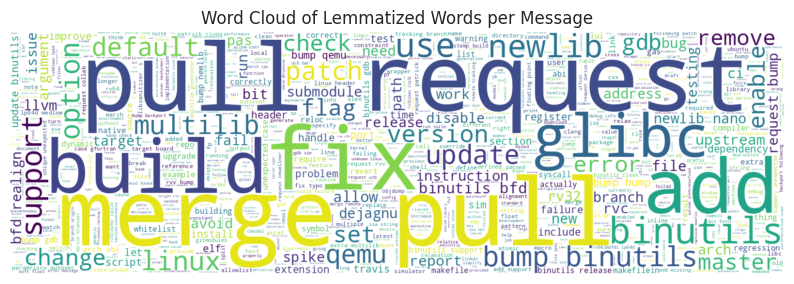

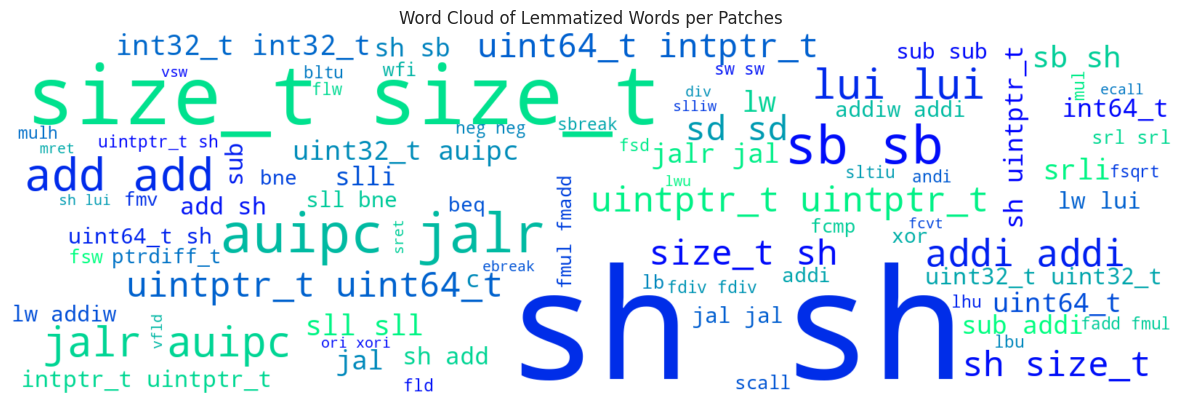

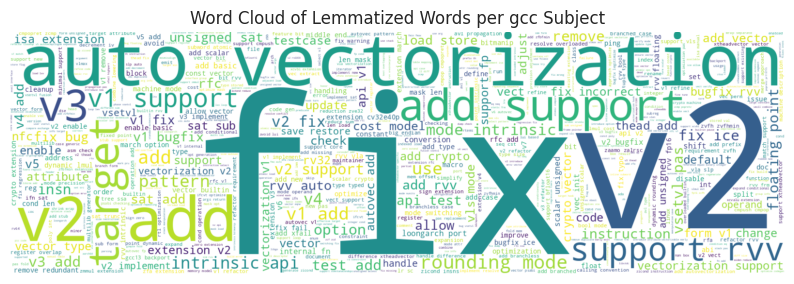

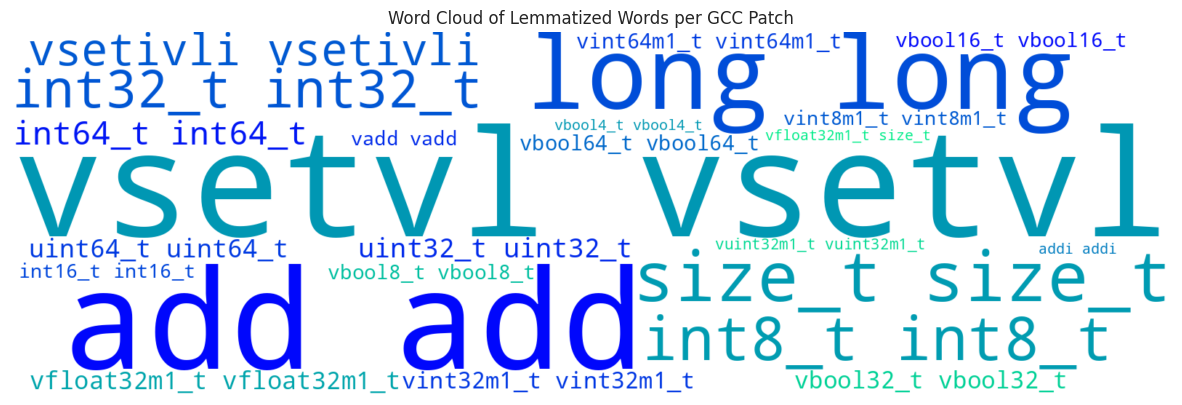

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for lemmatized words per message
lemmatized_words_per_message_str = ' '.join([' '.join(words) for words in lemmatized_words_per_message])
wordcloud_message = WordCloud(background_color="white", max_words=5000, width=1600, height=500, contour_width=1, contour_color='steelblue').generate(lemmatized_words_per_message_str)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_message, interpolation='bilinear')
plt.title('Word Cloud of Lemmatized Words per Message')
plt.axis('off')
plt.show()

# Generate word cloud for lemmatized words per patches
lemmatized_words_per_patches_str = ' '.join([' '.join(words) for words in lemmatized_words_per_patch])
wordcloud_patches = WordCloud(background_color="white",colormap='winter', max_words=1000, width=1600, height=500, contour_width=1, contour_color='steelblue',max_font_size=210,min_font_size=20).generate(lemmatized_words_per_patches_str)

plt.figure(figsize=(15, 20))
plt.imshow(wordcloud_patches, interpolation='bilinear')
plt.title('Word Cloud of Lemmatized Words per Patches')
plt.axis('off')
plt.show()

# Generate word cloud for lemmatized words per subject
lemmatized_words_per_subject_str = ' '.join([' '.join(words) for words in lemmatized_words_per_subject])
wordcloud_subject = WordCloud(background_color="white", max_words=5000, width=1600, height=500, contour_width=1, contour_color='steelblue').generate(lemmatized_words_per_subject_str)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_subject, interpolation='bilinear')
plt.title('Word Cloud of Lemmatized Words per gcc Subject')
plt.axis('off')
plt.show()

# Generate word cloud for lemmatized words per gcc patch
lemmatized_words_per_gcc_patch_str = ' '.join([' '.join(words) for words in lemmatized_words_per_gcc_patch])
wordcloud_gcc_patch = WordCloud(background_color="white",colormap='winter', max_words=1000, width=1600, height=500, contour_width=1, contour_color='steelblue',min_font_size=20,max_font_size=210).generate(lemmatized_words_per_gcc_patch_str)

plt.figure(figsize=(15, 20))
plt.imshow(wordcloud_gcc_patch, interpolation='bilinear')
plt.title('Word Cloud of Lemmatized Words per GCC Patch')
plt.axis('off')
plt.show()


# **Step:9 Create and Process Corpora Using Gensim**

The following next six sections performs the following tasks to further process data for topic modeling:

* Import Required Libraries
* Create Dictionary and Corpus for Each Text Source (commit messages, subjects, patches, and GCC patches)
* Convert text into a bag-of-words (BoW) corpus
* Apply TF-IDF transformation to weigh terms
* Print sample dictionary entries, corpus and length of corpus

In [31]:
import gensim
from gensim import corpora,models
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import Word2Vec

In [32]:

from pprint import pprint
# Create a dictionary from lemmatized words ofcommit messages
dictionarycm = corpora.Dictionary(lemmatized_words_per_message)

# Create a corpus
corpuscm = [dictionarycm.doc2bow(lemmatized_words) for lemmatized_words in lemmatized_words_per_message]
tfidfcm = models.TfidfModel(corpuscm,smartirs="ntc")
corpus_tfidfcm = tfidfcm[corpuscm]

print("First 1000 entries of the dictionary:")
pprint(list(dictionarycm.items())[:100])

print("\nFirst 5 entries of the corpus:")
pprint(corpuscm[:5])


First 1000 entries of the dictionary:
[(0, 'add'),
 (1, 'build'),
 (2, 'carv'),
 (3, 'forth'),
 (4, 'ic'),
 (5, 'linux'),
 (6, 'merge'),
 (7, 'ng'),
 (8, 'nommu'),
 (9, 'pull'),
 (10, 'request'),
 (11, 'support'),
 (12, 'uclibc'),
 (13, 'bump'),
 (14, 'case'),
 (15, 'enable'),
 (16, 'gfortran'),
 (17, 'ilp32'),
 (18, 'ilp32d'),
 (19, 'lp64'),
 (20, 'lp64d'),
 (21, 'medlow'),
 (22, 'multilib'),
 (23, 'qemu'),
 (24, 'result'),
 (25, 'rv32imac'),
 (26, 'rv32imafdc'),
 (27, 'rv64imac'),
 (28, 'rv64imafdc'),
 (29, 'summary'),
 (30, 'unexpected'),
 (31, 'unique'),
 (32, 'glibc'),
 (33, 'binutils'),
 (34, 'gdb'),
 (35, 'release'),
 (36, 'version'),
 (37, 'header'),
 (38, 'install'),
 (39, 'library'),
 (40, 'openmp'),
 (41, 'sysroot'),
 (42, 'clonning'),
 (43, 'progress'),
 (44, 'submodules'),
 (45, 'fix'),
 (46, 'lib'),
 (47, 'llvmgold'),
 (48, 'macos'),
 (49, 'shared'),
 (50, 'suffix'),
 (51, 'llvm'),
 (52, 'musl'),
 (53, 'cause'),
 (54, 'clang'),
 (55, 'command'),
 (56, 'default'),
 (57, 'd

In [33]:

from pprint import pprint
# Create a dictionary from lemmatized words ofcommit messages
dictionary_sub = corpora.Dictionary(lemmatized_words_per_subject)

# Create a corpus
corpus_sub = [dictionary_sub.doc2bow(lemmatized_words) for lemmatized_words in lemmatized_words_per_subject]
tfidf_sub = models.TfidfModel(corpus_sub,smartirs="ntc")
corpus_tfidf_sub = tfidf_sub[corpus_sub]

print("First 1000 entries of the dictionary:")
pprint(list(dictionary_sub.items())[:100])

print("\nFirst 5 entries of the corpus:")
pprint(corpus_sub[:5])


First 1000 entries of the dictionary:
[(0, 'nfc'),
 (1, 'pr105314'),
 (2, 'use'),
 (3, 'zicond'),
 (4, 'attribute'),
 (5, 'correct'),
 (6, 'idx'),
 (7, 'mode'),
 (8, 'pr116149'),
 (9, 'variant'),
 (10, 'viwalu'),
 (11, 'wx'),
 (12, 'accel'),
 (13, 'coeffs'),
 (14, 'degree'),
 (15, 'int'),
 (16, 'num'),
 (17, 'offloading'),
 (18, 'poly'),
 (19, 'streaming'),
 (20, 'support'),
 (21, 'expand'),
 (22, 'necessary'),
 (23, 'pr116086'),
 (24, 'slide'),
 (25, 'subreg'),
 (26, 'add'),
 (27, 'b23'),
 (28, 'profile'),
 (29, 'rfc'),
 (30, 'rva'),
 (31, 'implement'),
 (32, 'oct'),
 (33, 'quad'),
 (34, 'sat'),
 (35, 'scalar'),
 (36, 'trunc'),
 (37, 'v1'),
 (38, 'abi'),
 (39, 'deprecation'),
 (40, 'lp64e'),
 (41, 'v2'),
 (42, 'warning'),
 (43, 'extension'),
 (44, 'ilp32e'),
 (45, 'reject'),
 (46, 'dg'),
 (47, 'fix'),
 (48, 'typo'),
 (49, 'clash'),
 (50, 'protection'),
 (51, 'stack'),
 (52, 'vector'),
 (53, 'ice'),
 (54, 'rv32'),
 (55, 'unexpected'),
 (56, 'xtheadmemidx'),
 (57, 'check'),
 (58, 'exten

In [34]:

from pprint import pprint
# Create a dictionary from lemmatized words
dictionary = corpora.Dictionary(lemmatized_words_per_patch)

# Create a corpus
corpus = [dictionary.doc2bow(lemmatized_words) for lemmatized_words in lemmatized_words_per_patch]
tfidf = models.TfidfModel(corpus,smartirs="ntc")
corpus_tfidf = tfidf[corpus]

print("First 1000 entries of the dictionary:")
pprint(list(dictionary.items())[:100])

print("\nFirst 5 entries of the corpus:")
pprint(corpus[:5])


First 1000 entries of the dictionary:
[(0, 'sd'),
 (1, 'sh'),
 (2, 'add'),
 (3, 'sw'),
 (4, 'sub'),
 (5, 'int16_t'),
 (6, 'int32_t'),
 (7, 'int64_t'),
 (8, 'int8_t'),
 (9, 'intptr_t'),
 (10, 'ptrdiff_t'),
 (11, 'sb'),
 (12, 'size_t'),
 (13, 'uint16_t'),
 (14, 'uint32_t'),
 (15, 'uint64_t'),
 (16, 'uint8_t'),
 (17, 'uintptr_t'),
 (18, 'lui'),
 (19, 'lw'),
 (20, 'fld'),
 (21, 'flw'),
 (22, 'fsd'),
 (23, 'fsw'),
 (24, 'seqz'),
 (25, 'beq'),
 (26, 'blt'),
 (27, 'bne'),
 (28, 'csrrw'),
 (29, 'ebreak'),
 (30, 'ecall'),
 (31, 'mret'),
 (32, 'rdcycleh'),
 (33, 'rdinstret'),
 (34, 'rdinstreth'),
 (35, 'sbreak'),
 (36, 'scall'),
 (37, 'sret'),
 (38, 'uret'),
 (39, 'wfi'),
 (40, 'addi'),
 (41, 'csrrc'),
 (42, 'csrrs'),
 (43, 'vfld'),
 (44, 'vflw'),
 (45, 'vlb'),
 (46, 'vlbu'),
 (47, 'vld'),
 (48, 'vlh'),
 (49, 'vlhu'),
 (50, 'vlw'),
 (51, 'vlwu'),
 (52, 'vsb'),
 (53, 'vsd'),
 (54, 'vsetvl'),
 (55, 'vsh'),
 (56, 'vsw'),
 (57, 'fence'),
 (58, 'andi'),
 (59, 'slli'),
 (60, 'srli'),
 (61, 'fcmp'),
 (

In [35]:
from pprint import pprint

gcc_dictionary = corpora.Dictionary(lemmatized_words_per_gcc_patch)

gcc_corpus = [gcc_dictionary.doc2bow(lemmatized_words) for lemmatized_words in lemmatized_words_per_gcc_patch]
gcc_tfidf = models.TfidfModel(gcc_corpus,smartirs='ntc')
gcc_corpus_tfidf = gcc_tfidf[gcc_corpus]

print("First 1000 entries of the GCC dictionary:")
pprint(list(gcc_dictionary.items())[:100])

print("\nFirst 5 entries of the GCC corpus:")
pprint(gcc_corpus[:5])


First 1000 entries of the GCC dictionary:
[(0, 'add'),
 (1, 'sub'),
 (2, 'long'),
 (3, 'vsetivli'),
 (4, 'addi'),
 (5, 'andi'),
 (6, 'slli'),
 (7, 'sltiu'),
 (8, 'sltu'),
 (9, 'srli'),
 (10, 'uint16_t'),
 (11, 'uint32_t'),
 (12, 'uint64_t'),
 (13, 'uint8_t'),
 (14, 'div'),
 (15, 'mul'),
 (16, 'neg'),
 (17, 'fence'),
 (18, 'lr.w'),
 (19, 'sc.w'),
 (20, 'size_t'),
 (21, 'xor'),
 (22, 'vsetvl'),
 (23, 'sd'),
 (24, 'sw'),
 (25, 'bge'),
 (26, 'int32_t'),
 (27, 'int64_t'),
 (28, 'lwu'),
 (29, 'ecall'),
 (30, 'vadd'),
 (31, 'vdiv'),
 (32, 'vmul'),
 (33, 'vsub'),
 (34, 'vfmadd'),
 (35, 'vfmsub'),
 (36, 'vfmul'),
 (37, 'vfnmacc'),
 (38, 'vfnmsub'),
 (39, 'vmerge'),
 (40, 'fclass'),
 (41, 'fcmp'),
 (42, 'int16_t'),
 (43, 'addw'),
 (44, 'vrgather'),
 (45, 'vssubu'),
 (46, 'vfloat16m1_t'),
 (47, 'vfloat16m2_t'),
 (48, 'vfloat16m4_t'),
 (49, 'vfloat16mf2_t'),
 (50, 'vfloat16mf4_t'),
 (51, 'vfloat32m1_t'),
 (52, 'vfloat32m2_t'),
 (53, 'vfloat32m4_t'),
 (54, 'vfloat32mf2_t'),
 (55, 'vfloat64m1_t'),
 

In [36]:
print('Number of unique tokens in Commit messages in dataset 1: %d' % len(dictionarycm))
print('Number of documents in  Commit messages dataset 1: %d' % len(corpuscm))
print('Number of unique tokens in patches in dataset 1: %d' % len(dictionary))
print('Number of documents in patches in  dataset 1: %d ' % len(corpus))
print("------------------------------------------------")
print('Number of unique tokens in Subjects in dataset 2: %d' % len(dictionary_sub))
print('Number of documents in Subjects in  dataset 2: %d' % len(corpus_sub))
print('Number of unique tokens in patches in dataset 2: %d' % len(gcc_dictionary))
print('Number of documents in patches in  dataset 2: %d ' % len(gcc_corpus))


Number of unique tokens in Commit messages in dataset 1: 2510
Number of documents in  Commit messages dataset 1: 1256
Number of unique tokens in patches in dataset 1: 109
Number of documents in patches in  dataset 1: 952 
------------------------------------------------
Number of unique tokens in Subjects in dataset 2: 2943
Number of documents in Subjects in  dataset 2: 7428
Number of unique tokens in patches in dataset 2: 512
Number of documents in patches in  dataset 2: 10065 


# **Step 10: Create function of coherence metrics to evaluate topic models**

In [37]:
from gensim.models import CoherenceModel

def calculate_model_metrics(model, texts, dictionary, corpus):
    metrics = ['c_v', 'c_npmi', 'u_mass']
    coherence_scores = {}

    # Calculate coherence scores for all metrics
    for metric in metrics:
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, corpus=corpus, coherence=metric)
        coherence_scores[metric] = coherence_model.get_coherence()



    return {
        'coherence_scores': coherence_scores,

    }


# **Step:11 Apply Topic Modeling on data for RISC-V compiler toolchain**

This following next four sections of code execute the following tasks for generationg topics:

 * Import Required Libraries

  - LatentDirichletAllocation (LDA): Probabilistic topic modeling.

  - NMF (Non-Negative Matrix Factorization): Matrix factorization-based topic modeling.

  - TruncatedSVD (LSA - Latent Semantic Analysis): Dimensionality reduction for topic modeling.

  - TfidfVectorizer: Converts text into numerical form (TF-IDF)

* Create function to extract top words per topic, compute topic probabilities for each document and find the most probable topic per document.
* Converts lemmatized commit messages, patches, subjects and gcc patches into a TF-IDF matrix.
* Filters out rare and very common words.
* Train LDA, NMF, and LSA Models
* Extract and Print Topics.
* Evaluate topic coherence scores (c_v, c_npmi, and u_mass)

**Step 11.1 : Topic modelling for Commit messages**

In [40]:
#for commit message
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 1. Extract topics from each model
def get_topics(model, vectorizer, top_n=10):
    topics = []
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_terms = [terms[i] for i in topic.argsort()[:-top_n-1:-1]]
        topics.append(topic_terms)
    return topics

# 2. Get topic distributions for each document
def get_topic_distributions(model, X):
    return model.transform(X)

# 3. Find dominant topic for each document
def get_dominant_topics(topic_distributions):
    return np.argmax(topic_distributions, axis=1)

# Join lemmatized words for each document into a single string
document_textscm = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_message]

# Create a TfidfVectorizer

vectorizercm = TfidfVectorizer(stop_words='english',sublinear_tf=True,min_df=20,max_df=0.7)

# Fit and transform the lemmatized words
X = vectorizercm.fit_transform(document_textscm)


# Convert document-term matrix to array
document_term_matrixcm= X.toarray()



# LDA model of riscv git repo cm

lda_sklearncm = LatentDirichletAllocation(n_components=10, random_state=42,max_iter=100)
lda_sklearncm.fit(document_term_matrixcm)
lda_topicscm = get_topics(lda_sklearncm, vectorizercm)
lda_topic_distributionscm = get_topic_distributions(lda_sklearncm, X)
lda_dominant_topicscm = get_dominant_topics(lda_topic_distributionscm)
# NMF model riscv git repo cm

nmf_sklearncm = NMF(n_components=10, random_state=42,max_iter=200,l1_ratio=0.2)
nmf_sklearncm.fit(document_term_matrixcm)
nmf_topicscm = get_topics(nmf_sklearncm, vectorizercm)
nmf_topic_distributionscm = get_topic_distributions(nmf_sklearncm, X)
nmf_dominant_topicscm = get_dominant_topics(nmf_topic_distributionscm)
# LSA model riscv git repo cm

vectorizer_tfidfcm = TfidfVectorizer(sublinear_tf=True,min_df=20,max_df=0.70)
X_tfidfcm = vectorizer_tfidfcm.fit_transform(document_textscm)
lsa_sklearncm = TruncatedSVD(n_components=10, random_state=42, n_iter=50,power_iteration_normalizer='LU')
lsa_sklearncm.fit(X_tfidfcm)
lsa_topicscm = get_topics(lsa_sklearncm, vectorizer_tfidfcm)
lsa_topic_distributionscm = get_topic_distributions(lsa_sklearncm, X_tfidfcm)
lsa_dominant_topicscm = get_dominant_topics(lsa_topic_distributionscm)

#riscv gnu toolchain cm
# Print topics from each model
print("topics from riscv gnu toolchain Commit messages")
def print_topics(topics, model_name):
    print(f"\nTopics from {model_name}:")
    for idx, topic in enumerate(topics):

        topic_str = ', '.join(topic)
        print(f"Topic {idx + 1}: {topic_str}")
print_topics(lda_topicscm, "LDA")
print_topics(nmf_topicscm, "NMF")
print_topics(lsa_topicscm, "LSA")
print("\n")

#'c_v','c_npmi', 'u_mass'
def calculate_coherence_score(topics, texts, dictionary,coherence_measure,topn):
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence_measure,topn=10)
    return coherence_model.get_coherence()

coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    lda_coherence_scorecm = calculate_coherence_score(lda_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    nmf_coherence_scorecm = calculate_coherence_score(nmf_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    lsa_coherence_scorecm = calculate_coherence_score(lsa_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)


    coherence_scores[f'LDA_{measure}'] = lda_coherence_scorecm
    coherence_scores[f'NMF_{measure}'] = nmf_coherence_scorecm
    coherence_scores[f'LSA_{measure}'] = lsa_coherence_scorecm


for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")


topics from riscv gnu toolchain Commit messages

Topics from LDA:
Topic 1: fix, linux, header, arch, bug, issue, target, build, abi, patch
Topic 2: qemu, error, avoid, improve, isa, library, install, path, link, script
Topic 3: add, option, set, clean, binutils, check, port, patch, remove, makefile
Topic 4: glibc, version, build, bit, file, run, travis, test, problem, ci
Topic 5: binutils, bump, bfd, realign, rvv, support, merge, following, branch, fix
Topic 6: use, branch, release, remove, address, binutils, submodule, testing, collab, http
Topic 7: update, binutils, rvc, support, change, disable, instruction, work, elf, check
Topic 8: merge, pull, request, bump, fix, master, dejagnu, update, collab, add
Topic 9: enable, case, allow, need, argument, user, default, building, rv32, support
Topic 10: newlib, gdb, bump, new, add, spike, report, multilib, sim, flag

Topics from NMF:
Topic 1: merge, request, pull, master, update, branch, release, collab, rvv, ci
Topic 2: binutils, update, r

**Step 11.2 : Topic modelling for Commit patches**

In [41]:
#for commit patches
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 1. Extract topics from each model
def get_topics(model, vectorizer, top_n=10):
    topics = []
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_terms = [terms[i] for i in topic.argsort()[:-top_n-1:-1]]
        topics.append(topic_terms)
    return topics

# 2. Get topic distributions for each document
def get_topic_distributions(model, X):
    return model.transform(X)

# 3. Find dominant topic for each document
def get_dominant_topics(topic_distributions):
    return np.argmax(topic_distributions, axis=1)

# Join lemmatized words for each document into a single string
document_textspat = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_patch]

# Create a TfidfVectorizer
vectorizerpat = TfidfVectorizer(stop_words='english',sublinear_tf=True,min_df=0.0006,max_df=0.95)

# Fit and transform the lemmatized words
Xpat = vectorizerpat.fit_transform(document_textspat)

# Convert document-term matrix to array
document_term_matrixpat = Xpat.toarray()

# LDA model of riscv git repo patches

lda_sklearn = LatentDirichletAllocation(n_components=10, random_state=0,max_iter=50,doc_topic_prior=0.1, topic_word_prior=0.1,learning_method="online",learning_decay=0.5)
lda_sklearn.fit(document_term_matrixpat)
lda_topics = get_topics(lda_sklearn, vectorizerpat)
lda_topic_distributions = get_topic_distributions(lda_sklearn, Xpat)
lda_dominant_topics = get_dominant_topics(lda_topic_distributions)
# NMF model riscv git repo patches

nmf_sklearn = NMF(n_components=10, random_state=42,max_iter=200,l1_ratio=0.2)
nmf_sklearn.fit(document_term_matrixpat)
nmf_topics = get_topics(nmf_sklearn, vectorizerpat)
nmf_topic_distributions = get_topic_distributions(nmf_sklearn, Xpat)
nmf_dominant_topics = get_dominant_topics(nmf_topic_distributions)
# LSA model riscv git repo patches

vectorizer_tfidfpat = TfidfVectorizer(sublinear_tf=True,min_df=0.0006,max_df=0.95)
X_tfidfpat= vectorizer_tfidfpat.fit_transform(document_textspat)
lsa_sklearn = TruncatedSVD(n_components=10, random_state=42,algorithm='randomized', n_iter=50,power_iteration_normalizer="LU")
lsa_sklearn.fit(X_tfidfpat)
lsa_topics = get_topics(lsa_sklearn, vectorizer_tfidfpat)
lsa_topic_distributions = get_topic_distributions(lsa_sklearn, X_tfidfpat)
lsa_dominant_topics = get_dominant_topics(lsa_topic_distributions)
#riscv gnu toolchain
# Print topics from each model
print("topics from riscv gnu toolchain")
def print_topics(topics, model_name):
    print(f"\nTopics from {model_name}:")
    for idx, topic in enumerate(topics):

        topic_str = ', '.join(topic)
        print(f"Topic {idx + 1}: {topic_str}")
print_topics(lda_topics, "LDA")
print_topics(nmf_topics, "NMF")
print_topics(lsa_topics, "LSA")
print("\n")

#'c_v', 'c_npmi', 'u_mass'
def calculate_coherence_score(topics, texts, dictionary,coherence_measure,topn=10):
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence_measure,topn=10)
    return coherence_model.get_coherence()

coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    lda_coherence_score = calculate_coherence_score(lda_topics, lemmatized_words_per_patch, dictionary, measure,topn=10)
    nmf_coherence_score = calculate_coherence_score(nmf_topics, lemmatized_words_per_patch, dictionary, measure,topn=10)
    lsa_coherence_score = calculate_coherence_score(lsa_topics, lemmatized_words_per_patch, dictionary, measure,topn=10)


    coherence_scores[f'LDA_{measure}'] = lda_coherence_score
    coherence_scores[f'NMF_{measure}'] = nmf_coherence_score
    coherence_scores[f'LSA_{measure}'] = lsa_coherence_score


for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")



topics from riscv gnu toolchain

Topics from LDA:
Topic 1: sh, add, addi, lui, lw, sub, addiw, uint32_t, srli, srai
Topic 2: lb, fsw, fld, fsd, flw, lwu, sw, ori, lh, lhu
Topic 3: seqz, fcmp, feq, srai, bgeu, sub, bleu, int8_t, int16_t, uint16_t
Topic 4: sd, amoswap, bleu, srai, sw, lbu, lhu, ori, sll, remuw
Topic 5: sw, fmv, lbu, lhu, bleu, lw, sd, lui, sll, bltu
Topic 6: slli, andi, beq, srli, bgeu, sub, add, srai, neg, uint32_t
Topic 7: wfi, jal, bne, sll, scall, div, mul, mulh, neg, sret
Topic 8: size_t, int32_t, uint32_t, sb, uint64_t, uintptr_t, ptrdiff_t, int64_t, sub, bleu
Topic 9: srai, bgeu, sub, bleu, int16_t, uint16_t, int8_t, uint8_t, srli, uint32_t
Topic 10: auipc, jalr, jal, fdiv, xor, sltu, fence, neg, fmadd, fmul

Topics from NMF:
Topic 1: sh, uintptr_t, intptr_t, sb, int16_t, int8_t, uint8_t, uint16_t, ptrdiff_t, lw
Topic 2: add, andi, bne, sltiu, sub, sb, jal, slli, rdcycle, remuw
Topic 3: auipc, jalr, jal, uint32_t, srli, xor, xori, sw, slt, ori
Topic 4: addi, scall

**Step 11.3 : Topic modelling for mailing list subjects**

In [42]:
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 1. Extract topics from each model
def get_topics(model, vectorizer, top_n=10):
    topics = []
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_terms = [terms[i] for i in topic.argsort()[:-top_n-1:-1]]
        topics.append(topic_terms)
    return topics

# 2. Get topic distributions for each document
def get_topic_distributions(model, X):
    return model.transform(X)

# 3. Find dominant topic for each document
def get_dominant_topics(topic_distributions):
    return np.argmax(topic_distributions, axis=1)

# Join lemmatized words for each document into a single string
document_texts_sub = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_subject]

# Create a TfidfVectorizer
vectorizer_sub = TfidfVectorizer(stop_words='english', sublinear_tf=True, min_df=20, max_df=0.90)

# Fit and transform the lemmatized words
X = vectorizer_sub.fit_transform(document_texts_sub)


# Convert document-term matrix to array if you need to inspect it further (optional)
document_term_matrix_sub = X.toarray()

# LDA model for mailing list subjects

lda_sklearn_sub = LatentDirichletAllocation(n_components=20, random_state=0,max_iter=100,learning_decay= 0.9, learning_method='online')
lda_sklearn_sub.fit(document_term_matrix_sub)
lda_topics_sub = get_topics(lda_sklearn_sub, vectorizer_sub)
lda_topic_distributions_sub = get_topic_distributions(lda_sklearn_sub, X)
lda_dominant_topics_sub = get_dominant_topics(lda_topic_distributions_sub)
lda_sklearn_sub.perplexity(X)
# NMF model for mailing list subjects

nmf_sklearn_sub = NMF(n_components=20, random_state=0,max_iter=50,l1_ratio=0.2)
nmf_sklearn_sub.fit(document_term_matrix_sub)
nmf_topics_sub = get_topics(nmf_sklearn_sub, vectorizer_sub)
nmf_topic_distributions_sub = get_topic_distributions(nmf_sklearn_sub, X)
nmf_dominant_topics_sub = get_dominant_topics(nmf_topic_distributions_sub)
# LSA model for mailing list subjects
vectorizer_tfidf_sub = TfidfVectorizer(sublinear_tf=True,min_df=20,max_df=0.90)
X_tfidf_sub = vectorizer_tfidf_sub.fit_transform(document_texts_sub)
lsa_sklearn_sub= TruncatedSVD(n_components=20, random_state=0, n_iter=10,power_iteration_normalizer="auto")
lsa_sklearn_sub.fit(X_tfidf_sub)
lsa_topics_sub = get_topics(lsa_sklearn_sub, vectorizer_tfidf_sub)
lsa_topic_distributions_sub = get_topic_distributions(lsa_sklearn_sub, X_tfidf_sub)
lsa_dominant_topics_sub = get_dominant_topics(lsa_topic_distributions_sub)
#riscv gcc mail list sub
# Print topics from each model
print("topics from GCC mail list Subject")
def print_topics(topics, model_name):
    print(f"\nTopics from {model_name}:")
    for idx, topic in enumerate(topics):

        topic_str = ', '.join(topic)
        print(f"Topic {idx + 1}: {topic_str}")
print_topics(lda_topics_sub, "LDA")
print_topics(nmf_topics_sub, "NMF")
print_topics(lsa_topics_sub, "LSA")
print("\n")

#'c_v', 'c_npmi', 'u_mass'
def calculate_coherence_score(topics, texts, dictionary,coherence_measure):
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence_measure)
    return coherence_model.get_coherence()

coherence_measures = ['c_v',  'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    lda_coherence_score_sub = calculate_coherence_score(lda_topics_sub, lemmatized_words_per_subject, dictionary_sub, measure)
    nmf_coherence_score_sub = calculate_coherence_score(nmf_topics_sub, lemmatized_words_per_subject, dictionary_sub, measure)
    lsa_coherence_score_sub = calculate_coherence_score(lsa_topics_sub, lemmatized_words_per_subject, dictionary_sub, measure)


    coherence_scores[f'LDA_{measure}'] = lda_coherence_score_sub
    coherence_scores[f'NMF_{measure}'] = nmf_coherence_score_sub
    coherence_scores[f'LSA_{measure}'] = lsa_coherence_score_sub


for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn(


topics from GCC mail list Subject

Topics from LDA:
Topic 1: v4, const, zero, v3, support, avoid, extension, add, intrinsics, expansion
Topic 2: target, attribute, function, size, fix, hook, run, conversion, backport, memory
Topic 3: code, operation, optimization, cond, improve, init, shift, sequence, binary, ceil
Topic 4: remove, check, redundant, reg, internal, integer, zvfh, autovectorization, linux, bool
Topic 5: operand, loongarch, libatomic, multilib, requirement, flag, index, pru, args, static
Topic 6: option, isa, add, march, extension, thead, support, end, compare, order
Topic 7: fix, cost, testcase, zcmp, zicond, model, nfc, split, build, refine
Topic 8: autovec, v1, rounding, fp, mode, warning, support, int, comparison, add
Topic 9: mode, vls, bugfix, insn, vec, rv32, v1, fix, ice, issue
Topic 10: port, pattern, optimize, constraint, regression, missing, cleanup, fix, address, op
Topic 11: allow, error, access, rvv, fix, block, arch, early, message, v1
Topic 12: vectorizatio

**Step 11.4 : Topic modelling for mailing list patches**

In [45]:
#gcc patch
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 1. Extract topics from each model
def get_topics(model, vectorizer, top_n=10):
    topics = []
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_terms = [terms[i] for i in topic.argsort()[:-top_n-1:-1]]
        topics.append(topic_terms)
    return topics
# 2. Get topic distributions for each document
def get_topic_distributions(model, X):
    return model.transform(X)

# 3. Find dominant topic for each document
def get_dominant_topics(topic_distributions):
    return np.argmax(topic_distributions, axis=1)
# Join lemmatized words for each document into a single string
gcc_document_texts = [' '.join(gcc_lemmatized_words) for gcc_lemmatized_words in  lemmatized_words_per_gcc_patch]

# Create a CountVectorizer with the updated tokenizer
vectorizergpat = TfidfVectorizer(stop_words='english',sublinear_tf=True,min_df=0.0006,max_df=0.90)

# Fit and transform the lemmatized words
Xgpat = vectorizergpat.fit_transform(gcc_document_texts)

# Convert document-term matrix to array
gcc_document_term_matrixgpat = Xgpat.toarray()

# LDA model for gcc patches mail archieve

gcc_lda_sklearn = LatentDirichletAllocation(n_components=10, random_state=0,max_iter=100,learning_method="online",learning_decay=0.9,doc_topic_prior=0.05, topic_word_prior=0.01)
gcc_lda_sklearn.fit(gcc_document_term_matrixgpat)
gcc_lda_topics = get_topics(gcc_lda_sklearn, vectorizergpat)
gcc_lda_topic_distributions = get_topic_distributions(gcc_lda_sklearn, Xgpat)
gcc_lda_dominant_topics = get_dominant_topics(gcc_lda_topic_distributions)

# NMF model  for gcc patches mail archieve

gcc_nmf_sklearn = NMF(n_components=10, random_state=0,max_iter=100,l1_ratio=0.2,init='random')
gcc_nmf_sklearn.fit(gcc_document_term_matrixgpat)
gcc_nmf_topics = get_topics(gcc_nmf_sklearn, vectorizergpat)
gcc_nmf_topic_distributions = get_topic_distributions(gcc_nmf_sklearn, Xgpat)
gcc_nmf_dominant_topics = get_dominant_topics(gcc_nmf_topic_distributions)
# LSA model  for gcc patches mail archieve

vectorizer_tfidfgpat = TfidfVectorizer(sublinear_tf=True,min_df=0.0006,max_df=0.90)
X_tfidfgpat = vectorizer_tfidfgpat.fit_transform(gcc_document_texts)
gcc_lsa_sklearn = TruncatedSVD(n_components=10, random_state=0,n_iter=10,power_iteration_normalizer="auto")
gcc_lsa_sklearn.fit(X_tfidfgpat)
gcc_lsa_topics = get_topics(gcc_lsa_sklearn, vectorizer_tfidfgpat)
gcc_lsa_topic_distributions = get_topic_distributions(gcc_lsa_sklearn, X_tfidfgpat)
gcc_lsa_dominant_topics = get_dominant_topics(gcc_lsa_topic_distributions)
#gcc riscv patch
# Print topics from each model
print("topics from gcc riscv patch")
def print_topics(topics, model_name):
    print(f"\nTopics from {model_name}:")
    for idx, topic in enumerate(topics):

        topic_str = ', '.join(topic)
        print(f"Topic {idx + 1}: {topic_str}")
print_topics(gcc_lda_topics, "LDA")
print_topics(gcc_nmf_topics, "NMF")
print_topics(gcc_lsa_topics, "LSA")
print("\n")
#'c_v', 'c_npmi', 'u_mass'
def calculate_coherence_score(topics, texts, dictionary,coherence_measure):
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence_measure)
    return coherence_model.get_coherence()

coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    lda_coherence_score = calculate_coherence_score(gcc_lda_topics, lemmatized_words_per_gcc_patch, gcc_dictionary, measure)
    nmf_coherence_score = calculate_coherence_score(gcc_nmf_topics, lemmatized_words_per_gcc_patch, gcc_dictionary, measure)
    lsa_coherence_score = calculate_coherence_score(gcc_lsa_topics, lemmatized_words_per_gcc_patch, gcc_dictionary, measure)


    coherence_scores[f'gcc_skLDA_{measure}'] = lda_coherence_score
    coherence_scores[f'gcc_skNMF_{measure}'] = nmf_coherence_score
    coherence_scores[f'gcc_skLSA_{measure}'] = lsa_coherence_score


for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")



topics from gcc riscv patch

Topics from LDA:
Topic 1: add, addi, feq, lui, long, xor, slli, srli, uint16_t, uint64_t
Topic 2: fmv, fcvt, vint8m1_t, flt, fld, srai, long, vint8m2_t, feq, vint16m2_t
Topic 3: sh, addi, ld, add, long, sw, lui, slli, bne, sd
Topic 4: size_t, vbool64_t, vbool8_t, vbool16_t, vbool32_t, vbool1_t, vbool4_t, vbool2_t, vuint8m1_t, vint8mf8_t
Topic 5: vsetvl, size_t, vfloat32m1_t, add, vsetivli, vint32m1_t, vbool32_t, vadd, int32_t, vset
Topic 6: vfmul, vfwmul, slt, vle, vfdiv, vext, vse, fdiv, auipc, add
Topic 7: vsll, snez, fmin, fmax, vsrl, seqz, vsext, vsra, neg, srl
Topic 8: fence, lr, sc, add, long, vread_csr, intptr_t, vwrite_csr, vfloat16m1x5_t, vfloat16m1x3_t
Topic 9: uint64_t, sub, int64_t, uint32_t, int32_t, uint16_t, uint8_t, int8_t, int16_t, neg
Topic 10: long, add, xor, div, mul, vmerge, vfmadd, vdiv, vmul, vfmsub

Topics from NMF:
Topic 1: add, xor, div, sw, lr, sc, vmerge, ld, size_t, neg
Topic 2: long, xor, fcvt, neg, slli, andi, srli, mul, int64

# **Step 12: Topic Modeling on RISC-V data using Top2Vec topic model**
The following next four sections of code perform following tasks to extract topics from commit messages,commit patches, mailing list subjects and patches:

* Install and import required libraries
* Convert lemmatized data of each text source into a list of strings for training.
* Train the Top2Vec Model
* Extract and print topics
*  Evaluate Topic Coherence (c_v, c_npmi, and u_mass)


In [46]:
!pip install top2vec
!pip install top2vec[sentence_encoders]

**Step 12.1 : Top2vec Topic modelling for commit messages**

In [49]:

from top2vec import Top2Vec

document_textscm = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_message]
top2vec_modelcm = Top2Vec(documents=document_textscm, speed="deep-learn", workers=1,min_count=20,embedding_model='doc2vec',umap_args = {'random_state': 0})
top2vec_modelcm.save("top2vec_modelcm")
print("\n ----------------------------")
print(top2vec_modelcm.get_num_topics())
# Get the topics
topic_wordscm, word_scores, topic_numscm = top2vec_modelcm.get_topics()

# Print the topics
print("\nTop2Vec Topics of git repo commit messages:")
for topic_numcm in topic_numscm:
    print(f"Topic {topic_numcm}: {', '.join(topic_wordscm[topic_numcm][:10])}")
print("\n")
# Calculate the coherence score for Top2Vec git repo
top2vec_topicscm = [topic_wordscm[i][:10] for i in topic_numscm]


coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    top2vec_coherence_scorecm = calculate_coherence_score(top2vec_topicscm, lemmatized_words_per_message, dictionarycm, measure)


    coherence_scores[f'Top2vec_{measure}'] =  top2vec_coherence_scorecm



for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")

2025-03-23 10:22:03,829 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2025-03-23 10:22:03,932 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-03-23 10:22:53,634 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
2025-03-23 10:23:02,470 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all


 ----------------------------
21

Top2Vec Topics of git repo commit messages:
Topic 0: master, travis, musl, submodule, ci, source, glibc, building, branch, remove
Topic 1: section, link, library, problem, dependency, clean, avoid, file, missing, instruction
Topic 2: install, nano, report, check, newlib, new, change, linux, header, gdb
Topic 3: library, section, link, problem, bfd, instruction, file, dependency, clean, avoid
Topic 4: source, master, submodule, musl, branch, building, libsanitizer, need, allow, glibc
Topic 5: master, submodule, source, ci, musl, allow, flag, user, libsanitizer, need
Topic 6: link, bit, library, section, file, dependency, clean, problem, release, avoid
Topic 7: submodule, realign, llvm, ci, pas, float, source, master, allow, merge
Topic 8: binutils, dejagnu, address, merge, llvm, use, realign, gdb, rvc, report
Topic 9: ci, rvv, realign, submodule, master, pull, disable, travis, musl, merge
Topic 10: disable, python, nano, port, pull, check, newlib, inst

**Step 12.2 : Top2vec Topic modelling for commit patches**

In [50]:

from top2vec import Top2Vec

document_texts = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_patch]
top2vec_model = Top2Vec(documents=document_texts, speed="deep-learn", workers=1,min_count=1,embedding_model='doc2vec',umap_args = {'random_state': 100})
top2vec_model.save("top2vec_model")
print("\n ----------------------------")
print(top2vec_model.get_num_topics())
# Get the topics
topic_words, word_scores, topic_nums = top2vec_model.get_topics()

# Print the topics
print("\nTop2Vec Topics of git repo Patches:")
for topic_num in topic_nums:
    print(f"Topic {topic_num}: {', '.join(topic_words[topic_num][:15])}")
print("\n")
# Calculate the coherence score for Top2Vec git repo
top2vec_topics = [topic_words[i][:15] for i in topic_nums]


coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    top2vec_coherence_score = calculate_coherence_score(top2vec_topics, lemmatized_words_per_patch, dictionary, measure)


    coherence_scores[f'Top2vec_{measure}'] =  top2vec_coherence_score



for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")

2025-03-23 10:23:11,186 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2025-03-23 10:23:11,237 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-03-23 10:23:38,195 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
2025-03-23 10:23:46,329 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all


 ----------------------------
5

Top2Vec Topics of git repo Patches:
Topic 0: amoswap, fence, add, sb, intptr_t, int, uintptr_t, uint, ptrdiff_t, size_t, sh, sw, bleu, ori, xori
Topic 1: fence, amoswap, size_t, intptr_t, sh, uint, ptrdiff_t, sb, uintptr_t, int, add, sll, srl, sub, fmadd
Topic 2: sltu, slli, rdinstret, srai, rdinstreth, divw, beq, sw, rdcycleh, bleu, uret, sd, sbreak, divuw, flw
Topic 3: rem, feq, csrrsi, mulw, mul, div, andi, vfld, mulh, seqz, jalr, slliw, lui, rdcycle, sltiu
Topic 4: fadd, srli, fcvt, fsqrt, fmul, slt, fmadd, auipc, fdiv, fcmp, jal, xor, bgeu, seqz, fmv


Top2vec_c_v Coherence Score: 0.3971427811973419
Top2vec_c_npmi Coherence Score: -0.19436027990735136
Top2vec_u_mass Coherence Score: -12.617520335206446


**Step 12.3 : Top2vec Topic modelling for mailing list subjects**

In [51]:
from top2vec import Top2Vec
gcc_document_texts_sub = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_subject]
gcc_top2vec_model_sub =Top2Vec(documents=gcc_document_texts_sub, speed="deep-learn", workers=1,min_count=20,embedding_model='universal-sentence-encoder',umap_args = {'random_state': 100},verbose=True)
gcc_top2vec_model_sub.save("gcc_top2vec_model_sub")
print("\n ----------------------------")
print(gcc_top2vec_model_sub.get_num_topics())

gcc_topic_words_sub, gcc_word_scores_sub, gcc_topic_nums_sub = gcc_top2vec_model_sub.get_topics()

# Print the topics
print("\n gcc Top2Vec Topics of Mail list subjects:")
for gcc_topic_num_sub in gcc_topic_nums_sub:
    print(f"Topic {gcc_topic_num_sub}: {', '.join(gcc_topic_words_sub[gcc_topic_num_sub][:10])}")
print("\n")
# Calculate the coherence score for Top2Vec gcc suject mail archieve
gcc_top2vec_topics_sub = [gcc_topic_words_sub[i][:10] for i in gcc_topic_nums_sub]
coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    gcc_top2vec_coherence_score_sub = calculate_coherence_score(gcc_top2vec_topics_sub, lemmatized_words_per_subject, dictionary_sub, measure)


    coherence_scores[f'gcc_Top2vec_{measure}'] =  gcc_top2vec_coherence_score_sub



for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")


2025-03-23 10:24:10,176 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-03-23 10:24:10,322 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2025-03-23 10:24:33,135 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-03-23 10:24:36,975 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py


 ----------------------------
169

 gcc Top2Vec Topics of Mail list subjects:
Topic 0: fix, bugfix, fixed, issue, replace, remove, adjust, eliminate, restore, improve
Topic 1: bugfix, fix, bug, fixed, error, disable, enum, issue, regenerate, typo
Topic 2: target, align, bugfix, backport, constraint, intrinsics, args, iterator, int, macro
Topic 3: support, expander, maintainer, extend, helper, extension, vmv, bugfix, merge, widening
Topic 4: api, rounding, backport, nfc, intrinsic, ceil, integer, attribute, align, bug
Topic 5: vector, vec, const, iterator, vectorized, scalar, bool, refactor, backport, tuple
Topic 6: add, support, combine, enable, helper, backport, ternary, disable, simplify, redundant
Topic 7: extension, expander, expansion, extend, expand, ternary, widening, rfa, bugfix, merge
Topic 8: ice, fix, bugfix, fixed, merge, intrinsics, bug, offset, eliminate, subset
Topic 9: fix, bugfix, fail, fixed, error, failure, issue, incorrect, eliminate, typo
Topic 10: expander, elimi

**Step 12.4 : Top2vec Topic modelling for mailing list patches**

In [52]:
from top2vec import Top2Vec
gcc_document_texts = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_gcc_patch]
gcc_top2vec_model =Top2Vec(documents=gcc_document_texts, speed="deep-learn",workers=1,min_count=1,embedding_model='doc2vec',umap_args = {'random_state': 100})
gcc_top2vec_model.save("gcc_top2vec_model")
print("\n ----------------------------")
print(gcc_top2vec_model.get_num_topics())
# Get the topics
gcc_topic_words, gcc_word_scores, gcc_topic_nums = gcc_top2vec_model.get_topics()

# Print the topics
print("\n gcc Top2Vec Topics of mail list patches:")
for gcc_topic_num in gcc_topic_nums:
    print(f"Topic {gcc_topic_num}: {', '.join(gcc_topic_words[gcc_topic_num][:12])}")
# Calculate the coherence score for Top2Vec gcc patches mail archieve
gcc_top2vec_topics = [gcc_topic_words[i][:12] for i in gcc_topic_nums]
coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    gcc_top2vec_coherence_score = calculate_coherence_score(gcc_top2vec_topics, lemmatized_words_per_gcc_patch, gcc_dictionary, measure)


    coherence_scores[f'gcc_Top2vec_{measure}'] =  gcc_top2vec_coherence_score



for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")

2025-03-23 10:25:19,663 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2025-03-23 10:25:21,614 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-03-23 10:30:31,599 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
2025-03-23 10:30:41,226 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all


 ----------------------------
128

 gcc Top2Vec Topics of mail list patches:
Topic 0: or, rdtime, amoswap, lr, sc, amominu, amoxor, amoand, amomaxu, vx, vmnor_mm, amomax
Topic 1: vlswu, vlsbu, vssb, vsxh, vlsh, vs, vlsw, vlxh, vlxbu, vssw, vssh, vlshu
Topic 2: rdtime, or, amomaxu, amoand, amominu, amomax, amoxor, fclass, spn, vsetvlmax_e, intptr_t, amoor
Topic 3: rdtime, or, fclass, amomaxu, amoand, amominu, amoxor, amomax, amoswap, uintptr_t, spn, amoor
Topic 4: vmulsu, vmfirst, vx, lq, vmpopc, wv, fnmadd, vfnmacc, vmv_x_s, fnmsub, vfwsub, vfnmsub
Topic 5: amoswap, amomaxu, amoand, or, amoxor, amominu, rdtime, amomax, amoor, vrem, vsll, amoadd
Topic 6: spn, fclass, vslideup, vfmadd, vfnmsub, vfmsub, vfwmul, vfredosum, vs, vsmul, vfrdiv, vfnmacc
Topic 7: or, rdtime, amominu, amoand, amomaxu, amomax, amoxor, amoswap, spn, fclass, intptr_t, vsetvlmax_e
Topic 8: vfwmul, vmiota, vfdiv, vfrdiv, vfminmax, vfwsub, vfrecp, vget, vslideup, vfmul, vfmadd, vreinterpret
Topic 9: or, rdtime, amoxo

# **Step 13 : Topic Modelling on RISC-V data using Word2Vec model**

The following next four sections of code perform following tasks to extract topics from commit messages,commit patches, mailing list subjects and patches:

* Import required library
* Train a Word2Vec Model
* Perform K-Means clustering
* Identify Top Words per topic
* Evaluate topic coherence (c_v, c_npmi, u_mass)
*  Print coherence scores

**Step 13.1 : Word2vec Topic modelling for commit messages**

In [53]:
%%time
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine

# Train Word2Vec model
word2vec_modelcm = Word2Vec(sentences=lemmatized_words_per_message, workers=1,vector_size=100, window=20, alpha=0.01, min_count=20 ,sg=1,epochs=10,seed=100)
word_vectorscm = word2vec_modelcm.wv
word_embeddingscm = word_vectorscm.vectors  # This gives the word embeddings
wordscm = word_vectorscm.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
num_topics = 10  # Number of topics
kmeans = KMeans(n_clusters=num_topics,random_state=100)
kmeans.fit(word_embeddingscm,)

# Get cluster centers
topic_vectorscm = kmeans.cluster_centers_

# Get top words for each topic
top_words_per_topiccm = []
for i, topic_veccm in enumerate(topic_vectorscm):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_veccm, word_vec) for word_vec in word_embeddingscm])
    top_words_indices = similarities.argsort()[-10:][::-1]  # Top 15 words per topic
    top_words = [wordscm[idx] for idx in top_words_indices] # Use wordscm instead of words
    top_words_per_topiccm.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")


print("Coherence Scores of Word2vec git repo messages")
coherence_measures = ['c_v', 'c_npmi', 'u_mass']
coherence_scores = {}

for measure in coherence_measures:
    coherence_model = CoherenceModel(
        topics=top_words_per_topiccm,
        texts=lemmatized_words_per_message,
        dictionary=dictionarycm,
        coherence=measure,
        topn=10
    )
    word2vec_coherence_score = coherence_model.get_coherence()
    coherence_scores[f'word2vec_{measure}'] = word2vec_coherence_score

# Print coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")





Topic 1: link, support, improve, rv32, port, fail, address, need, add, library
Topic 2: medlow, unexpected, case, result, handle, enable, extra, extension, rv32, isa
Topic 3: link, improve, pas, fail, run, support, add, need, problem, missing
Topic 4: check, nano, newlib, report, new, gdb, linux, install, header, build
Topic 5: arch, abi, sim, handle, script, patch, extra, flag, march, option
Topic 6: link, avoid, argument, need, fail, default, merge, pas, support, improve
Topic 7: link, support, improve, test, regression, avoid, library, following, issue, failure
Topic 8: report, new, linux, gdb, install, header, use, dejagnu, build, version
Topic 9: link, improve, update, avoid, clean, support, pas, remove, library, register
Topic 10: extension, handle, script, testing, option, result, enable, string, avoid, argument
Coherence Scores of Word2vec git repo messages
word2vec_c_v Coherence Score: 0.4817367127817575
word2vec_c_npmi Coherence Score: -0.17817526164346445
word2vec_u_mass Coh

**Step 13.2 : Word2vec Topic modelling for commit patches**

In [54]:
%%time
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=lemmatized_words_per_patch,workers=1,vector_size=100,seed=0,window=20, alpha=0.03, min_count=1, sg=1, negative=20,epochs=10,min_alpha=0.0007)
word_vectors = word2vec_model.wv
word_embeddings = word_vectors.vectors  # This gives the word embeddings
words = word_vectors.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
num_topics = 20  # Number of topics
kmeans = KMeans(n_clusters=num_topics, random_state=0)
kmeans.fit(word_embeddings)

# Get cluster centers
topic_vectors = kmeans.cluster_centers_

# Get top words for each topic
top_words_per_topic = []
for i, topic_vec in enumerate(topic_vectors):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_vec, word_vec) for word_vec in word_embeddings])
    top_words_indices = similarities.argsort()[-10:][::-1]  # Top 15 words per topic
    top_words = [words[idx] for idx in top_words_indices]
    top_words_per_topic.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")


print("Coherence Scores of Word2vec git repo")
coherence_measures = ['c_v', 'c_npmi', 'u_mass']
coherence_scores = {}

for measure in coherence_measures:
    coherence_model = CoherenceModel(
        topics=top_words_per_topic,
        texts=lemmatized_words_per_patch,
        dictionary=dictionary,
        coherence=measure
    )
    word2vec_coherence_score = coherence_model.get_coherence()
    coherence_scores[f'word2vec_{measure}'] = word2vec_coherence_score

# Print coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")





Topic 1: sret, mret, blt, csrrw, vsw, uret, rdinstreth, ecall, vfld, ebreak
Topic 2: addiw, ori, c.addi, xori, c.lui, addi, lw, lui, srai, int32_t
Topic 3: int16_t, int8_t, uint8_t, uint16_t, ptrdiff_t, size_t, int64_t, sh, uint64_t, intptr_t
Topic 4: bne, srl, sll, bltu, bgeu, sub, sltiu, bleu, rdcycle, neg
Topic 5: sh, ptrdiff_t, uint64_t, int8_t, uintptr_t, int16_t, uint8_t, intptr_t, uint16_t, size_t
Topic 6: fdiv, fadd, fmul, fcvt, fcmp, fsqrt, fmadd, slt, andi, xor
Topic 7: auipc, jalr, uint32_t, srli, addi, lui, c.j, add, c.lui, jal
Topic 8: lwu, flw, lh, fld, lhu, lb, lbu, fsw, fsd, fmv
Topic 9: neg, bgeu, slli, jal, srl, bltu, bne, srli, beq, sll
Topic 10: beq, slliw, srai, slli, c.j, sltu, div, mulh, rem, divu
Topic 11: amoswap, fence, lui, auipc, add, jalr, size_t, sub, c.lui, uint32_t
Topic 12: srl, sll, bne, bltu, bgeu, sub, bleu, neg, sltiu, rdcycle
Topic 13: sb, bleu, sw, sh, ptrdiff_t, bltu, uintptr_t, uint64_t, sll, sd
Topic 14: intptr_t, uintptr_t, uint64_t, ptrdiff_t

**Step 13.3 : Word2vec Topic modelling for mailing list subjects**

In [55]:
%%time
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine

# Train Word2Vec model
word2vec_model_sub = Word2Vec(sentences=lemmatized_words_per_subject, vector_size=50, window=5, seed=0,alpha=0.01, min_count=20, workers=1, sg=1,negative=0,hs=1,epochs=10)
word_vectors_sub = word2vec_model_sub.wv
word_embeddings_sub = word_vectors_sub.vectors  # This gives the word embeddings
words_sub = word_vectors_sub.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
num_topics = 20  # Number of topics
kmeans = KMeans(n_clusters=num_topics, random_state=0)
kmeans.fit(word_embeddings_sub)

# Get cluster centers
topic_vectors_sub = kmeans.cluster_centers_
# Get top words for each topic
top_words_per_topic_sub = []
for i, topic_vec_sub in enumerate(topic_vectors_sub):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_vec_sub, word_vec) for word_vec in word_embeddings_sub])
    top_words_indices = similarities.argsort()[-10:][::-1]  # Top 15 words per topic
    top_words = [words_sub[idx] for idx in top_words_indices] # Use wordscm instead of words
    top_words_per_topic_sub.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")


print("Coherence Scores of Word2vec GCC mail list  Subjects")
coherence_measures = ['c_v', 'c_npmi', 'u_mass']
coherence_scores = {}

for measure in coherence_measures:
    coherence_model = CoherenceModel(
        topics=top_words_per_topic_sub,
        texts=lemmatized_words_per_subject,
        dictionary=dictionary_sub,
        coherence=measure
    )
    word2vec_coherence_score = coherence_model.get_coherence()
    coherence_scores[f'word2vec_{measure}'] = word2vec_coherence_score

# Print coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")






Topic 1: ping, nfc, include, builtins, code, improve, handling, cc, constant, target
Topic 2: opt, generic, cond, data, mask, length, order, branched, branchless, len
Topic 3: expression, helper, ops, return, inline, document, ssa, sync, jump, tree
Topic 4: length, adjust, data, remove, expand, change, emit, gen, duplicate, include
Topic 5: revert, elimination, reg, register, vmv, insn, align, replace, sync, xfail
Topic 6: lr, sc, cst, libatomic, weaken, backport, max, libgcc, initial, regs
Topic 7: sat, ifn, form, unsigned, sub, scalar, trunc, internal, fn, match
Topic 8: regenerate, maintainer, zvfhmin, libffi, zvfh, requirement, class, message, iterator, refactor
Topic 9: scalar, sub, form, builtin, branch, unsigned, trunc, match, implement, resolve
Topic 10: ssa, tree, expression, pre, generate, relax, helper, document, check, combine
Topic 11: vl, optimize, single, vlmax, select, reg, codegen, avl, change, vsetvl
Topic 12: offset, mem, optimization, fold, handling, address, rtl, m

**Step 13.4 : Word2vec Topic modelling for mailing list patches**

In [56]:
#gcc_ patches
%%time
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine

# Train Word2Vec model
gcc_word2vec_model = Word2Vec(sentences=lemmatized_words_per_gcc_patch,vector_size=100, window=10,seed=42, alpha=0.03, min_count=1, workers=1, sg=1, negative=10,epochs=10,sample=1e-3,min_alpha=0.0007)

word_vectors = gcc_word2vec_model.wv
word_embeddings = word_vectors.vectors  # This gives the word embeddings
words = word_vectors.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
num_topics = 20  # Number of topics
kmeans = KMeans(n_clusters=num_topics, random_state=42)
kmeans.fit(word_embeddings)

# Get cluster centers
topic_vectors = kmeans.cluster_centers_
# Get top words for each topic
gcc_top_words_per_topic = []
for i, topic_vec in enumerate(topic_vectors):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_vec, word_vec) for word_vec in word_embeddings])
    top_words_indices = similarities.argsort()[-10:][::-1]
    top_words = [words[idx] for idx in top_words_indices]
    gcc_top_words_per_topic.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")
print("Coherence Scores of Word2vec gcc patches mail archieve")
coherence_measures = ['c_v', 'c_npmi', 'u_mass']
coherence_scores = {}

for measure in coherence_measures:
    coherence_model = CoherenceModel(
        topics=gcc_top_words_per_topic,
        texts=lemmatized_words_per_gcc_patch,
        dictionary=gcc_dictionary,
        coherence=measure
    )
    word2vec_coherence_score = coherence_model.get_coherence()
    coherence_scores[f'word2vec_{measure}'] = word2vec_coherence_score

# Print coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")


Topic 1: lh, fsd, sw, lb, ebreak, lhu, lw, sb, sd, srlw
Topic 2: vint32m2x4_t, vuint32m2x3_t, vuint32m2x2_t, vint32m2x3_t, vuint32m2x4_t, vuint32m4x2_t, vint64m1x3_t, vint32m2x2_t, vuint64m1x3_t, vint64m1x2_t
Topic 3: vfloat32m2x2_t, vfloat32m2x3_t, vfloat32m1x8_t, vfloat64m1x3_t, vfloat64m1x2_t, vfloat32m1x7_t, vfloat64m1x4_t, vfloat32m2x4_t, vfloat32m1x6_t, vfloat64m1x6_t
Topic 4: remuw, c.bnez, divuw, c.beqz, c.addi4spn, slti, srlw, mulhu, c.andi, amoor.w
Topic 5: vlhu, vlbu, vlw, vsh, vsw, vlh, vlwu, vsb, vlb, vlsh
Topic 6: vfdiv, vfmul, vfwmul, vfrdiv, vfwsub, vmiota, vfminmax, vfwadd, vfrecp, vfrsub
Topic 7: vloxei32, vloxei16, vloxei8, vloxei64, vluxei16, vluxei32, vluxei64, vluxei8, vmsleu_vv, vmsltu_vv
Topic 8: vsetvlmax_e16m8, vsetvlmax_e16m1, vsetvlmax_e32m2, vsetvl_e32m1, vsetvlmax_e16m4, vsetvlmax_e32m1, vsetvl_e32m4, vsetvl_e64m2, vsetvl_e16m1, vsetvlmax_e64m1
Topic 9: fclass, vbool16_t, vuint16m4_t, vuint16m2_t, vbool4_t, vbool8_t, csrrw, vlm_v_b1, vuint8m2_t, vuint16m1_

# **Step 14 : Topic Modeling on RISC-V data using CTM (Correlated Topic Model)**

The following next four sections of code perform following tasks to extract topics from commit messages,commit patches, mailing list subjects and patches:

* Install & Import Required Libraries
* Initialize & Train CTM Model in batches
* Extract Topics & Top Words
* Compute Coherence Scores (c_v, u_mass, c_npmi)
* Display coherence scores and topics

In [57]:
pip install tomotopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.4 MB/s eta 0:00:00


**Step 14.1 : CTM Topic modelling for commit messages**

In [58]:
%%time
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Initialize the CTModel with 30 topics
mdlcm = tp.CTModel(k=10,tw=tp.TermWeight.IDF,min_df=30,smoothing_alpha=0.05,eta=0.1,seed=0)

# Assuming lemmatized_words_per_patch is your list of preprocessed documents
for lemmatized_words in lemmatized_words_per_message:
    mdlcm.add_doc(lemmatized_words)

# Training the model in batches of 10 iterations
for i in range(0, 100,10):
    mdlcm.train(100,workers=1)  # Training in batches of 10 iterations
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdlcm.ll_per_word))

# Extracting the topic-word distributions for coherence calculation
topicscm = []
for k in range(mdlcm.k):
    topic_wordscm = mdlcm.get_topic_words(k, top_n=10)
    topicscm.append([word for word, _ in topic_wordscm])

coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

# Calculate coherence score for each measure
for measure in coherence_measures:
    coherencecm = tp.coherence.Coherence(mdlcm, coherence=measure, top_n=10)
    ctm_coherence_scorecm = coherencecm.get_score()
    coherence_scores[f'cmCTM_{measure}'] = ctm_coherence_scorecm

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

# Printing the top words for each topic
print("\n commit messages Topics and their top words:")
for k in range(mdlcm.k):
    topic_wordscm = mdlcm.get_topic_words(k, top_n=10)
    topic_words_strcm = ", ".join(word for word, _ in topic_wordscm)
    print(f"Topic #{k}: {topic_words_strcm}")
#gensim coherence scores
coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

for measure in coherence_measures:

    coherence_model = CoherenceModel(topics=topicscm, texts=lemmatized_words_per_message, dictionary=dictionarycm, coherence=measure)
    coherence_score = coherence_model.get_coherence()
    coherence_scores[f'cmCTM_{measure}'] = coherence_score

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

Iteration: 0	Log-likelihood: -5.32844928325552
Iteration: 10	Log-likelihood: -5.358442976355953
Iteration: 20	Log-likelihood: -5.343025775524304
Iteration: 30	Log-likelihood: -5.332087093738271
Iteration: 40	Log-likelihood: -5.343248229828385
Iteration: 50	Log-likelihood: -5.325163577416772
Iteration: 60	Log-likelihood: -5.331298922048452
Iteration: 70	Log-likelihood: -5.367196359362908
Iteration: 80	Log-likelihood: -5.371654825916443
Iteration: 90	Log-likelihood: -5.365376369752976
cmCTM_c_v Coherence Score: 0.5452113289944828
cmCTM_u_mass Coherence Score: -3.3552926330750203
cmCTM_c_npmi Coherence Score: -0.028764319419340788

 commit messages Topics and their top words:
Topic #0: qemu, master, merge, allow, request, pull, bump, update, build, support
Topic #1: gdb, check, disable, support, binutils, bump, add, target, version, build
Topic #2: option, enable, add, default, support, instruction, run, linux, update, merge
Topic #3: flag, need, build, patch, set, upstream, allow, suppor

**Step 14.2 : CTM Topic modelling for commit patches**

In [59]:
%%time
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Initialize the CTModel with 30 topics
mdl = tp.CTModel(k=20,tw=tp.TermWeight.IDF,min_df=1,smoothing_alpha=0.048,eta=0.1,seed=100)

# Assuming lemmatized_words_per_patch is your list of preprocessed documents
for lemmatized_words in lemmatized_words_per_patch:
    mdl.add_doc(lemmatized_words)

# Training the model in batches of 10 iterations
for i in range(0, 100,10):
    mdl.train(10,workers=1)  # Training in batches of 10 iterations
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

# Extracting the topic-word distributions for coherence calculation
topicspat = []
for k in range(mdl.k):
    topic_words = mdl.get_topic_words(k, top_n=10)
    topicspat.append([word for word, _ in topic_words])

coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

# Calculate coherence score for each measure
for measure in coherence_measures:
    coherence = tp.coherence.Coherence(mdl, coherence=measure, top_n=10)
    ctm_coherence_score = coherence.get_score()
    coherence_scores[f'CTM_{measure}'] = ctm_coherence_score

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

# Printing the top words for each topic
print("\nTopics and their top words:")
for k in range(mdl.k):
    topic_words = mdl.get_topic_words(k, top_n=10)
    topic_words_str = ", ".join(word for word, _ in topic_words)
    print(f"Topic #{k}: {topic_words_str}")
#gensim scores
coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

for measure in coherence_measures:

    coherence_model = CoherenceModel(topics= topicspat, texts=lemmatized_words_per_patch, dictionary=dictionary, coherence=measure)
    coherence_score = coherence_model.get_coherence()
    coherence_scores[f'cmCTM_{measure}'] = coherence_score

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

Iteration: 0	Log-likelihood: -3.173676631629395
Iteration: 10	Log-likelihood: -3.0592617271804228
Iteration: 20	Log-likelihood: -3.007957647643371
Iteration: 30	Log-likelihood: -2.9781080267334294
Iteration: 40	Log-likelihood: -2.983509490234013
Iteration: 50	Log-likelihood: -2.9771989658532942
Iteration: 60	Log-likelihood: -2.9870680796674933
Iteration: 70	Log-likelihood: -2.9152800855225296
Iteration: 80	Log-likelihood: -2.969831327020061
Iteration: 90	Log-likelihood: -2.9956820023004314
CTM_c_v Coherence Score: 0.6209296610951424
CTM_u_mass Coherence Score: -16.0539125834776
CTM_c_npmi Coherence Score: -0.28221158081263364

Topics and their top words:
Topic #0: sh, fmadd, fmul, fadd, fsqrt, fdiv, fcvt, fcmp, slt, beq
Topic #1: sh, jalr, uintptr_t, slt, rdinstret, c.addi, bleu, lh, uint16_t, uint8_t
Topic #2: sb, sh, bltu, neg, uint32_t, sub, int16_t, rdcycle, csrrci, sltu
Topic #3: lui, lb, c.lui, fsw, fmv, lhu, flw, fld, fsd, ori
Topic #4: sh, uint64_t, add, jalr, neg, auipc, mulh,

**Step 14.3 : CTM Topic modelling for mailing list subjects**

In [60]:
%%time
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Initialize the CTModel with 30 topics
mdl_sub = tp.CTModel(k=20,min_df=20,tw=tp.TermWeight.IDF,smoothing_alpha=0.03,eta=0.1,seed=100)

# Assuming lemmatized_words_per_patch is your list of preprocessed documents
for lemmatized_words in lemmatized_words_per_subject:
    mdl_sub.add_doc(lemmatized_words)

# Training the model in batches of 10 iterations
for i in range(0, 100,10):
    mdl_sub.train(10,workers=1)  # Training in batches of 10 iterations
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl_sub.ll_per_word))

# Extracting the topic-word distributions for coherence calculation
topics_sub = []
for k in range(mdl_sub.k):
    topic_words_sub = mdl_sub.get_topic_words(k, top_n=10)
    topics_sub.append([word for word, _ in topic_words_sub])

coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

# Calculate coherence score for each measure
for measure in coherence_measures:
    coherence_sub = tp.coherence.Coherence(mdl_sub, coherence=measure, top_n=10)
    ctm_coherence_score_sub = coherence_sub.get_score()
    coherence_scores[f'subCTM_{measure}'] = ctm_coherence_score_sub

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

# Printing the top words for each topic
print("\nTopics and their top words:")
for k in range(mdl_sub.k):
    topic_words_sub = mdl_sub.get_topic_words(k, top_n=10)
    topic_words_str = ", ".join(word for word, _ in topic_words_sub)
    print(f"Topic #{k}: {topic_words_str}")
#gensim scores
coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

for measure in coherence_measures:

    coherence_model = CoherenceModel(topics= topics_sub, texts=lemmatized_words_per_subject, dictionary=dictionary_sub, coherence=measure)
    coherence_score = coherence_model.get_coherence()
    coherence_scores[f'cmCTM_{measure}'] = coherence_score

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

Iteration: 0	Log-likelihood: -7.607919236038964
Iteration: 10	Log-likelihood: -7.716735012597383
Iteration: 20	Log-likelihood: -7.920715395613767
Iteration: 30	Log-likelihood: -8.1211260281091
Iteration: 40	Log-likelihood: -8.253685791989302
Iteration: 50	Log-likelihood: -8.38175916938332
Iteration: 60	Log-likelihood: -8.460634087538113
Iteration: 70	Log-likelihood: -8.528059258208526
Iteration: 80	Log-likelihood: -8.570954098174203
Iteration: 90	Log-likelihood: -8.576249047310718
subCTM_c_v Coherence Score: 0.7995548215508461
subCTM_u_mass Coherence Score: -14.40394711135273
subCTM_c_npmi Coherence Score: -0.23127673724733544

Topics and their top words:
Topic #0: sat, unsigned, add, scalar, form, extension, implement, sub, new, v1
Topic #1: abi, point, floating, rvv, rounding, frm, rtx, intrinsic, cost, select
Topic #2: vsetvl, case, tree, pre, ssa, cond, output, vectorization, bug, auto
Topic #3: lmul, dynamic, model, access, multi, regs, code, target, index, multilib
Topic #4: floa

**Step 14.4 : CTM Topic modelling for mailing list patches**

In [62]:
%%time
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Initialize the CTModel with desired number of topics (k=20)
gccmdl = tp.CTModel(k=20, tw=tp.TermWeight.IDF, min_df=0,smoothing_alpha=0.0245,eta=0.01,seed=100,rm_top=100)

# Add the lemmatized words to the model
for lemmatized_words in lemmatized_words_per_gcc_patch:
    gccmdl.add_doc(lemmatized_words)

# Train the model and print log-likelihood every 10 iterations
for i in range(0, 100, 10):
    gccmdl.train(10,workers=1)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, gccmdl.ll_per_word))

# Extract the top words for each topic
gcctopics = []
for k in range(gccmdl.k):
    topic_words = gccmdl.get_topic_words(k, top_n=10)
    gcctopics.append([word for word, _ in topic_words])

# Optionally, print the topics to inspect
for i, topic in enumerate(gcctopics):
    print(f"Topic {i}: {', '.join(topic)}")
coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}


for measure in coherence_measures:
    coherence = tp.coherence.Coherence(gccmdl, coherence=measure, top_n=10)
    ctm_coherence_score = coherence.get_score()
    coherence_scores[f'CTM_{measure}'] = ctm_coherence_score


for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")
#gensim scores
coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

for measure in coherence_measures:

    coherence_model = CoherenceModel(topics= gcctopics, texts=lemmatized_words_per_gcc_patch, dictionary=gcc_dictionary, coherence=measure)
    coherence_score = coherence_model.get_coherence()
    coherence_scores[f'cmCTM_{measure}'] = coherence_score

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

Iteration: 0	Log-likelihood: -5.216769764481551
Iteration: 10	Log-likelihood: -4.803177672816628
Iteration: 20	Log-likelihood: -4.7053289428905325
Iteration: 30	Log-likelihood: -4.678354638492333
Iteration: 40	Log-likelihood: -4.670584994890774
Iteration: 50	Log-likelihood: -4.672465640768785
Iteration: 60	Log-likelihood: -4.665899493822464
Iteration: 70	Log-likelihood: -4.650874127435954
Iteration: 80	Log-likelihood: -4.6425899981562
Iteration: 90	Log-likelihood: -4.620170064982044
Topic 0: vrgather, vfw, vluxei32, vsll, vint32m1x3_t, vluxei64, vint8m2x3_t, vint8m2x4_t, vint8m1x5_t, vmerge
Topic 1: vget, vse, vcreate, srai, vext, xori, vlsh, vlxhu, vlsb, vlxbu
Topic 2: vfmul, ptrdiff_t, vfwsub, vloxei16, vfdiv, vloxei32, vfrdiv, vmerge, vfwmul, vluxei16
Topic 3: slt, vext, fclass, vlwu, fcmp, fmadd, vlw, fdiv, auipc, fsqrt
Topic 4: vrem, vmulhu, vor, vdivu, vremu, vxor, intptr_t, vsll, vlxh, vlxw
Topic 5: vxor, vor, vmulhsu, vrem, vlse, vluxei8, bltu, beq, bgeu, vld
Topic 6: snez, seq

# **Step 15 : Evaluate performance of topic models on basis of Topic Diversity  using OCTIS**

This section of code performs following tasks:

* Install and Import Required Library
 -  Topic Diversity measures the uniqueness of words in topics (higher values = more diverse topics)

* Store output of topic models (LDA, NMF, LSA, Top2Vec, Word2Vec, CTM) in dictionaries.
* Compute Topic Diversity for:
 - Commit Messages
 - Commit Patches
 - Mailing list subjects
 - Mailing list patches

* Higher scores indicate greater uniqueness in topics.


In [ ]:
pip install --ignore-installed octis

In [ ]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity

lda_topics_dictcm = {"topics": lda_topicscm}
nmf_topics_dictcm = {"topics": nmf_topicscm}
lsa_topics_dictcm = {"topics": lsa_topicscm}
t2v_topics_dictcm = {"topics": top2vec_topicscm}
w2v_topics_dictcm = {"topics": top_words_per_topiccm}
ctm_topics_dictcm = {"topics": topicscm}


# Initialize TopicDiversity metric
metric1 = TopicDiversity(topk=10)

# Calculate the topic diversity score
topic_diversity_score_ldacm = metric1.score(lda_topics_dictcm)
topic_diversity_score_nmfcm = metric1.score(nmf_topics_dictcm)
topic_diversity_score_lsacm = metric1.score(lsa_topics_dictcm)
topic_diversity_score_t2vcm = metric1.score(t2v_topics_dictcm)
topic_diversity_score_w2vcm = metric1.score(w2v_topics_dictcm)
topic_diversity_score_ctmcm = metric1.score(ctm_topics_dictcm)

print(f"Commit messages Topic Diversity Score LDA: {topic_diversity_score_ldacm}")
print(f"Commit messages Topic Diversity Score NMF: {topic_diversity_score_nmfcm}")
print(f"Commit messages Topic Diversity Score LSA: {topic_diversity_score_lsacm}")
print(f"Commit messages Topic Diversity Score top2vec: {topic_diversity_score_t2vcm}")
print(f"Commit messages Topic Diversity Score word2vec: {topic_diversity_score_w2vcm}")
print(f"Commit messages Topic Diversity Score CTM: {topic_diversity_score_ctmcm}")

lda_topics_dictpat = {"topics": lda_topics}
nmf_topics_dictpat = {"topics": nmf_topics}
lsa_topics_dictpat = {"topics": lsa_topics}
t2v_topics_dictpat = {"topics": top2vec_topics}
w2v_topics_dictpat = {"topics": top_words_per_topic}
ctm_topics_dictpat = {"topics": topicspat}



# Calculate the topic diversity score
topic_diversity_score_ldapat = metric1.score(lda_topics_dictpat)
topic_diversity_score_nmfpat = metric1.score(nmf_topics_dictpat)
topic_diversity_score_lsapat = metric1.score(lsa_topics_dictpat)
topic_diversity_score_t2vpat = metric1.score(t2v_topics_dictpat)
topic_diversity_score_w2vpat = metric1.score(w2v_topics_dictpat)
topic_diversity_score_ctmpat = metric1.score(ctm_topics_dictpat)

print(f"Commit patch Topic Diversity Score LDA: {topic_diversity_score_ldapat}")
print(f"Commit patch Topic Diversity Score NMF: {topic_diversity_score_nmfpat}")
print(f"Commit patch Topic Diversity Score LSA: {topic_diversity_score_lsapat}")
print(f"Commit patch Topic Diversity Score top2vec: {topic_diversity_score_t2vpat}")
print(f"Commit patch Topic Diversity Score word2vec: {topic_diversity_score_w2vpat}")
print(f"Commit patch Topic Diversity Score CTM: {topic_diversity_score_ctmpat}")

lda_topics_dictsub = {"topics": lda_topics_sub}
nmf_topics_dictsub = {"topics": nmf_topics_sub}
lsa_topics_dictsub = {"topics": lsa_topics_sub}
t2v_topics_dictsub = {"topics": gcc_top2vec_topics_sub}
w2v_topics_dictsub = {"topics": top_words_per_topic_sub }
ctm_topics_dictsub = {"topics": topics_sub}


# Calculate the topic diversity score
topic_diversity_score_ldasub = metric1.score(lda_topics_dictsub)
topic_diversity_score_nmfsub = metric1.score(nmf_topics_dictsub)
topic_diversity_score_lsasub = metric1.score(lsa_topics_dictsub)
topic_diversity_score_t2vsub = metric1.score(t2v_topics_dictsub)
topic_diversity_score_w2vsub = metric1.score(w2v_topics_dictsub)
topic_diversity_score_ctmsub = metric1.score(ctm_topics_dictsub)

print(f"GCC subject Topic Diversity Score LDA: {topic_diversity_score_ldasub}")
print(f"GCC subject Topic Diversity Score NMF: {topic_diversity_score_nmfsub}")
print(f"GCC subject Topic Diversity Score LSA: {topic_diversity_score_lsasub}")
print(f"GCC subject Topic Diversity Score top2vec: {topic_diversity_score_t2vsub}")
print(f"GCC subject Topic Diversity Score word2vec: {topic_diversity_score_w2vsub}")
print(f"GCC subject Topic Diversity Score CTM: {topic_diversity_score_ctmsub}")

lda_topics_dictgpat = {"topics": gcc_lda_topics}
nmf_topics_dictgpat = {"topics": gcc_nmf_topics}
lsa_topics_dictgpat = {"topics": gcc_lsa_topics}
t2v_topics_dictgpat = {"topics": gcc_top2vec_topics}
w2v_topics_dictgpat = {"topics": gcc_top_words_per_topic}
ctm_topics_dictgpat = {"topics": gcctopics}


# Calculate the topic diversity score
topic_diversity_score_ldagpat = metric1.score(lda_topics_dictgpat)
topic_diversity_score_nmfgpat = metric1.score(nmf_topics_dictgpat)
topic_diversity_score_lsagpat = metric1.score(lsa_topics_dictgpat)
topic_diversity_score_t2vgpat = metric1.score(t2v_topics_dictgpat)
topic_diversity_score_w2vgpat = metric1.score(w2v_topics_dictgpat)
topic_diversity_score_ctmgpat = metric1.score(ctm_topics_dictgpat)

print(f"GCC  patches Topic Diversity Score LDA: {topic_diversity_score_ldagpat}")
print(f"GCC  patches Topic Diversity Score NMF: {topic_diversity_score_nmfgpat}")
print(f"GCC  patches Topic Diversity Score LSA: {topic_diversity_score_lsagpat}")
print(f"GCC  patchesTopic Diversity Score top2vec: {topic_diversity_score_t2vgpat}")
print(f"GCC  patches Topic Diversity Score word2vec: {topic_diversity_score_w2vgpat}")
print(f"GCC  patches Topic Diversity Score CTM: {topic_diversity_score_ctmgpat}")


# **Step 16:  Index both datasets and search require data using Whoosh**



**Step 16.1 Install Whoosh**


In [63]:
pip install whoosh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 20.0 MB/s eta 0:00:00


**Step 16.2**

This section of code perform following tasks :
* Imports the required libraries
* Define the Schema for Indexing
 - A schema defines the structure of the index, specifying how each field should be stored and searched
* Create and Populate the Index using RISC-V GNU Toolchain and GCC Mailing List data.
* Initialize indexing by calling functions for creating indexes

In [67]:
import os
import pandas as pd
from whoosh import index, scoring, highlight
from whoosh.fields import Schema, TEXT, ID,DATETIME,KEYWORD
from whoosh.qparser import MultifieldParser
from whoosh.index import open_dir, create_in
from whoosh.analysis import StandardAnalyzer


schema = Schema(
    commit_id=ID(stored=True),
    commit_message=TEXT(analyzer=StandardAnalyzer(), stored=True, sortable=True,field_boost=2.0),
    author_name=TEXT(stored=True),
    author_date_time=TEXT(stored=True,sortable=True),
    branch=TEXT(stored=True),
    file_name=TEXT(stored=True),
    change_type=TEXT(stored=True),
    patch=TEXT(analyzer=StandardAnalyzer(), stored=True, sortable=True,field_boost=5.0),
    subject=TEXT(analyzer=StandardAnalyzer(),stored=True,field_boost=2.0),
    author=TEXT(stored=True),
    date=TEXT(stored=True,sortable=True),
    patch_text=TEXT(analyzer=StandardAnalyzer(), stored=True, sortable=True,field_boost=5.0),

)

# Schema definition for the labels dataset
label_schema = Schema(
    label=TEXT(stored=True),
    occurence=TEXT(stored=True)
)
def format_datetime(date_str):

    # Assuming the input is already in the correct format: 'YYYY-MM-DD HH:MM:SS'
    return date_str

def create_index(schema, index_dir, df, df1):
    """ Create an index for the main datasets. """
    if not os.path.exists(index_dir):
        os.mkdir(index_dir)
    ix = create_in(index_dir, schema)
    writer = ix.writer()

    # Index data from df (first dataset)
    for _, row in df.iterrows():
        writer.add_document(
            commit_id=str(row['commit_id']),
            commit_message=row['commit_message'],
            author_name=row['author_name'],
            branch=row['branch'],
            file_name=row['file_name'],
            change_type=row['change_type'],
            patch=row['patch'],
            author_date_time=row['author_date_time'].strftime('%Y-%m-%d %H:%M:%S')


        )
    # Index data from df1 (second dataset)
    for _, row in df1.iterrows():
        writer.add_document(
            subject=row['subject'],
            author=row['author'],
            date=row['date'].strftime('%Y-%m-%d'),
            patch_text=row['patch_text']

        )

    writer.commit()
    print(f"Indexed {len(df) + len(df1)} documents.")

def create_label_index(label_schema, label_index_dir, df_labels):
    """ Create an index for the labels dataset. """
    if not os.path.exists(label_index_dir):
        os.mkdir(label_index_dir)
    ix = create_in(label_index_dir, label_schema)
    writer = ix.writer()

    # Index data from df_labels (third dataset)
    for _, row in labeled_df.iterrows():
        writer.add_document(
            label=row['label'],
            occurence=row['occurence']
        )

    writer.commit()

index_dir = 'whoosh_index'
label_index_dir = 'label_whoosh_index'
create_index(schema, index_dir, df, df1)
create_label_index(label_schema, label_index_dir, labeled_df)

Indexed 20304 documents.


**Step 16.3:  Create search and topic assignment function to search the query and assign topics to documents**

This section of code performs following tasks:
*  Imports the required Python and Whoosh libraries
* Defines Functions for Topic Assignment
 -  Function to calculate an average vector representation of a document using pre-trained Word2Vec models
 - Function to Assign Topics Based on Content (most similar words)
* Search Whoosh Index and Retrieve Documents using BM25F ranking for relevance on  basis of given query.
* Assign Labels to Partial Matches
* Filter Out documents containing Unwanted Terms



In [71]:

from whoosh import scoring, highlight
from whoosh.qparser import MultifieldParser
from whoosh.index import open_dir
from whoosh.query import Or, And, Term
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

# Function to get the document vector by averaging word embeddings
def get_document_vector(text, word2vec_model):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if word_vectors:
        return normalize(np.mean(word_vectors, axis=0).reshape(1, -1))
    else:
        return np.zeros((1, word2vec_model.vector_size))  # Ensure 2D array for compatibility

# Function to assign topics dynamically based on document content
def assign_topics_based_on_content(document_text, word2vec_model, num_topic_words=10):
    words = list(word2vec_model.wv.index_to_key)
    word_vectors = np.array([word2vec_model.wv[word] for word in words])

    # Compute document vector
    doc_vector = get_document_vector(document_text, word2vec_model)

    # Identify top N words closest to the document vector
    cosine_similarities = cosine_similarity(doc_vector, word_vectors)[0]
    top_indices = cosine_similarities.argsort()[-num_topic_words:][::-1]

    topic_words = [words[idx] for idx in top_indices]
    #print(f"Topic Words: {topic_words}")
    return topic_words  # Returns the most relevant words representing the topic

# Function to assign labels for partial matches
def assign_labels_for_partial_matches(results_combined, query_tokens, label_searcher):
    token_labels = {token: None for token in query_tokens}
    for token in query_tokens:
        label_results = label_searcher.search(Term("occurence", token), limit=None)
        if label_results:
            for label_hit in label_results:
                token_labels[token] = label_hit['label']
                break

    for result in results_combined:
        concerned_fields = ['commit_message', 'patch'] if result['source'] == 'riscv-gnu-toolchain' else ['subject', 'patch_text']
        result['labels'] = {}

        for token in query_tokens:
            token_present = any(token.lower() in result.get(field, "").lower() for field in concerned_fields)
            if token_present and token_labels[token]:
                # Weight label assignment by token relevance in fields
                relevance_score = sum(
                    result.get(field, "").lower().count(token.lower()) for field in concerned_fields
                )
                result['labels'][token] = (token_labels[token], relevance_score)

    return results_combined

# Main search function with topic assignment after retrieval and unwanted terms filtering
def search_index(query_text, index_dir, label_index_dir, word2vec_models, top_n):
    ix = open_dir(index_dir)
    label_ix = open_dir(label_index_dir)

    df_fields = ["commit_message", "patch"]
    df1_fields = ["subject", "patch_text"]

    results_df_combined = []
    results_df1_combined = []
    query_tokens = query_text.split()

    # Queries for df and df1 datasets
    combined_queries_df = Or([And([Term(field, token) for token in query_tokens]) for field in df_fields])
    combined_queries_df1 = Or([And([Term(field, token) for token in query_tokens]) for field in df1_fields])

    # Search in the main dataset (`df`)
    with ix.searcher(weighting=scoring.BM25F(B=0.3,k1=3.0)) as searcher:
        results_df = searcher.search(combined_queries_df, limit=None)
        results_df.fragmenter = highlight.ContextFragmenter(surround=1000)
        results_df.formatter = highlight.HtmlFormatter()

        seen_ids = set()
        for hit in results_df:
            commit_id = hit['commit_id']
            if commit_id in seen_ids:
                continue
            seen_ids.add(commit_id)

            # Assign topics dynamically after retrieval
            commit_message_topic = assign_topics_based_on_content(hit['commit_message'], word2vec_models['word2vec_modelcm'])
            patch_topic = assign_topics_based_on_content(hit['patch'], word2vec_models['word2vec_model'])

            relevant_document = {
                'source': 'riscv-gnu-toolchain',
                'commit_id': commit_id,
                'commit_message': hit['commit_message'],
                'commit_message_highlight': hit.highlights("commit_message", top=1),
                'author_name': hit['author_name'],
                'author_date_time': hit['author_date_time'],
                'branch': hit['branch'],
                'change_type': hit.get('change_type', 'Not available'),
                'patch': hit['patch'],
                'patch_highlight': hit.highlights("patch", top=1),
                'commit_message Topic': commit_message_topic,
                'patch Topic': patch_topic,
                'score': hit.score,
                'labels': {},
                'file_name': hit.get('file_name', 'Not available')
            }
            results_df_combined.append(relevant_document)

    # Search in the secondary dataset (`df1`)
    with ix.searcher(weighting=scoring.BM25F(B=0.3,k1=3.0)) as searcher:
        results_df1 = searcher.search(combined_queries_df1, limit=None)
        results_df1.fragmenter = highlight.ContextFragmenter(surround=1000)
        results_df1.formatter = highlight.HtmlFormatter()

        seen_patch_texts = set()
        for hit in results_df1:
            patch_text = hit.get('patch_text', None)
            if patch_text in seen_patch_texts:
                continue
            if patch_text:
                seen_patch_texts.add(patch_text)

            # Assign topics dynamically after retrieval
            subject_topic = assign_topics_based_on_content(hit['subject'], word2vec_models['word2vec_model_sub'])
            patch_text_topic = assign_topics_based_on_content(hit['patch_text'], word2vec_models['gcc_word2vec_model'])

            relevant_document = {
                'source': 'mail archive gcc riscv patches',
                'subject': hit['subject'],
                'subject_highlight': hit.highlights("subject", top=1),
                'author': hit['author'],
                'date': hit['date'],
                'patch_text': hit['patch_text'],
                'patch_text_highlight': hit.highlights("patch_text", top=1),
                'subject Topic': subject_topic,
                'patch Topic': patch_text_topic,
                'score': hit.score,
                'labels': {}
            }
            results_df1_combined.append(relevant_document)

    # Assign labels for partial matches
    with label_ix.searcher(weighting=scoring.BM25F()) as label_searcher:
        results_df_combined = assign_labels_for_partial_matches(results_df_combined, query_tokens, label_searcher)
        results_df1_combined = assign_labels_for_partial_matches(results_df1_combined, query_tokens, label_searcher)

    # Filter out unwanted terms
    unwanted_terms = [term.lower() for term in ["testsuite", "testsuites", "testcases", "test cases", "testcase"]]
    relevant_documents_df = []
    relevant_documents_df1 = []
    non_relevant_documents_df = []
    non_relevant_documents_df1 = []

    # Filter `df` results
    for doc in results_df_combined:
        combined_text = (doc.get('commit_message', '') + doc.get('patch', '')).lower()
        if any(term in combined_text for term in unwanted_terms):
            non_relevant_documents_df.append(doc)
        else:
            relevant_documents_df.append(doc)

    # Filter `df1` results
    for doc in results_df1_combined:
        combined_text = (doc.get('subject', '') + doc.get('patch_text', '')).lower()
        if any(term in combined_text for term in unwanted_terms):
            non_relevant_documents_df1.append(doc)
        else:
            relevant_documents_df1.append(doc)

    # Return results as separate lists for `df` and `df1`
    return {
        "relevant_df": relevant_documents_df[:top_n],
        "non_relevant_df": non_relevant_documents_df[:top_n],
        "relevant_df1": relevant_documents_df1[:top_n],
        "non_relevant_df1": non_relevant_documents_df1[:top_n]
    }

# Main execution
if __name__ == "__main__":
    index_dir = 'whoosh_index'
    label_index_dir = 'label_whoosh_index'

    # Load Word2Vec models (replace with actual loading of models)
    word2vec_models = {
        'word2vec_modelcm': word2vec_modelcm,
        'word2vec_model': word2vec_model,
        'gcc_word2vec_model': gcc_word2vec_model,
        'word2vec_model_sub': word2vec_model_sub
    }


**Step 16.4 : Input a query**

In [77]:
query = "autovec vmerge"
#relevant_docs,non_relevant_docs = search_index(query, index_dir, label_index_dir,top_n=10)
results = search_index(query, index_dir, label_index_dir,word2vec_models,top_n=30)
print(results)

{'relevant_df': [], 'non_relevant_df': [], 'relevant_df1': [{'source': 'mail archive gcc riscv patches', 'subject': 'Re: Re: [PATCH V2] RISC-V: Support combine cond extend and reduce sum to widen reduce sum', 'subject_highlight': '', 'author': 'juzhe.zh...@rivai.ai', 'date': '2023-09-20', 'patch_text': 'I think both approaches look weird to me.\n\nLehua is adding an const 0 move pattern which is only used by widen reduction \nis not ideal.\nAlso, I don\'t like changing abs/vcond_mask predicate.\n\nSo, IMHO, a complicate pattern which combine initial 0 value + extension + \nreduction + vmerge may be more reasonable.\n\n\n\njuzhe.zh...@rivai.ai\n \nFrom: Robin Dapp\nDate: 2023-09-20 17:14\nTo: Lehua Ding; gcc-patches\nCC: rdapp.gcc; juzhe.zhong; kito.cheng; palmer; jeffreyalaw\nSubject: Re: [PATCH V2] RISC-V: Support combine cond extend and reduce sum to \nwiden reduce sum\nHi Lehua,\n \nI think this is better but still a bit weird :D  Allowing constants\nand forcing them into registers 

# **Step 17: Display(save)  data retireval results in html and text file**

In [75]:
import re

# Function to highlight query terms in text using HTML tags
def highlight_query_terms_html(text, query_terms):
    for term in query_terms:
        # Escape special characters in the term for regex
        escaped_term = re.escape(term.lower())
        # Replace the term with a highlighted version (wrap in <mark> tag)
        text = re.sub(rf'(\b{escaped_term}\b)', r'<mark>\1</mark>', text, flags=re.IGNORECASE)
    return text

# Writing search results to an HTML file and TXT file
with open(f'search_results_{query}.html', 'w', encoding='utf-8') as html_file, \
     open(f'search_results_{query}.txt', 'w', encoding='utf-8') as txt_file:

    # Write the initial part of the HTML document
    html_file.write(f"<!DOCTYPE html>\n<html>\n<head>\n<title>Search Results for {query}</title>\n")
    html_file.write(f"<style>\n")
    html_file.write(f"    body {{ background-color: white; color: black; font-family: Arial, sans-serif; font-size: 18px; }}\n")  # Increased font size
    html_file.write(f"    mark {{ background-color: yellow; color: black; }}\n")
    html_file.write(f"    h1, h2 {{ color: #00ff00; font-size: 24px; }}\n")  # Green color for headers with bigger font size
    html_file.write(f"    p {{ font-size: 18px; }}\n")  # Increased font size for paragraphs
    html_file.write(f"</style>\n</head>\n<body>\n")
    html_file.write(f"<h1>Search Results for: {query}</h1>\n")
    html_file.write("=" * 80 + "\n")

    txt_file.write(f"Search Results for: {query}\n")
    txt_file.write("=" * 80 + "\n")

    idx = 0
    for result_item in results['relevant_df1']:  # Iterate over each dictionary in the list
        idx += 1
        html_file.write(f"<h2>Result {idx}:</h2>\n")
        txt_file.write(f"Result {idx}:\n")

        # Write the source of the dataset
        html_file.write(f"<p><strong>Source:</strong> {result_item['source']}</p>\n")
        txt_file.write(f"Source: {result_item['source']}\n")

        # Check if result_item has 'commit_id'
        if 'commit_id' in result_item:  # Check for 'commit_id' in result_item
            # Access the labels
            labels = result_item.get('labels', {})
            if labels:  # If there are labels
                labels_str = ', '.join(f"{key}: {value}" for key, value in labels.items())  # Create a string of labels
            else:
                labels_str = 'N/A'  # If no labels, set to 'N/A'

            html_file.write(f"<p><strong>Label:</strong> {labels_str}</p>\n")
            txt_file.write(f"Label: {labels_str}\n")
            html_file.write(f"<p><strong>Commit ID:</strong> {result_item['commit_id']}</p>\n")
            txt_file.write(f"Commit ID: {result_item['commit_id']}\n")
            html_file.write(f"<p><strong>Author:</strong> {result_item['author_name']}</p>\n")
            txt_file.write(f"Author: {result_item['author_name']}\n")
            html_file.write(f"<p><strong>Date:</strong> {result_item['author_date_time']}</p>\n")
            txt_file.write(f"Date: {result_item['author_date_time']}\n")
            html_file.write(f"<p><strong>Branch:</strong> {result_item['branch']}</p>\n")
            txt_file.write(f"Branch: {result_item['branch']}\n")
            html_file.write(f"<p><strong>File Name:</strong> {result_item['file_name']}</p>\n")
            txt_file.write(f"File Name: {result_item['file_name']}\n")
            html_file.write(f"<p><strong>Change Type:</strong> {result_item['change_type']}</p>\n")
            txt_file.write(f"Change Type: {result_item['change_type']}\n")

            # Highlight the commit message
            highlighted_commit_message = highlight_query_terms_html(result_item['commit_message'], query.split())
            html_file.write(f"<p><strong>Commit Message:</strong> {highlighted_commit_message}</p>\n")
            txt_file.write(f"Commit Message: {highlighted_commit_message}\n")

            # Combine commit message topic number and terms
            html_file.write(f"<p><strong>Commit Message Topic:</strong> {result_item['commit_message Topic']}</p>\n")
            txt_file.write(f"Commit Message Topic: {result_item['commit_message Topic']}\n")
            html_file.write(f"<p><strong>Patch Topic:</strong> {result_item['patch Topic']}</p>\n")
            txt_file.write(f"Patch Topic: {result_item['patch Topic']}\n")

            # Highlight the patch text
            highlighted_patch = highlight_query_terms_html(result_item['patch'], query.split())  # Highlighting the patch field
            html_file.write(f"<p><strong>Highlighted Patch:</strong><br>{highlighted_patch}</p>\n")
            txt_file.write(f"Patch Text: {highlighted_patch}\n")

        else:
            # Access the labels in the same way
            labels = result_item.get('labels', {})
            if labels:  # If there are labels
                labels_str = ', '.join(f"{key}: {value}" for key, value in labels.items())  # Create a string of labels
            else:
                labels_str = 'N/A'  # If no labels, set to 'N/A'

            html_file.write(f"<p><strong>Label:</strong> {labels_str}</p>\n")
            txt_file.write(f"Label: {labels_str}\n")
            html_file.write(f"<p><strong>Date:</strong> {result_item['date']}</p>\n")
            txt_file.write(f"Date: {result_item['date']}\n")

            # Highlight the subject

            highlighted_subject = highlight_query_terms_html(result_item['subject'], query.split())
            html_file.write(f"<p><strong>Subject:</strong> {highlighted_subject}</p>\n")
            txt_file.write(f"Subject: {highlighted_subject}\n")

            # Combine subject topic number and terms
            html_file.write(f"<p><strong>Subject Topic:</strong> {result_item['subject Topic']}</p>\n")
            txt_file.write(f"Subject Topic: {result_item['subject Topic']}\n")
            html_file.write(f"<p><strong>Patch Text Topic:</strong> {result_item['patch Topic']}</p>\n")
            txt_file.write(f"Patch Text Topic: {result_item['patch Topic']}\n")

            # Highlight the patch text
            highlighted_patch_text = highlight_query_terms_html(result_item['patch_text'], query.split())
            html_file.write(f"<p><strong>Patch Text:</strong><br>{highlighted_patch_text}</p>\n")
            txt_file.write(f"Patch Text: {highlighted_patch_text}\n")

        # Write the score
        html_file.write(f"<p><strong>Score:</strong> {result_item['score']}</p>\n")
        txt_file.write(f"Score: {result_item['score']}\n")

        html_file.write("<hr>\n")
        txt_file.write("-" * 80 + "\n")

    # Close the HTML tags
    html_file.write("</body>\n</html>\n")

